In [1]:
# Only needed to run on AMD CPU
# !export MKL_DEBUG_CPU_TYPE=5 

Some edits were made below to Edwins original notebook. In particular:

1. A 2-layer architecture was used for interpretability
2. Sigmoid was used as activation for hidden layer.
3. Variable hidden nodes are explored.

Note: GPU computing was to speed up computation when training many networks. Warnings can be ignored. The code and results will need touching up.

In [2]:
import tensorflow as tf
from tensorflow import keras
import tensorboard
import numpy as np
import logging
from datetime import datetime
import time
import matplotlib.pyplot as plt

from utility import get_data, plot_images, plot_image_pairs, get_train_val_pair, measure_nonorthogonality

# config = tf.compat.v1.ConfigProto()
# config.gpu_options.allow_growth = True
# session = tf.compat.v1.Session(config=config)

# logging.getLogger().setLevel(logging.INFO)

# from tensorflow.python.framework.config import set_memory_growth

# tf.compat.v1.disable_v2_behavior()
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#     try:
#         for gpu in gpus:
#             tf.config.experimental.set_memory_growth(gpu, True)
#     except RuntimeError as e:
#         print(e)

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
REFRESH_DATA = False
data = get_data(REFRESH_DATA)

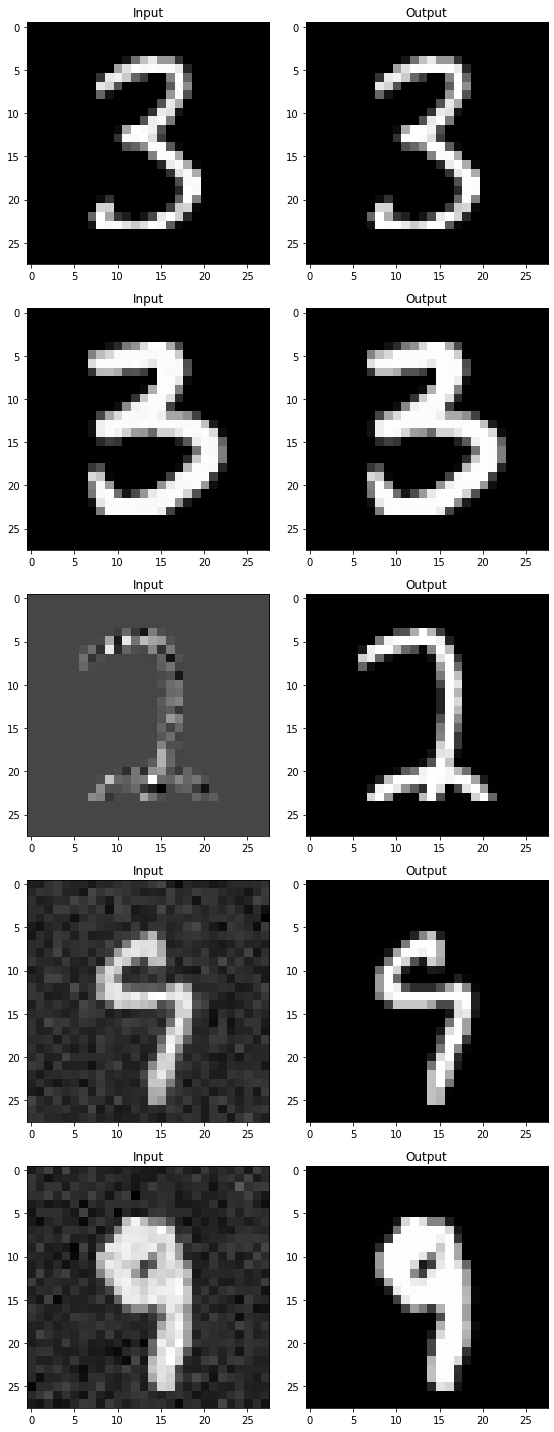

In [5]:
plot_image_pairs(data, ('Input', 'Output'))

In [6]:
(x_train, y_train), (x_val, y_val) = get_train_val_pair(data)
logging.info(f"Total training images: {len(x_train)}")
logging.info(f"Total validation images: {len(x_val)}")

In [7]:
image_shape = x_train.shape[-2:]
total_pixels = np.prod(image_shape)

To understand the relationship between the number of hidden nodes, performance, and orthogonality, models will be iteratively built with increasing number of hidden nodes while collecting relevant metrics.

Non-orthogonality will measured as the average absolute cosine similarity of all vector pairs in the weight matrix.

Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 2)                 1570      
_________________________________________________________________
output_layer (Dense)         (None, 784)               2352      
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 3,922
Trainable params: 3,922
Non-trainable params: 0
_________________________________________________________________


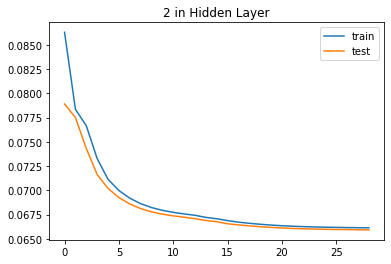

Hidden Nodes: 2
MSE: 0.0660
Non-Orthogonality: 0.067746
Time to Train: 59.48
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 5)                 3925      
_________________________________________________________________
output_layer (Dense)         (None, 784)               4704      
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 8,629
Trainable params: 8,629
Non-trainable params: 0
_________________________________________________________________


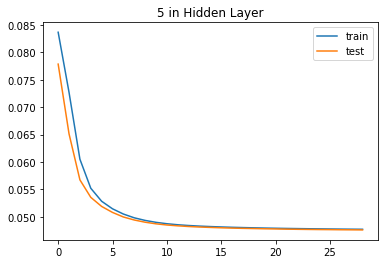

Hidden Nodes: 5
MSE: 0.0476
Non-Orthogonality: 0.115540
Time to Train: 62.52
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 10)                7850      
_________________________________________________________________
output_layer (Dense)         (None, 784)               8624      
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 16,474
Trainable params: 16,474
Non-trainable params: 0
_________________________________________________________________


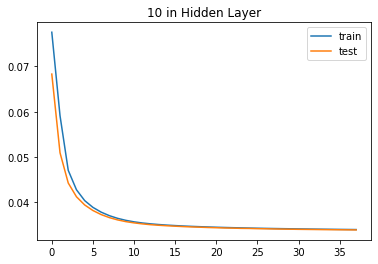

Hidden Nodes: 10
MSE: 0.0339
Non-Orthogonality: 0.104040
Time to Train: 86.67
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 15)                11775     
_________________________________________________________________
output_layer (Dense)         (None, 784)               12544     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 24,319
Trainable params: 24,319
Non-trainable params: 0
_________________________________________________________________


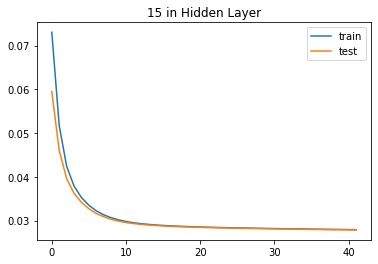

Hidden Nodes: 15
MSE: 0.0279
Non-Orthogonality: 0.078332
Time to Train: 99.41
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 20)                15700     
_________________________________________________________________
output_layer (Dense)         (None, 784)               16464     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 32,164
Trainable params: 32,164
Non-trainable params: 0
_________________________________________________________________


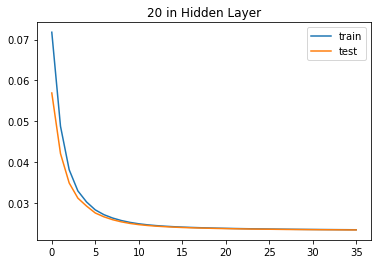

Hidden Nodes: 20
MSE: 0.0233
Non-Orthogonality: 0.078526
Time to Train: 85.62
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 25)                19625     
_________________________________________________________________
output_layer (Dense)         (None, 784)               20384     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 40,009
Trainable params: 40,009
Non-trainable params: 0
_________________________________________________________________


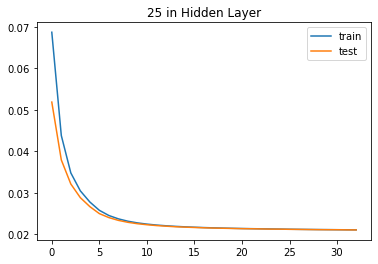

Hidden Nodes: 25
MSE: 0.0210
Non-Orthogonality: 0.072905
Time to Train: 76.03
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 30)                23550     
_________________________________________________________________
output_layer (Dense)         (None, 784)               24304     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 47,854
Trainable params: 47,854
Non-trainable params: 0
_________________________________________________________________


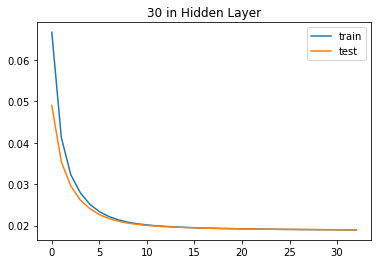

Hidden Nodes: 30
MSE: 0.0189
Non-Orthogonality: 0.069380
Time to Train: 78.66
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 35)                27475     
_________________________________________________________________
output_layer (Dense)         (None, 784)               28224     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 55,699
Trainable params: 55,699
Non-trainable params: 0
_________________________________________________________________


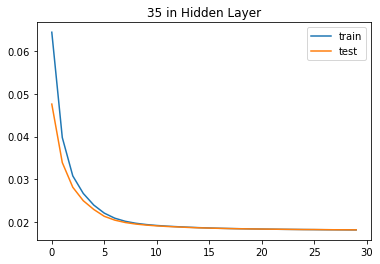

Hidden Nodes: 35
MSE: 0.0181
Non-Orthogonality: 0.064513
Time to Train: 74.43
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 40)                31400     
_________________________________________________________________
output_layer (Dense)         (None, 784)               32144     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 63,544
Trainable params: 63,544
Non-trainable params: 0
_________________________________________________________________


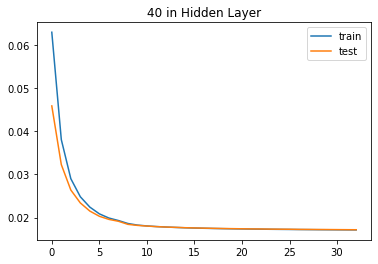

Hidden Nodes: 40
MSE: 0.0172
Non-Orthogonality: 0.065636
Time to Train: 81.55
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 45)                35325     
_________________________________________________________________
output_layer (Dense)         (None, 784)               36064     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 71,389
Trainable params: 71,389
Non-trainable params: 0
_________________________________________________________________


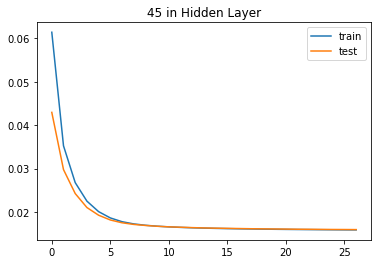

Hidden Nodes: 45
MSE: 0.0159
Non-Orthogonality: 0.066886
Time to Train: 67.28
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 50)                39250     
_________________________________________________________________
output_layer (Dense)         (None, 784)               39984     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 79,234
Trainable params: 79,234
Non-trainable params: 0
_________________________________________________________________


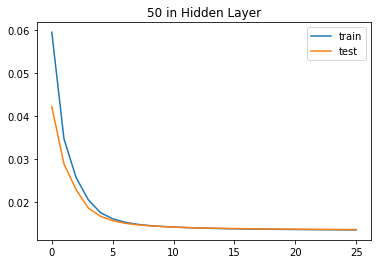

Hidden Nodes: 50
MSE: 0.0137
Non-Orthogonality: 0.063259
Time to Train: 66.19
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 55)                43175     
_________________________________________________________________
output_layer (Dense)         (None, 784)               43904     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 87,079
Trainable params: 87,079
Non-trainable params: 0
_________________________________________________________________


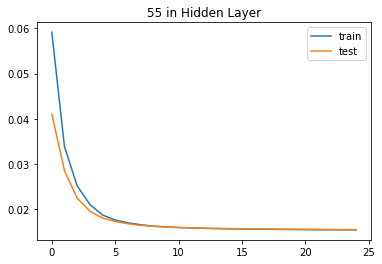

Hidden Nodes: 55
MSE: 0.0155
Non-Orthogonality: 0.063318
Time to Train: 64.52
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 60)                47100     
_________________________________________________________________
output_layer (Dense)         (None, 784)               47824     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 94,924
Trainable params: 94,924
Non-trainable params: 0
_________________________________________________________________


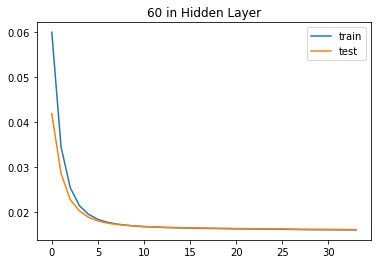

Hidden Nodes: 60
MSE: 0.0160
Non-Orthogonality: 0.063356
Time to Train: 88.43
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 65)                51025     
_________________________________________________________________
output_layer (Dense)         (None, 784)               51744     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 102,769
Trainable params: 102,769
Non-trainable params: 0
_________________________________________________________________


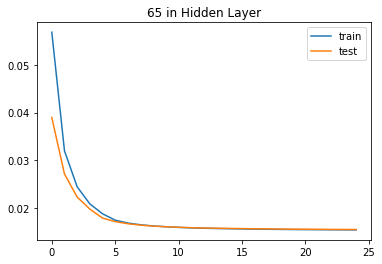

Hidden Nodes: 65
MSE: 0.0155
Non-Orthogonality: 0.063725
Time to Train: 66.84
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 70)                54950     
_________________________________________________________________
output_layer (Dense)         (None, 784)               55664     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 110,614
Trainable params: 110,614
Non-trainable params: 0
_________________________________________________________________


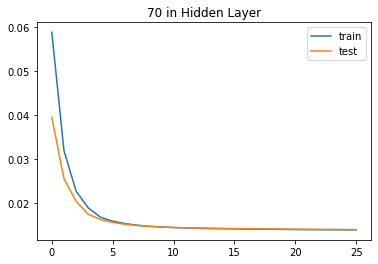

Hidden Nodes: 70
MSE: 0.0140
Non-Orthogonality: 0.062436
Time to Train: 71.21
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 75)                58875     
_________________________________________________________________
output_layer (Dense)         (None, 784)               59584     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 118,459
Trainable params: 118,459
Non-trainable params: 0
_________________________________________________________________


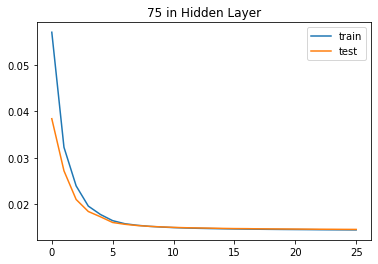

Hidden Nodes: 75
MSE: 0.0146
Non-Orthogonality: 0.061045
Time to Train: 70.71
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 80)                62800     
_________________________________________________________________
output_layer (Dense)         (None, 784)               63504     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 126,304
Trainable params: 126,304
Non-trainable params: 0
_________________________________________________________________


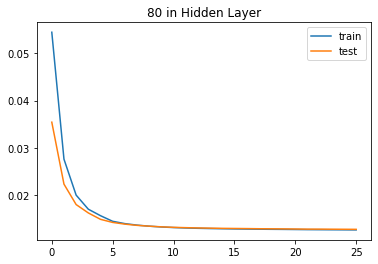

Hidden Nodes: 80
MSE: 0.0128
Non-Orthogonality: 0.061534
Time to Train: 70.39
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 85)                66725     
_________________________________________________________________
output_layer (Dense)         (None, 784)               67424     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 134,149
Trainable params: 134,149
Non-trainable params: 0
_________________________________________________________________


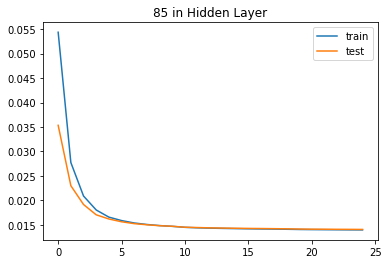

Hidden Nodes: 85
MSE: 0.0141
Non-Orthogonality: 0.061285
Time to Train: 66.59
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 90)                70650     
_________________________________________________________________
output_layer (Dense)         (None, 784)               71344     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 141,994
Trainable params: 141,994
Non-trainable params: 0
_________________________________________________________________


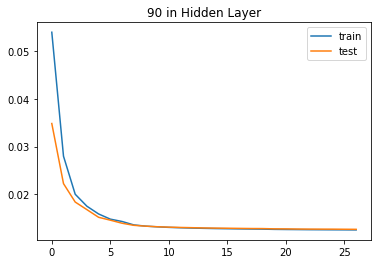

Hidden Nodes: 90
MSE: 0.0126
Non-Orthogonality: 0.060720
Time to Train: 73.75
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 95)                74575     
_________________________________________________________________
output_layer (Dense)         (None, 784)               75264     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 149,839
Trainable params: 149,839
Non-trainable params: 0
_________________________________________________________________


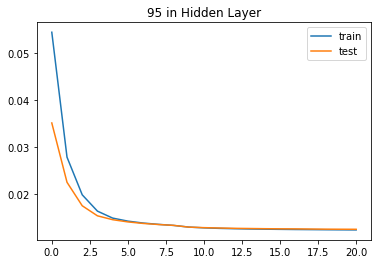

Hidden Nodes: 95
MSE: 0.0125
Non-Orthogonality: 0.059697
Time to Train: 58.51
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 100)               78500     
_________________________________________________________________
output_layer (Dense)         (None, 784)               79184     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 157,684
Trainable params: 157,684
Non-trainable params: 0
_________________________________________________________________


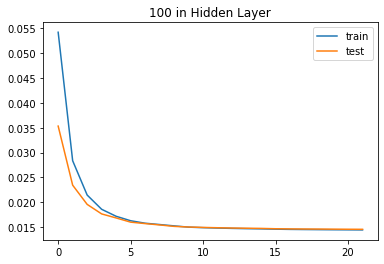

Hidden Nodes: 100
MSE: 0.0145
Non-Orthogonality: 0.059790
Time to Train: 59.87
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 105)               82425     
_________________________________________________________________
output_layer (Dense)         (None, 784)               83104     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 165,529
Trainable params: 165,529
Non-trainable params: 0
_________________________________________________________________


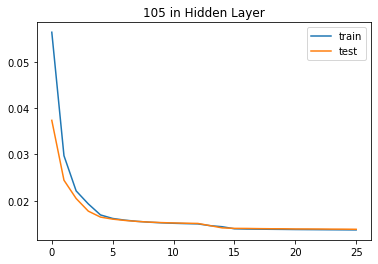

Hidden Nodes: 105
MSE: 0.0139
Non-Orthogonality: 0.058853
Time to Train: 72.04
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 110)               86350     
_________________________________________________________________
output_layer (Dense)         (None, 784)               87024     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 173,374
Trainable params: 173,374
Non-trainable params: 0
_________________________________________________________________


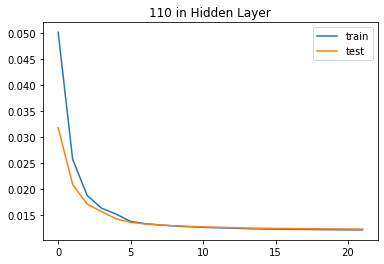

Hidden Nodes: 110
MSE: 0.0123
Non-Orthogonality: 0.058932
Time to Train: 62.24
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 115)               90275     
_________________________________________________________________
output_layer (Dense)         (None, 784)               90944     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 181,219
Trainable params: 181,219
Non-trainable params: 0
_________________________________________________________________


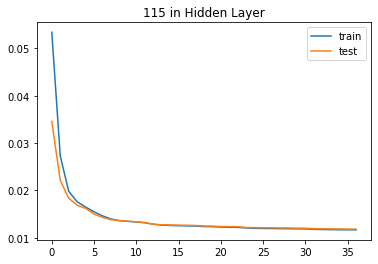

Hidden Nodes: 115
MSE: 0.0118
Non-Orthogonality: 0.057769
Time to Train: 104.65
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 120)               94200     
_________________________________________________________________
output_layer (Dense)         (None, 784)               94864     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 189,064
Trainable params: 189,064
Non-trainable params: 0
_________________________________________________________________


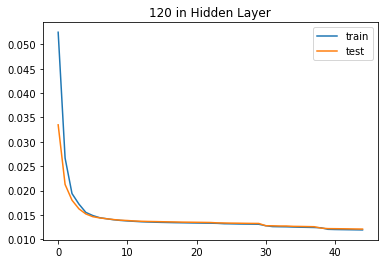

Hidden Nodes: 120
MSE: 0.0121
Non-Orthogonality: 0.055639
Time to Train: 125.16
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 125)               98125     
_________________________________________________________________
output_layer (Dense)         (None, 784)               98784     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 196,909
Trainable params: 196,909
Non-trainable params: 0
_________________________________________________________________


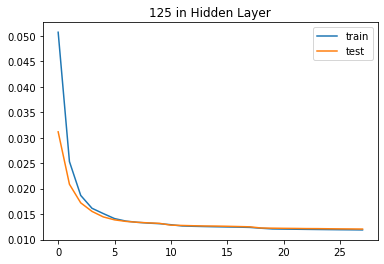

Hidden Nodes: 125
MSE: 0.0121
Non-Orthogonality: 0.056748
Time to Train: 81.55
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 130)               102050    
_________________________________________________________________
output_layer (Dense)         (None, 784)               102704    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 204,754
Trainable params: 204,754
Non-trainable params: 0
_________________________________________________________________


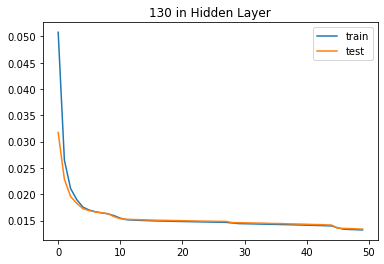

Hidden Nodes: 130
MSE: 0.0134
Non-Orthogonality: 0.053564
Time to Train: 147.66
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 135)               105975    
_________________________________________________________________
output_layer (Dense)         (None, 784)               106624    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 212,599
Trainable params: 212,599
Non-trainable params: 0
_________________________________________________________________


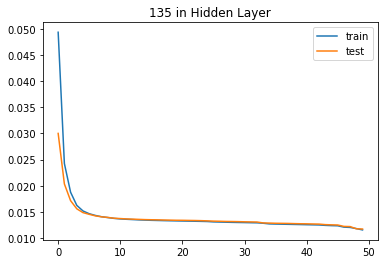

Hidden Nodes: 135
MSE: 0.0118
Non-Orthogonality: 0.054679
Time to Train: 150.29
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 140)               109900    
_________________________________________________________________
output_layer (Dense)         (None, 784)               110544    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 220,444
Trainable params: 220,444
Non-trainable params: 0
_________________________________________________________________


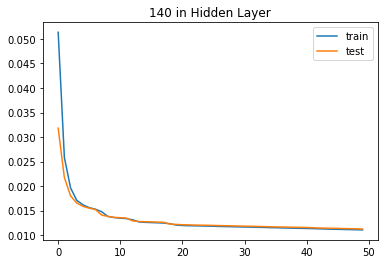

Hidden Nodes: 140
MSE: 0.0113
Non-Orthogonality: 0.054321
Time to Train: 149.46
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 145)               113825    
_________________________________________________________________
output_layer (Dense)         (None, 784)               114464    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 228,289
Trainable params: 228,289
Non-trainable params: 0
_________________________________________________________________


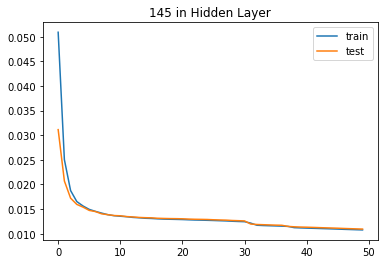

Hidden Nodes: 145
MSE: 0.0110
Non-Orthogonality: 0.050824
Time to Train: 149.69
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 150)               117750    
_________________________________________________________________
output_layer (Dense)         (None, 784)               118384    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 236,134
Trainable params: 236,134
Non-trainable params: 0
_________________________________________________________________


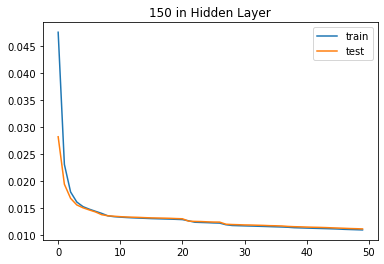

Hidden Nodes: 150
MSE: 0.0112
Non-Orthogonality: 0.053412
Time to Train: 151.52
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 155)               121675    
_________________________________________________________________
output_layer (Dense)         (None, 784)               122304    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 243,979
Trainable params: 243,979
Non-trainable params: 0
_________________________________________________________________


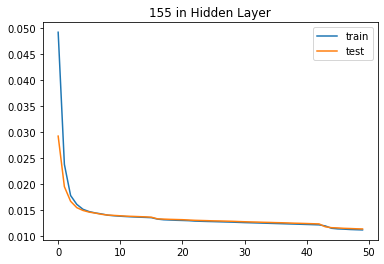

Hidden Nodes: 155
MSE: 0.0115
Non-Orthogonality: 0.053511
Time to Train: 153.20
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 160)               125600    
_________________________________________________________________
output_layer (Dense)         (None, 784)               126224    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 251,824
Trainable params: 251,824
Non-trainable params: 0
_________________________________________________________________


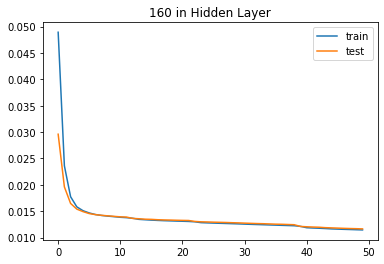

Hidden Nodes: 160
MSE: 0.0117
Non-Orthogonality: 0.052258
Time to Train: 154.18
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 165)               129525    
_________________________________________________________________
output_layer (Dense)         (None, 784)               130144    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 259,669
Trainable params: 259,669
Non-trainable params: 0
_________________________________________________________________


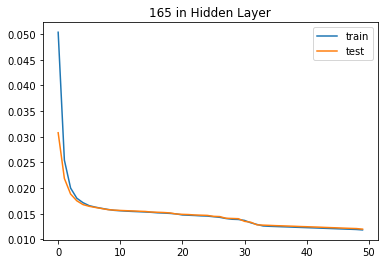

Hidden Nodes: 165
MSE: 0.0120
Non-Orthogonality: 0.053209
Time to Train: 155.65
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 170)               133450    
_________________________________________________________________
output_layer (Dense)         (None, 784)               134064    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 267,514
Trainable params: 267,514
Non-trainable params: 0
_________________________________________________________________


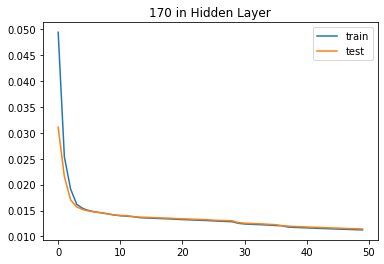

Hidden Nodes: 170
MSE: 0.0114
Non-Orthogonality: 0.051894
Time to Train: 156.83
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 175)               137375    
_________________________________________________________________
output_layer (Dense)         (None, 784)               137984    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 275,359
Trainable params: 275,359
Non-trainable params: 0
_________________________________________________________________


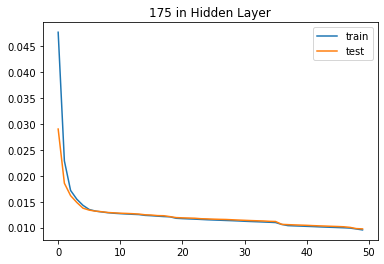

Hidden Nodes: 175
MSE: 0.0098
Non-Orthogonality: 0.052493
Time to Train: 162.43
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 180)               141300    
_________________________________________________________________
output_layer (Dense)         (None, 784)               141904    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 283,204
Trainable params: 283,204
Non-trainable params: 0
_________________________________________________________________


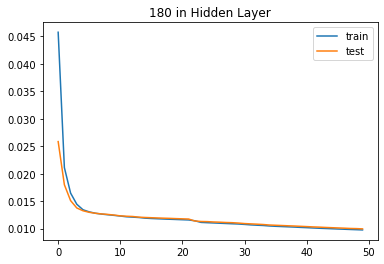

Hidden Nodes: 180
MSE: 0.0100
Non-Orthogonality: 0.052622
Time to Train: 160.98
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 185)               145225    
_________________________________________________________________
output_layer (Dense)         (None, 784)               145824    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 291,049
Trainable params: 291,049
Non-trainable params: 0
_________________________________________________________________


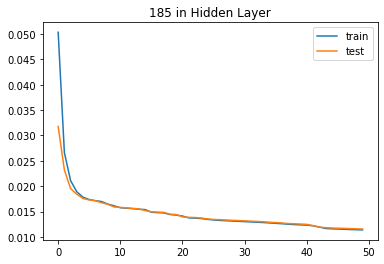

Hidden Nodes: 185
MSE: 0.0116
Non-Orthogonality: 0.051525
Time to Train: 163.14
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 190)               149150    
_________________________________________________________________
output_layer (Dense)         (None, 784)               149744    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 298,894
Trainable params: 298,894
Non-trainable params: 0
_________________________________________________________________


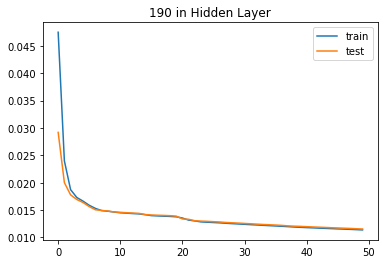

Hidden Nodes: 190
MSE: 0.0116
Non-Orthogonality: 0.051315
Time to Train: 164.85
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 195)               153075    
_________________________________________________________________
output_layer (Dense)         (None, 784)               153664    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 306,739
Trainable params: 306,739
Non-trainable params: 0
_________________________________________________________________


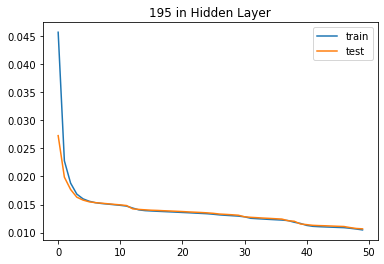

Hidden Nodes: 195
MSE: 0.0107
Non-Orthogonality: 0.052020
Time to Train: 169.75
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 200)               157000    
_________________________________________________________________
output_layer (Dense)         (None, 784)               157584    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 314,584
Trainable params: 314,584
Non-trainable params: 0
_________________________________________________________________


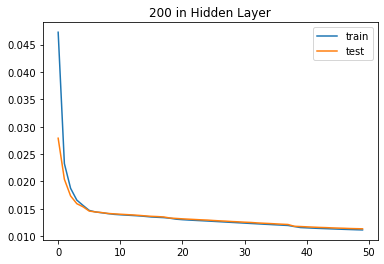

Hidden Nodes: 200
MSE: 0.0114
Non-Orthogonality: 0.052064
Time to Train: 174.89
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 205)               160925    
_________________________________________________________________
output_layer (Dense)         (None, 784)               161504    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 322,429
Trainable params: 322,429
Non-trainable params: 0
_________________________________________________________________


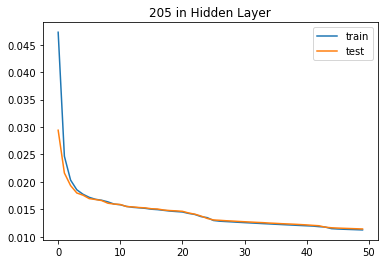

Hidden Nodes: 205
MSE: 0.0114
Non-Orthogonality: 0.051719
Time to Train: 178.15
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 210)               164850    
_________________________________________________________________
output_layer (Dense)         (None, 784)               165424    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 330,274
Trainable params: 330,274
Non-trainable params: 0
_________________________________________________________________


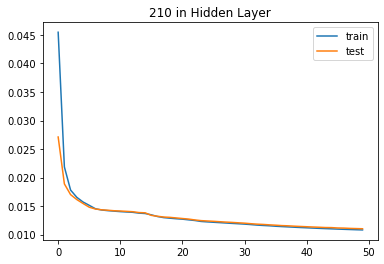

Hidden Nodes: 210
MSE: 0.0110
Non-Orthogonality: 0.051702
Time to Train: 179.64
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 215)               168775    
_________________________________________________________________
output_layer (Dense)         (None, 784)               169344    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 338,119
Trainable params: 338,119
Non-trainable params: 0
_________________________________________________________________


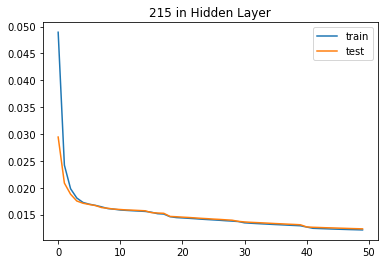

Hidden Nodes: 215
MSE: 0.0123
Non-Orthogonality: 0.050850
Time to Train: 175.81
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 220)               172700    
_________________________________________________________________
output_layer (Dense)         (None, 784)               173264    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 345,964
Trainable params: 345,964
Non-trainable params: 0
_________________________________________________________________


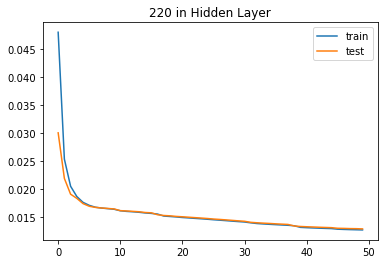

Hidden Nodes: 220
MSE: 0.0130
Non-Orthogonality: 0.049918
Time to Train: 172.88
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 225)               176625    
_________________________________________________________________
output_layer (Dense)         (None, 784)               177184    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 353,809
Trainable params: 353,809
Non-trainable params: 0
_________________________________________________________________


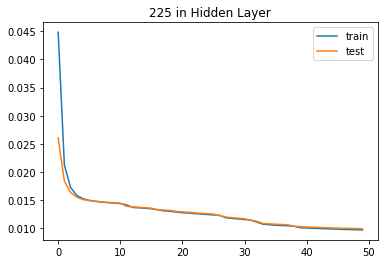

Hidden Nodes: 225
MSE: 0.0099
Non-Orthogonality: 0.050994
Time to Train: 174.11
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 230)               180550    
_________________________________________________________________
output_layer (Dense)         (None, 784)               181104    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 361,654
Trainable params: 361,654
Non-trainable params: 0
_________________________________________________________________


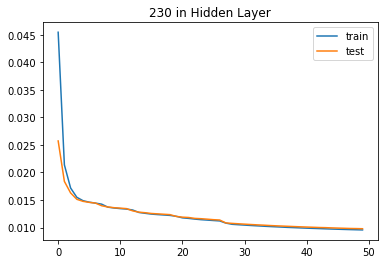

Hidden Nodes: 230
MSE: 0.0098
Non-Orthogonality: 0.051566
Time to Train: 176.18
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 235)               184475    
_________________________________________________________________
output_layer (Dense)         (None, 784)               185024    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 369,499
Trainable params: 369,499
Non-trainable params: 0
_________________________________________________________________


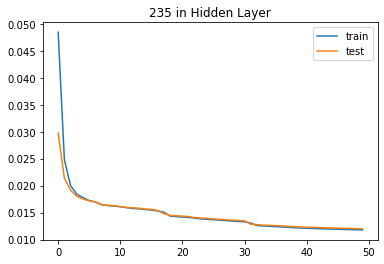

Hidden Nodes: 235
MSE: 0.0120
Non-Orthogonality: 0.050687
Time to Train: 177.55
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 240)               188400    
_________________________________________________________________
output_layer (Dense)         (None, 784)               188944    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 377,344
Trainable params: 377,344
Non-trainable params: 0
_________________________________________________________________


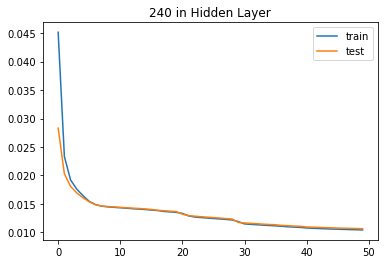

Hidden Nodes: 240
MSE: 0.0106
Non-Orthogonality: 0.051320
Time to Train: 175.53
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 245)               192325    
_________________________________________________________________
output_layer (Dense)         (None, 784)               192864    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 385,189
Trainable params: 385,189
Non-trainable params: 0
_________________________________________________________________


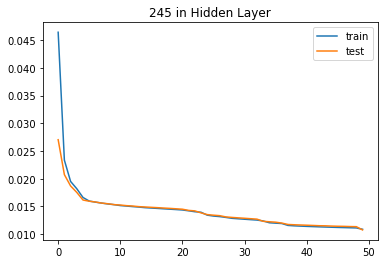

Hidden Nodes: 245
MSE: 0.0108
Non-Orthogonality: 0.050342
Time to Train: 182.50
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 250)               196250    
_________________________________________________________________
output_layer (Dense)         (None, 784)               196784    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 393,034
Trainable params: 393,034
Non-trainable params: 0
_________________________________________________________________


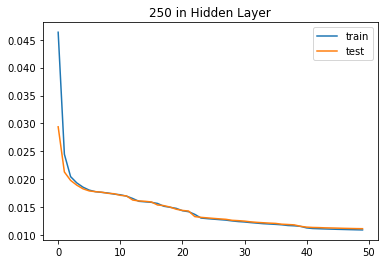

Hidden Nodes: 250
MSE: 0.0112
Non-Orthogonality: 0.050797
Time to Train: 180.40
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 255)               200175    
_________________________________________________________________
output_layer (Dense)         (None, 784)               200704    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 400,879
Trainable params: 400,879
Non-trainable params: 0
_________________________________________________________________


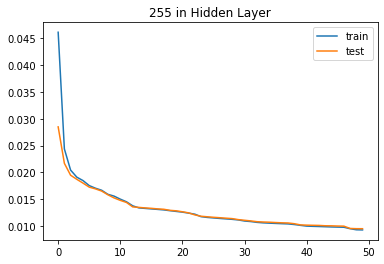

Hidden Nodes: 255
MSE: 0.0095
Non-Orthogonality: 0.050540
Time to Train: 184.33
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 260)               204100    
_________________________________________________________________
output_layer (Dense)         (None, 784)               204624    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 408,724
Trainable params: 408,724
Non-trainable params: 0
_________________________________________________________________


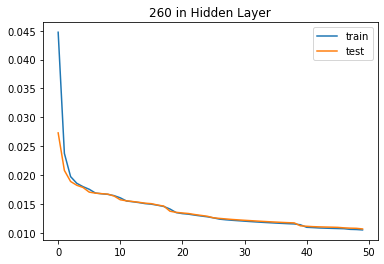

Hidden Nodes: 260
MSE: 0.0107
Non-Orthogonality: 0.048420
Time to Train: 181.94
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 265)               208025    
_________________________________________________________________
output_layer (Dense)         (None, 784)               208544    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 416,569
Trainable params: 416,569
Non-trainable params: 0
_________________________________________________________________


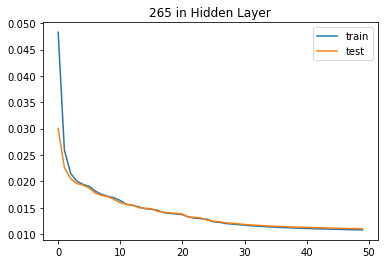

Hidden Nodes: 265
MSE: 0.0110
Non-Orthogonality: 0.048644
Time to Train: 185.10
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 270)               211950    
_________________________________________________________________
output_layer (Dense)         (None, 784)               212464    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 424,414
Trainable params: 424,414
Non-trainable params: 0
_________________________________________________________________


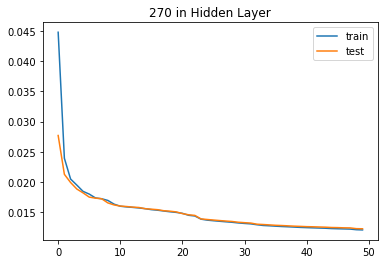

Hidden Nodes: 270
MSE: 0.0123
Non-Orthogonality: 0.047449
Time to Train: 187.52
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 275)               215875    
_________________________________________________________________
output_layer (Dense)         (None, 784)               216384    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 432,259
Trainable params: 432,259
Non-trainable params: 0
_________________________________________________________________


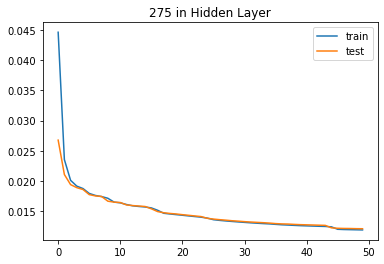

Hidden Nodes: 275
MSE: 0.0121
Non-Orthogonality: 0.048718
Time to Train: 189.41
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 280)               219800    
_________________________________________________________________
output_layer (Dense)         (None, 784)               220304    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 440,104
Trainable params: 440,104
Non-trainable params: 0
_________________________________________________________________


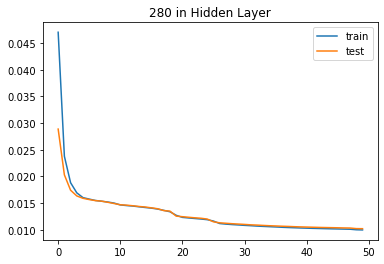

Hidden Nodes: 280
MSE: 0.0102
Non-Orthogonality: 0.047987
Time to Train: 189.19
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 285)               223725    
_________________________________________________________________
output_layer (Dense)         (None, 784)               224224    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 447,949
Trainable params: 447,949
Non-trainable params: 0
_________________________________________________________________


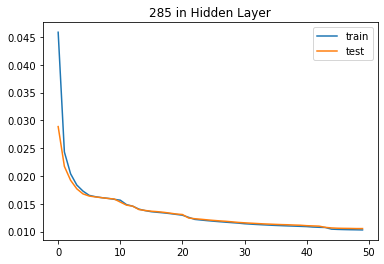

Hidden Nodes: 285
MSE: 0.0105
Non-Orthogonality: 0.048754
Time to Train: 191.96
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 290)               227650    
_________________________________________________________________
output_layer (Dense)         (None, 784)               228144    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 455,794
Trainable params: 455,794
Non-trainable params: 0
_________________________________________________________________


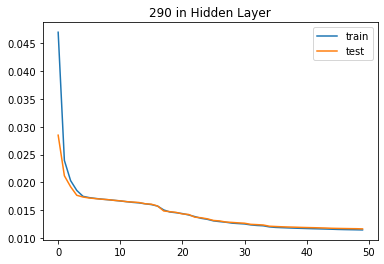

Hidden Nodes: 290
MSE: 0.0117
Non-Orthogonality: 0.047865
Time to Train: 191.77
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 295)               231575    
_________________________________________________________________
output_layer (Dense)         (None, 784)               232064    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 463,639
Trainable params: 463,639
Non-trainable params: 0
_________________________________________________________________


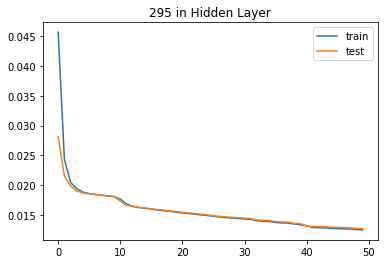

Hidden Nodes: 295
MSE: 0.0127
Non-Orthogonality: 0.047307
Time to Train: 195.62
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 300)               235500    
_________________________________________________________________
output_layer (Dense)         (None, 784)               235984    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 471,484
Trainable params: 471,484
Non-trainable params: 0
_________________________________________________________________


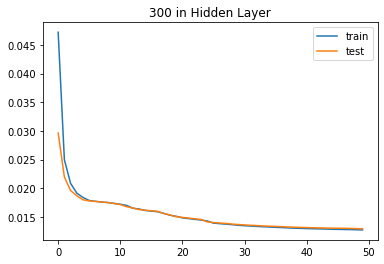

Hidden Nodes: 300
MSE: 0.0130
Non-Orthogonality: 0.048052
Time to Train: 196.43
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 305)               239425    
_________________________________________________________________
output_layer (Dense)         (None, 784)               239904    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 479,329
Trainable params: 479,329
Non-trainable params: 0
_________________________________________________________________


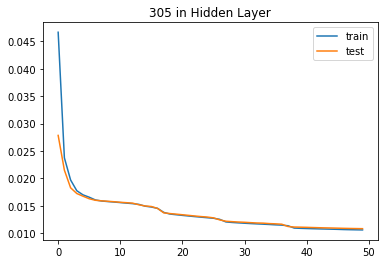

Hidden Nodes: 305
MSE: 0.0109
Non-Orthogonality: 0.047118
Time to Train: 195.96
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 310)               243350    
_________________________________________________________________
output_layer (Dense)         (None, 784)               243824    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 487,174
Trainable params: 487,174
Non-trainable params: 0
_________________________________________________________________


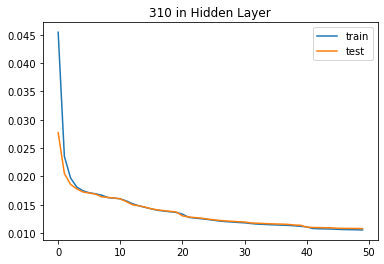

Hidden Nodes: 310
MSE: 0.0108
Non-Orthogonality: 0.046952
Time to Train: 198.94
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 315)               247275    
_________________________________________________________________
output_layer (Dense)         (None, 784)               247744    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 495,019
Trainable params: 495,019
Non-trainable params: 0
_________________________________________________________________


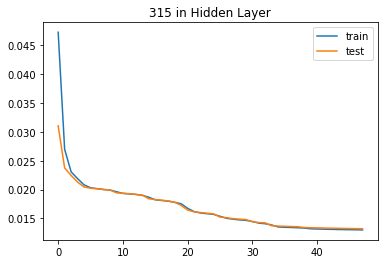

Hidden Nodes: 315
MSE: 0.0132
Non-Orthogonality: 0.046889
Time to Train: 192.30
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 320)               251200    
_________________________________________________________________
output_layer (Dense)         (None, 784)               251664    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 502,864
Trainable params: 502,864
Non-trainable params: 0
_________________________________________________________________


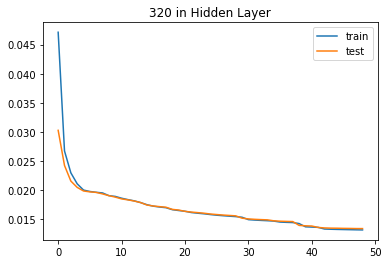

Hidden Nodes: 320
MSE: 0.0134
Non-Orthogonality: 0.047345
Time to Train: 195.16
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 325)               255125    
_________________________________________________________________
output_layer (Dense)         (None, 784)               255584    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 510,709
Trainable params: 510,709
Non-trainable params: 0
_________________________________________________________________


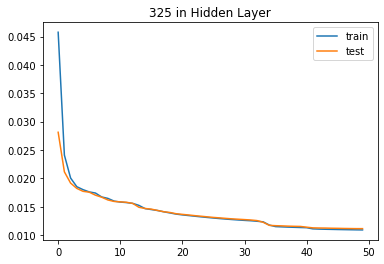

Hidden Nodes: 325
MSE: 0.0112
Non-Orthogonality: 0.047138
Time to Train: 203.21
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 330)               259050    
_________________________________________________________________
output_layer (Dense)         (None, 784)               259504    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 518,554
Trainable params: 518,554
Non-trainable params: 0
_________________________________________________________________


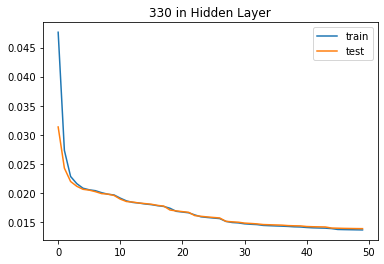

Hidden Nodes: 330
MSE: 0.0139
Non-Orthogonality: 0.046805
Time to Train: 204.02
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 335)               262975    
_________________________________________________________________
output_layer (Dense)         (None, 784)               263424    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 526,399
Trainable params: 526,399
Non-trainable params: 0
_________________________________________________________________


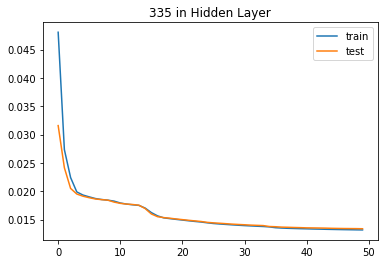

Hidden Nodes: 335
MSE: 0.0134
Non-Orthogonality: 0.045733
Time to Train: 206.68
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 340)               266900    
_________________________________________________________________
output_layer (Dense)         (None, 784)               267344    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 534,244
Trainable params: 534,244
Non-trainable params: 0
_________________________________________________________________


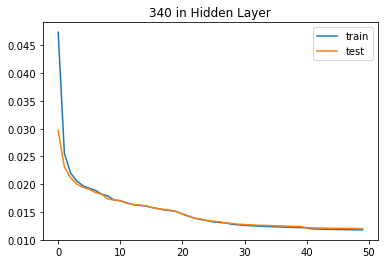

Hidden Nodes: 340
MSE: 0.0120
Non-Orthogonality: 0.046583
Time to Train: 205.75
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 345)               270825    
_________________________________________________________________
output_layer (Dense)         (None, 784)               271264    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 542,089
Trainable params: 542,089
Non-trainable params: 0
_________________________________________________________________


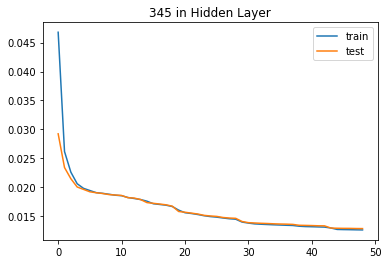

Hidden Nodes: 345
MSE: 0.0129
Non-Orthogonality: 0.045434
Time to Train: 204.40
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 350)               274750    
_________________________________________________________________
output_layer (Dense)         (None, 784)               275184    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 549,934
Trainable params: 549,934
Non-trainable params: 0
_________________________________________________________________


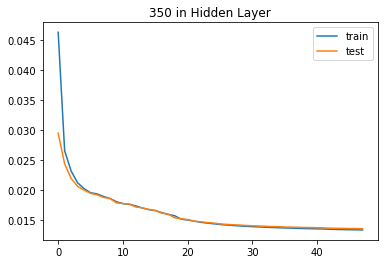

Hidden Nodes: 350
MSE: 0.0135
Non-Orthogonality: 0.045537
Time to Train: 201.36
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 355)               278675    
_________________________________________________________________
output_layer (Dense)         (None, 784)               279104    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 557,779
Trainable params: 557,779
Non-trainable params: 0
_________________________________________________________________


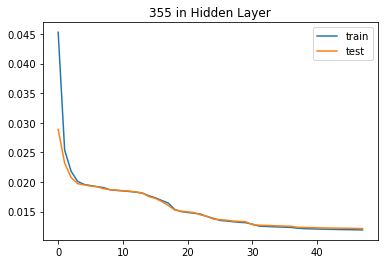

Hidden Nodes: 355
MSE: 0.0122
Non-Orthogonality: 0.046394
Time to Train: 202.81
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 360)               282600    
_________________________________________________________________
output_layer (Dense)         (None, 784)               283024    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 565,624
Trainable params: 565,624
Non-trainable params: 0
_________________________________________________________________


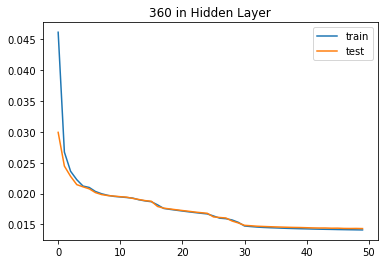

Hidden Nodes: 360
MSE: 0.0144
Non-Orthogonality: 0.045023
Time to Train: 210.32
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 365)               286525    
_________________________________________________________________
output_layer (Dense)         (None, 784)               286944    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 573,469
Trainable params: 573,469
Non-trainable params: 0
_________________________________________________________________


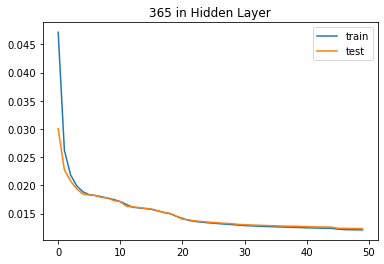

Hidden Nodes: 365
MSE: 0.0124
Non-Orthogonality: 0.045574
Time to Train: 213.34
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 370)               290450    
_________________________________________________________________
output_layer (Dense)         (None, 784)               290864    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 581,314
Trainable params: 581,314
Non-trainable params: 0
_________________________________________________________________


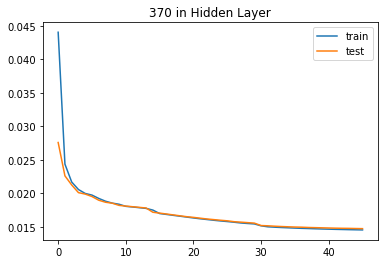

Hidden Nodes: 370
MSE: 0.0148
Non-Orthogonality: 0.044842
Time to Train: 196.84
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 375)               294375    
_________________________________________________________________
output_layer (Dense)         (None, 784)               294784    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 589,159
Trainable params: 589,159
Non-trainable params: 0
_________________________________________________________________


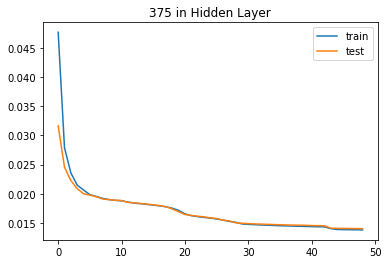

Hidden Nodes: 375
MSE: 0.0141
Non-Orthogonality: 0.044718
Time to Train: 214.04
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 380)               298300    
_________________________________________________________________
output_layer (Dense)         (None, 784)               298704    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 597,004
Trainable params: 597,004
Non-trainable params: 0
_________________________________________________________________


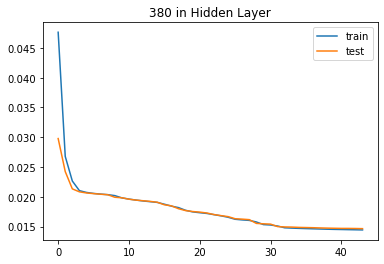

Hidden Nodes: 380
MSE: 0.0147
Non-Orthogonality: 0.044557
Time to Train: 191.80
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 385)               302225    
_________________________________________________________________
output_layer (Dense)         (None, 784)               302624    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 604,849
Trainable params: 604,849
Non-trainable params: 0
_________________________________________________________________


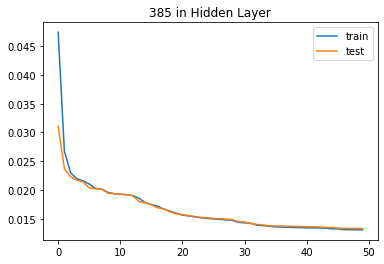

Hidden Nodes: 385
MSE: 0.0133
Non-Orthogonality: 0.044544
Time to Train: 219.16
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 390)               306150    
_________________________________________________________________
output_layer (Dense)         (None, 784)               306544    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 612,694
Trainable params: 612,694
Non-trainable params: 0
_________________________________________________________________


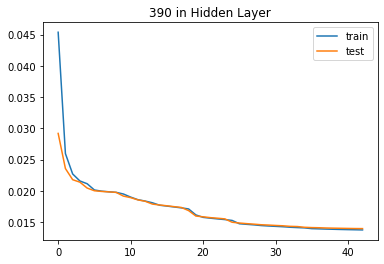

Hidden Nodes: 390
MSE: 0.0140
Non-Orthogonality: 0.044460
Time to Train: 190.21
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 395)               310075    
_________________________________________________________________
output_layer (Dense)         (None, 784)               310464    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 620,539
Trainable params: 620,539
Non-trainable params: 0
_________________________________________________________________


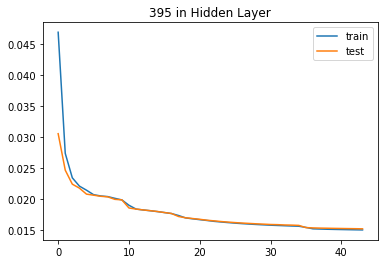

Hidden Nodes: 395
MSE: 0.0153
Non-Orthogonality: 0.043566
Time to Train: 196.05
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 400)               314000    
_________________________________________________________________
output_layer (Dense)         (None, 784)               314384    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 628,384
Trainable params: 628,384
Non-trainable params: 0
_________________________________________________________________


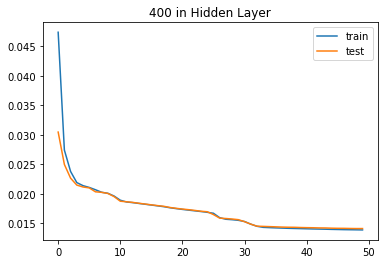

Hidden Nodes: 400
MSE: 0.0142
Non-Orthogonality: 0.044681
Time to Train: 221.33
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 405)               317925    
_________________________________________________________________
output_layer (Dense)         (None, 784)               318304    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 636,229
Trainable params: 636,229
Non-trainable params: 0
_________________________________________________________________


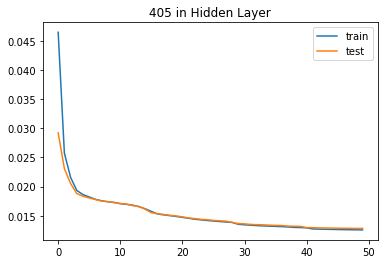

Hidden Nodes: 405
MSE: 0.0129
Non-Orthogonality: 0.044310
Time to Train: 226.06
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 410)               321850    
_________________________________________________________________
output_layer (Dense)         (None, 784)               322224    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 644,074
Trainable params: 644,074
Non-trainable params: 0
_________________________________________________________________


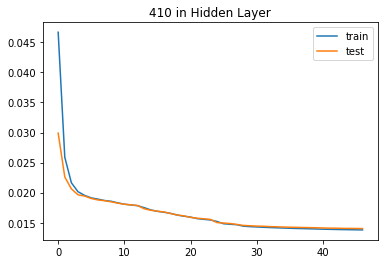

Hidden Nodes: 410
MSE: 0.0141
Non-Orthogonality: 0.045071
Time to Train: 212.30
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 415)               325775    
_________________________________________________________________
output_layer (Dense)         (None, 784)               326144    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 651,919
Trainable params: 651,919
Non-trainable params: 0
_________________________________________________________________


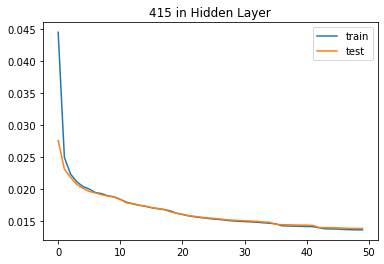

Hidden Nodes: 415
MSE: 0.0138
Non-Orthogonality: 0.044848
Time to Train: 229.25
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 420)               329700    
_________________________________________________________________
output_layer (Dense)         (None, 784)               330064    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 659,764
Trainable params: 659,764
Non-trainable params: 0
_________________________________________________________________


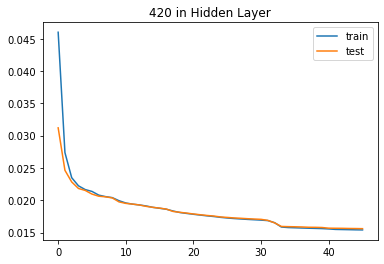

Hidden Nodes: 420
MSE: 0.0157
Non-Orthogonality: 0.043560
Time to Train: 212.07
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 425)               333625    
_________________________________________________________________
output_layer (Dense)         (None, 784)               333984    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 667,609
Trainable params: 667,609
Non-trainable params: 0
_________________________________________________________________


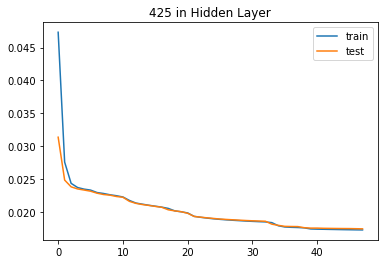

Hidden Nodes: 425
MSE: 0.0175
Non-Orthogonality: 0.044129
Time to Train: 220.87
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 430)               337550    
_________________________________________________________________
output_layer (Dense)         (None, 784)               337904    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 675,454
Trainable params: 675,454
Non-trainable params: 0
_________________________________________________________________


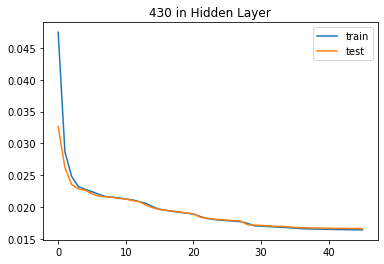

Hidden Nodes: 430
MSE: 0.0167
Non-Orthogonality: 0.043251
Time to Train: 214.03
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 435)               341475    
_________________________________________________________________
output_layer (Dense)         (None, 784)               341824    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 683,299
Trainable params: 683,299
Non-trainable params: 0
_________________________________________________________________


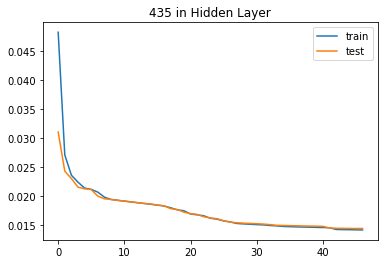

Hidden Nodes: 435
MSE: 0.0144
Non-Orthogonality: 0.043923
Time to Train: 220.16
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 440)               345400    
_________________________________________________________________
output_layer (Dense)         (None, 784)               345744    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 691,144
Trainable params: 691,144
Non-trainable params: 0
_________________________________________________________________


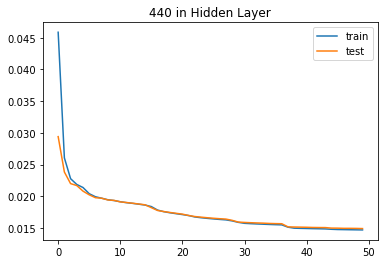

Hidden Nodes: 440
MSE: 0.0149
Non-Orthogonality: 0.043850
Time to Train: 232.39
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 445)               349325    
_________________________________________________________________
output_layer (Dense)         (None, 784)               349664    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 698,989
Trainable params: 698,989
Non-trainable params: 0
_________________________________________________________________


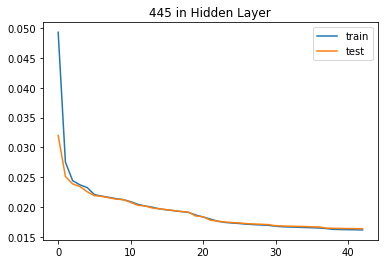

Hidden Nodes: 445
MSE: 0.0164
Non-Orthogonality: 0.043604
Time to Train: 202.98
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 450)               353250    
_________________________________________________________________
output_layer (Dense)         (None, 784)               353584    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 706,834
Trainable params: 706,834
Non-trainable params: 0
_________________________________________________________________


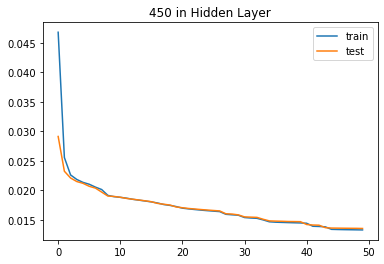

Hidden Nodes: 450
MSE: 0.0135
Non-Orthogonality: 0.044028
Time to Train: 236.45
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 455)               357175    
_________________________________________________________________
output_layer (Dense)         (None, 784)               357504    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 714,679
Trainable params: 714,679
Non-trainable params: 0
_________________________________________________________________


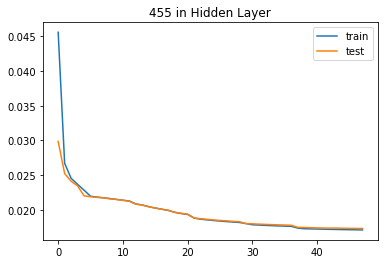

Hidden Nodes: 455
MSE: 0.0174
Non-Orthogonality: 0.043668
Time to Train: 228.60
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 460)               361100    
_________________________________________________________________
output_layer (Dense)         (None, 784)               361424    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 722,524
Trainable params: 722,524
Non-trainable params: 0
_________________________________________________________________


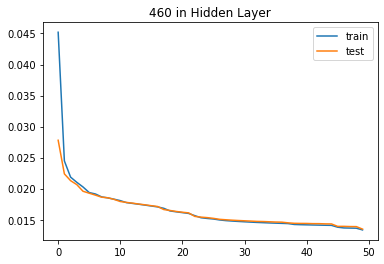

Hidden Nodes: 460
MSE: 0.0135
Non-Orthogonality: 0.044103
Time to Train: 236.74
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 465)               365025    
_________________________________________________________________
output_layer (Dense)         (None, 784)               365344    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 730,369
Trainable params: 730,369
Non-trainable params: 0
_________________________________________________________________


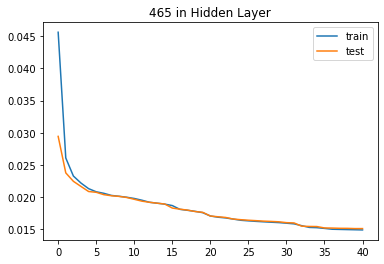

Hidden Nodes: 465
MSE: 0.0151
Non-Orthogonality: 0.042844
Time to Train: 196.92
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 470)               368950    
_________________________________________________________________
output_layer (Dense)         (None, 784)               369264    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 738,214
Trainable params: 738,214
Non-trainable params: 0
_________________________________________________________________


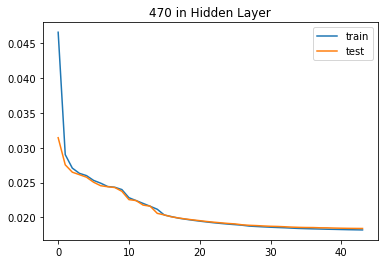

Hidden Nodes: 470
MSE: 0.0185
Non-Orthogonality: 0.042637
Time to Train: 213.30
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 475)               372875    
_________________________________________________________________
output_layer (Dense)         (None, 784)               373184    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 746,059
Trainable params: 746,059
Non-trainable params: 0
_________________________________________________________________


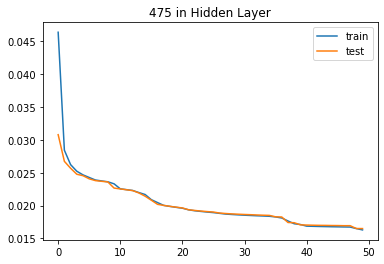

Hidden Nodes: 475
MSE: 0.0166
Non-Orthogonality: 0.043977
Time to Train: 243.27
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 480)               376800    
_________________________________________________________________
output_layer (Dense)         (None, 784)               377104    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 753,904
Trainable params: 753,904
Non-trainable params: 0
_________________________________________________________________


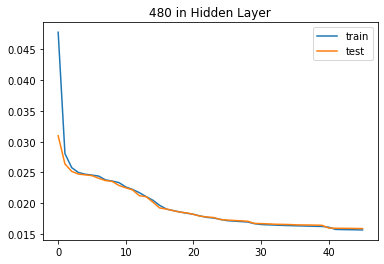

Hidden Nodes: 480
MSE: 0.0159
Non-Orthogonality: 0.043289
Time to Train: 221.02
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 485)               380725    
_________________________________________________________________
output_layer (Dense)         (None, 784)               381024    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 761,749
Trainable params: 761,749
Non-trainable params: 0
_________________________________________________________________


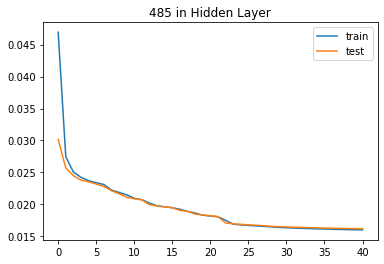

Hidden Nodes: 485
MSE: 0.0163
Non-Orthogonality: 0.042892
Time to Train: 201.11
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 490)               384650    
_________________________________________________________________
output_layer (Dense)         (None, 784)               384944    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 769,594
Trainable params: 769,594
Non-trainable params: 0
_________________________________________________________________


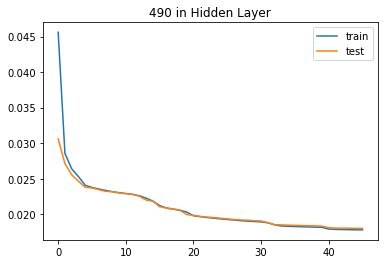

Hidden Nodes: 490
MSE: 0.0180
Non-Orthogonality: 0.042718
Time to Train: 226.59
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 495)               388575    
_________________________________________________________________
output_layer (Dense)         (None, 784)               388864    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 777,439
Trainable params: 777,439
Non-trainable params: 0
_________________________________________________________________


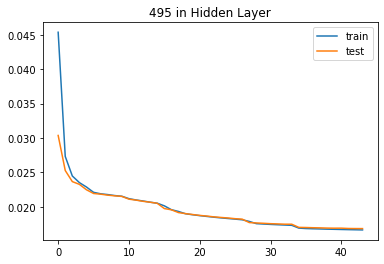

Hidden Nodes: 495
MSE: 0.0169
Non-Orthogonality: 0.042636
Time to Train: 218.92
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 500)               392500    
_________________________________________________________________
output_layer (Dense)         (None, 784)               392784    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 785,284
Trainable params: 785,284
Non-trainable params: 0
_________________________________________________________________


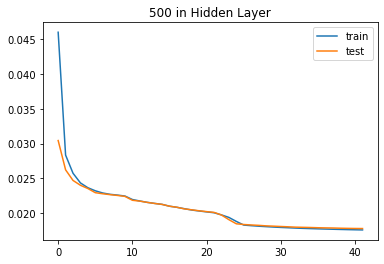

Hidden Nodes: 500
MSE: 0.0179
Non-Orthogonality: 0.042717
Time to Train: 207.97
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 505)               396425    
_________________________________________________________________
output_layer (Dense)         (None, 784)               396704    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 793,129
Trainable params: 793,129
Non-trainable params: 0
_________________________________________________________________


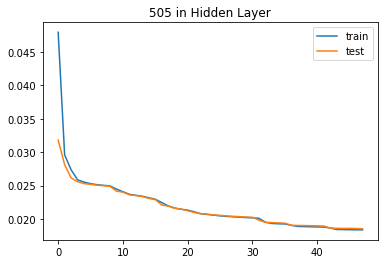

Hidden Nodes: 505
MSE: 0.0186
Non-Orthogonality: 0.043127
Time to Train: 240.13
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 510)               400350    
_________________________________________________________________
output_layer (Dense)         (None, 784)               400624    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 800,974
Trainable params: 800,974
Non-trainable params: 0
_________________________________________________________________


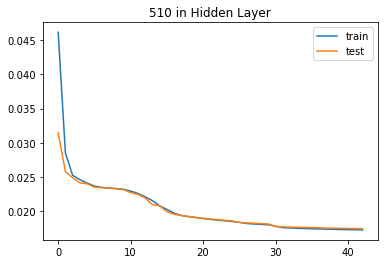

Hidden Nodes: 510
MSE: 0.0175
Non-Orthogonality: 0.042180
Time to Train: 217.77
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 515)               404275    
_________________________________________________________________
output_layer (Dense)         (None, 784)               404544    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 808,819
Trainable params: 808,819
Non-trainable params: 0
_________________________________________________________________


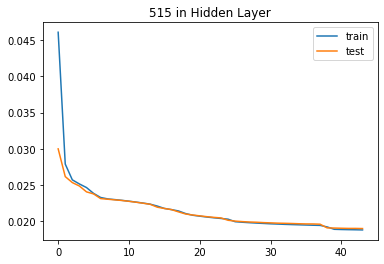

Hidden Nodes: 515
MSE: 0.0190
Non-Orthogonality: 0.042590
Time to Train: 225.79
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 520)               408200    
_________________________________________________________________
output_layer (Dense)         (None, 784)               408464    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 816,664
Trainable params: 816,664
Non-trainable params: 0
_________________________________________________________________


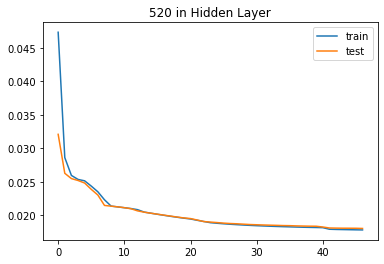

Hidden Nodes: 520
MSE: 0.0181
Non-Orthogonality: 0.043636
Time to Train: 239.62
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 525)               412125    
_________________________________________________________________
output_layer (Dense)         (None, 784)               412384    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 824,509
Trainable params: 824,509
Non-trainable params: 0
_________________________________________________________________


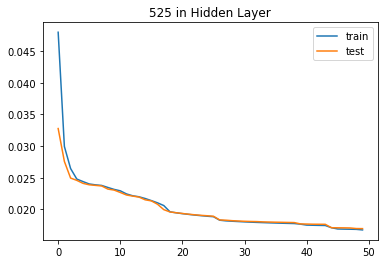

Hidden Nodes: 525
MSE: 0.0170
Non-Orthogonality: 0.043452
Time to Train: 258.90
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 530)               416050    
_________________________________________________________________
output_layer (Dense)         (None, 784)               416304    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 832,354
Trainable params: 832,354
Non-trainable params: 0
_________________________________________________________________


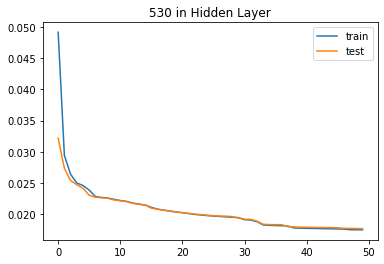

Hidden Nodes: 530
MSE: 0.0178
Non-Orthogonality: 0.043484
Time to Train: 259.59
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 535)               419975    
_________________________________________________________________
output_layer (Dense)         (None, 784)               420224    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 840,199
Trainable params: 840,199
Non-trainable params: 0
_________________________________________________________________


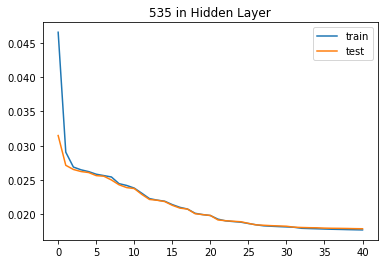

Hidden Nodes: 535
MSE: 0.0180
Non-Orthogonality: 0.042115
Time to Train: 216.79
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 540)               423900    
_________________________________________________________________
output_layer (Dense)         (None, 784)               424144    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 848,044
Trainable params: 848,044
Non-trainable params: 0
_________________________________________________________________


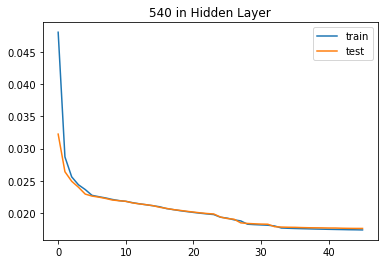

Hidden Nodes: 540
MSE: 0.0177
Non-Orthogonality: 0.042847
Time to Train: 242.69
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 545)               427825    
_________________________________________________________________
output_layer (Dense)         (None, 784)               428064    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 855,889
Trainable params: 855,889
Non-trainable params: 0
_________________________________________________________________


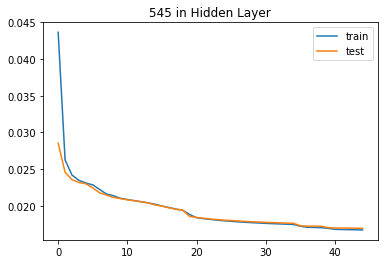

Hidden Nodes: 545
MSE: 0.0170
Non-Orthogonality: 0.043079
Time to Train: 238.88
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 550)               431750    
_________________________________________________________________
output_layer (Dense)         (None, 784)               431984    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 863,734
Trainable params: 863,734
Non-trainable params: 0
_________________________________________________________________


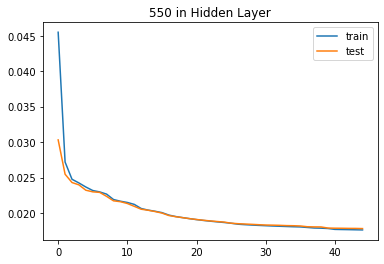

Hidden Nodes: 550
MSE: 0.0179
Non-Orthogonality: 0.042755
Time to Train: 240.22
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 555)               435675    
_________________________________________________________________
output_layer (Dense)         (None, 784)               435904    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 871,579
Trainable params: 871,579
Non-trainable params: 0
_________________________________________________________________


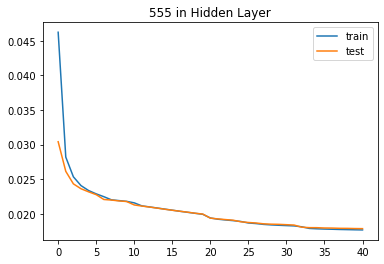

Hidden Nodes: 555
MSE: 0.0179
Non-Orthogonality: 0.042410
Time to Train: 219.69
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 560)               439600    
_________________________________________________________________
output_layer (Dense)         (None, 784)               439824    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 879,424
Trainable params: 879,424
Non-trainable params: 0
_________________________________________________________________


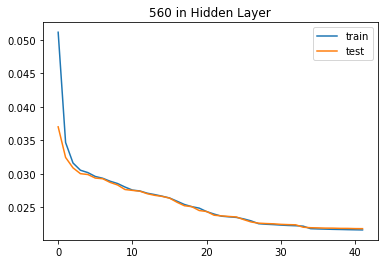

Hidden Nodes: 560
MSE: 0.0219
Non-Orthogonality: 0.041592
Time to Train: 223.12
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 565)               443525    
_________________________________________________________________
output_layer (Dense)         (None, 784)               443744    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 887,269
Trainable params: 887,269
Non-trainable params: 0
_________________________________________________________________


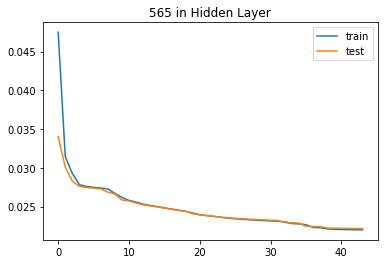

Hidden Nodes: 565
MSE: 0.0223
Non-Orthogonality: 0.041933
Time to Train: 236.29
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 570)               447450    
_________________________________________________________________
output_layer (Dense)         (None, 784)               447664    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 895,114
Trainable params: 895,114
Non-trainable params: 0
_________________________________________________________________


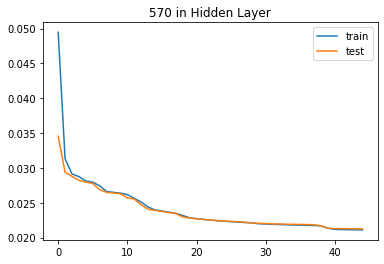

Hidden Nodes: 570
MSE: 0.0213
Non-Orthogonality: 0.042567
Time to Train: 242.45
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 575)               451375    
_________________________________________________________________
output_layer (Dense)         (None, 784)               451584    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 902,959
Trainable params: 902,959
Non-trainable params: 0
_________________________________________________________________


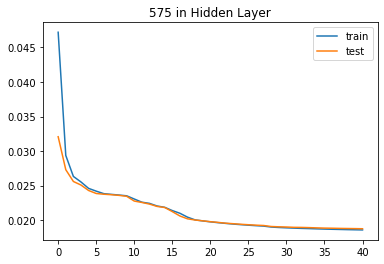

Hidden Nodes: 575
MSE: 0.0188
Non-Orthogonality: 0.041450
Time to Train: 223.33
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 580)               455300    
_________________________________________________________________
output_layer (Dense)         (None, 784)               455504    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 910,804
Trainable params: 910,804
Non-trainable params: 0
_________________________________________________________________


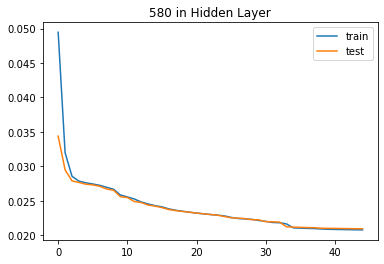

Hidden Nodes: 580
MSE: 0.0211
Non-Orthogonality: 0.042416
Time to Train: 244.46
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 585)               459225    
_________________________________________________________________
output_layer (Dense)         (None, 784)               459424    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 918,649
Trainable params: 918,649
Non-trainable params: 0
_________________________________________________________________


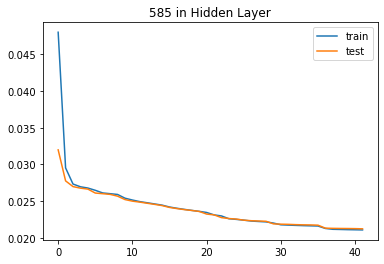

Hidden Nodes: 585
MSE: 0.0213
Non-Orthogonality: 0.041576
Time to Train: 231.56
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 590)               463150    
_________________________________________________________________
output_layer (Dense)         (None, 784)               463344    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 926,494
Trainable params: 926,494
Non-trainable params: 0
_________________________________________________________________


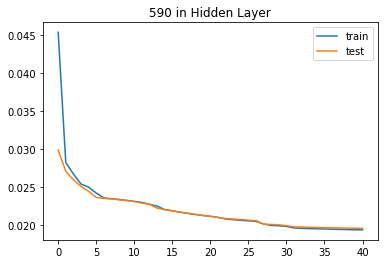

Hidden Nodes: 590
MSE: 0.0197
Non-Orthogonality: 0.041758
Time to Train: 226.75
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 595)               467075    
_________________________________________________________________
output_layer (Dense)         (None, 784)               467264    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 934,339
Trainable params: 934,339
Non-trainable params: 0
_________________________________________________________________


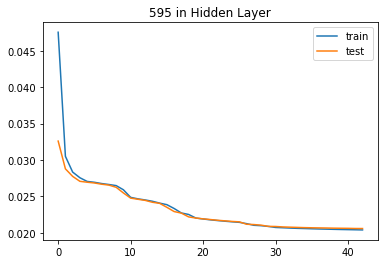

Hidden Nodes: 595
MSE: 0.0207
Non-Orthogonality: 0.042246
Time to Train: 238.89
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 600)               471000    
_________________________________________________________________
output_layer (Dense)         (None, 784)               471184    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 942,184
Trainable params: 942,184
Non-trainable params: 0
_________________________________________________________________


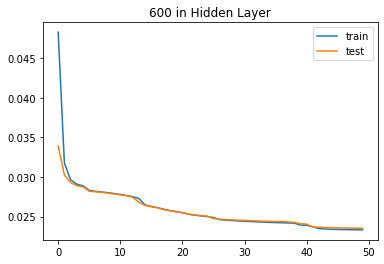

Hidden Nodes: 600
MSE: 0.0236
Non-Orthogonality: 0.042907
Time to Train: 275.98
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 605)               474925    
_________________________________________________________________
output_layer (Dense)         (None, 784)               475104    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 950,029
Trainable params: 950,029
Non-trainable params: 0
_________________________________________________________________


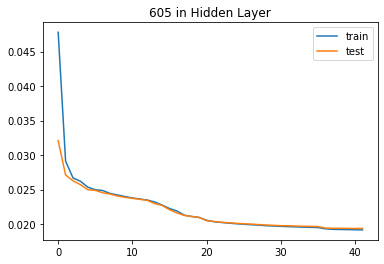

Hidden Nodes: 605
MSE: 0.0194
Non-Orthogonality: 0.041730
Time to Train: 236.30
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 610)               478850    
_________________________________________________________________
output_layer (Dense)         (None, 784)               479024    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 957,874
Trainable params: 957,874
Non-trainable params: 0
_________________________________________________________________


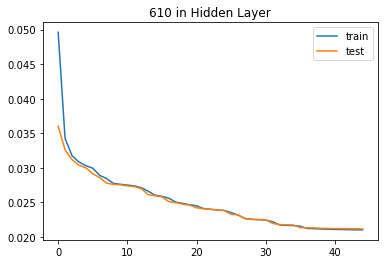

Hidden Nodes: 610
MSE: 0.0213
Non-Orthogonality: 0.042820
Time to Train: 254.79
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 615)               482775    
_________________________________________________________________
output_layer (Dense)         (None, 784)               482944    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 965,719
Trainable params: 965,719
Non-trainable params: 0
_________________________________________________________________


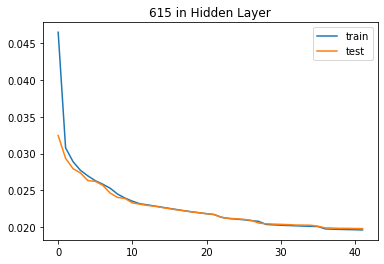

Hidden Nodes: 615
MSE: 0.0199
Non-Orthogonality: 0.041913
Time to Train: 240.49
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 620)               486700    
_________________________________________________________________
output_layer (Dense)         (None, 784)               486864    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 973,564
Trainable params: 973,564
Non-trainable params: 0
_________________________________________________________________


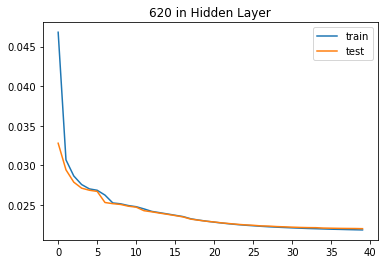

Hidden Nodes: 620
MSE: 0.0221
Non-Orthogonality: 0.041664
Time to Train: 228.73
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 625)               490625    
_________________________________________________________________
output_layer (Dense)         (None, 784)               490784    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 981,409
Trainable params: 981,409
Non-trainable params: 0
_________________________________________________________________


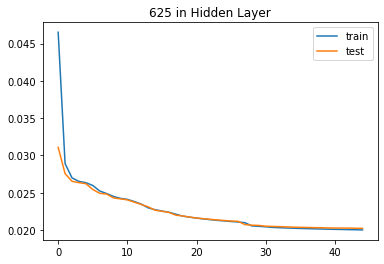

Hidden Nodes: 625
MSE: 0.0203
Non-Orthogonality: 0.042715
Time to Train: 257.00
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 630)               494550    
_________________________________________________________________
output_layer (Dense)         (None, 784)               494704    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 989,254
Trainable params: 989,254
Non-trainable params: 0
_________________________________________________________________


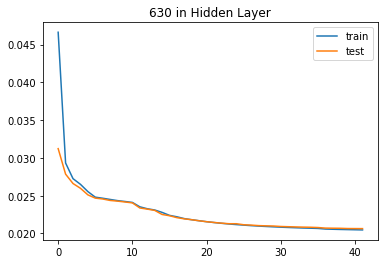

Hidden Nodes: 630
MSE: 0.0207
Non-Orthogonality: 0.042120
Time to Train: 240.52
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 635)               498475    
_________________________________________________________________
output_layer (Dense)         (None, 784)               498624    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 997,099
Trainable params: 997,099
Non-trainable params: 0
_________________________________________________________________


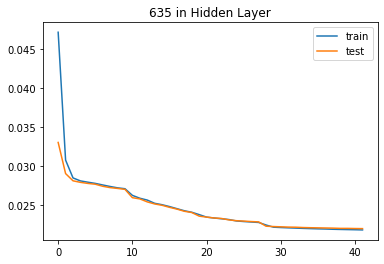

Hidden Nodes: 635
MSE: 0.0220
Non-Orthogonality: 0.042759
Time to Train: 243.49
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 640)               502400    
_________________________________________________________________
output_layer (Dense)         (None, 784)               502544    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,004,944
Trainable params: 1,004,944
Non-trainable params: 0
_________________________________________________________________


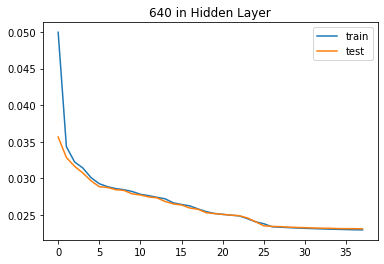

Hidden Nodes: 640
MSE: 0.0232
Non-Orthogonality: 0.041156
Time to Train: 218.53
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 645)               506325    
_________________________________________________________________
output_layer (Dense)         (None, 784)               506464    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,012,789
Trainable params: 1,012,789
Non-trainable params: 0
_________________________________________________________________


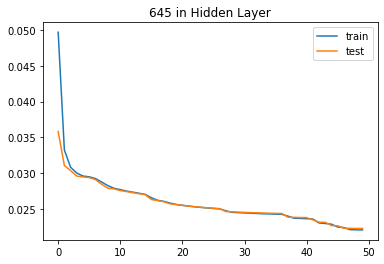

Hidden Nodes: 645
MSE: 0.0223
Non-Orthogonality: 0.042711
Time to Train: 291.08
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 650)               510250    
_________________________________________________________________
output_layer (Dense)         (None, 784)               510384    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,020,634
Trainable params: 1,020,634
Non-trainable params: 0
_________________________________________________________________


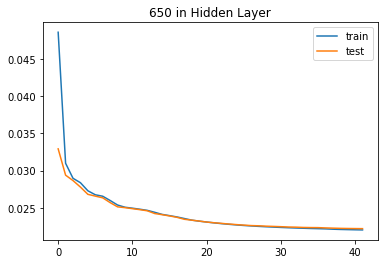

Hidden Nodes: 650
MSE: 0.0223
Non-Orthogonality: 0.041964
Time to Train: 244.90
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 655)               514175    
_________________________________________________________________
output_layer (Dense)         (None, 784)               514304    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,028,479
Trainable params: 1,028,479
Non-trainable params: 0
_________________________________________________________________


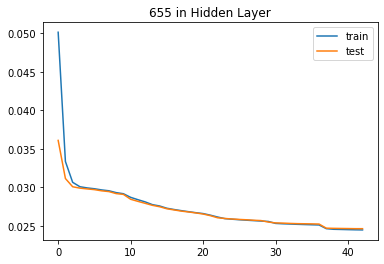

Hidden Nodes: 655
MSE: 0.0247
Non-Orthogonality: 0.041931
Time to Train: 253.39
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 660)               518100    
_________________________________________________________________
output_layer (Dense)         (None, 784)               518224    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,036,324
Trainable params: 1,036,324
Non-trainable params: 0
_________________________________________________________________


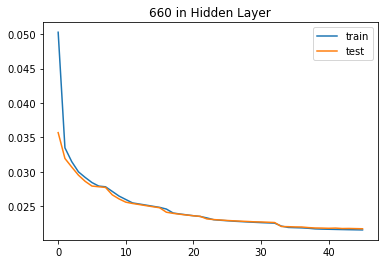

Hidden Nodes: 660
MSE: 0.0218
Non-Orthogonality: 0.043615
Time to Train: 270.12
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 665)               522025    
_________________________________________________________________
output_layer (Dense)         (None, 784)               522144    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,044,169
Trainable params: 1,044,169
Non-trainable params: 0
_________________________________________________________________


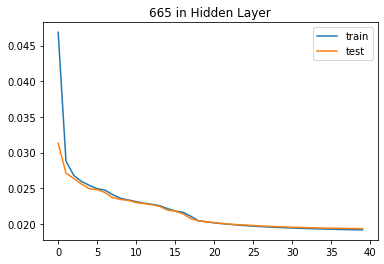

Hidden Nodes: 665
MSE: 0.0194
Non-Orthogonality: 0.041070
Time to Train: 236.95
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 670)               525950    
_________________________________________________________________
output_layer (Dense)         (None, 784)               526064    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,052,014
Trainable params: 1,052,014
Non-trainable params: 0
_________________________________________________________________


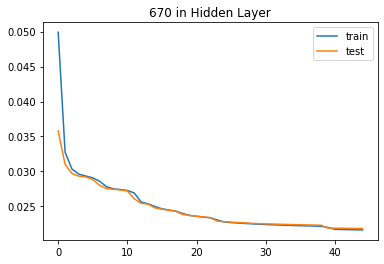

Hidden Nodes: 670
MSE: 0.0219
Non-Orthogonality: 0.042835
Time to Train: 268.46
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 675)               529875    
_________________________________________________________________
output_layer (Dense)         (None, 784)               529984    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,059,859
Trainable params: 1,059,859
Non-trainable params: 0
_________________________________________________________________


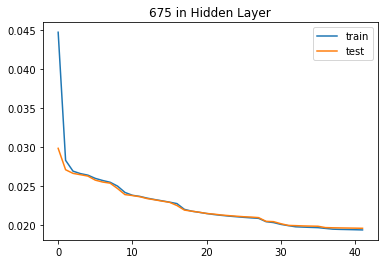

Hidden Nodes: 675
MSE: 0.0196
Non-Orthogonality: 0.041713
Time to Train: 251.94
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 680)               533800    
_________________________________________________________________
output_layer (Dense)         (None, 784)               533904    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,067,704
Trainable params: 1,067,704
Non-trainable params: 0
_________________________________________________________________


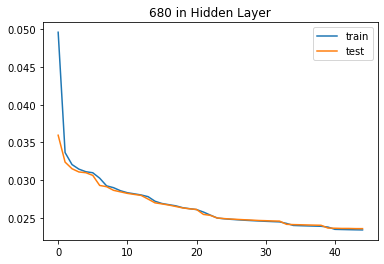

Hidden Nodes: 680
MSE: 0.0237
Non-Orthogonality: 0.042585
Time to Train: 269.16
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 685)               537725    
_________________________________________________________________
output_layer (Dense)         (None, 784)               537824    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,075,549
Trainable params: 1,075,549
Non-trainable params: 0
_________________________________________________________________


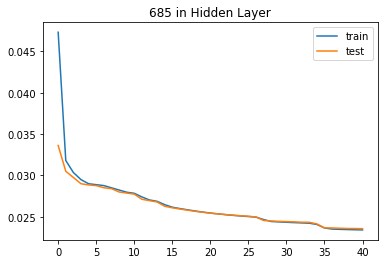

Hidden Nodes: 685
MSE: 0.0237
Non-Orthogonality: 0.042179
Time to Train: 249.28
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 690)               541650    
_________________________________________________________________
output_layer (Dense)         (None, 784)               541744    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,083,394
Trainable params: 1,083,394
Non-trainable params: 0
_________________________________________________________________


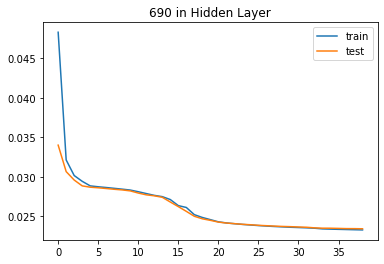

Hidden Nodes: 690
MSE: 0.0235
Non-Orthogonality: 0.040970
Time to Train: 236.57
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 695)               545575    
_________________________________________________________________
output_layer (Dense)         (None, 784)               545664    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,091,239
Trainable params: 1,091,239
Non-trainable params: 0
_________________________________________________________________


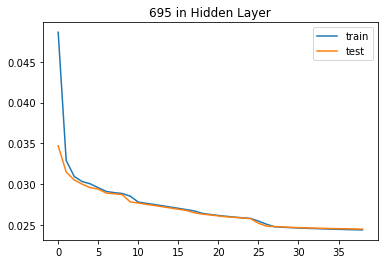

Hidden Nodes: 695
MSE: 0.0246
Non-Orthogonality: 0.040691
Time to Train: 239.21
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 700)               549500    
_________________________________________________________________
output_layer (Dense)         (None, 784)               549584    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,099,084
Trainable params: 1,099,084
Non-trainable params: 0
_________________________________________________________________


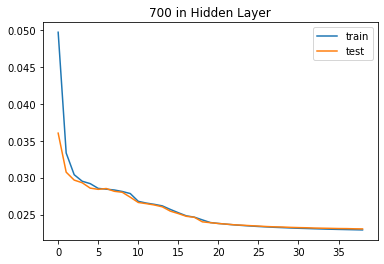

Hidden Nodes: 700
MSE: 0.0232
Non-Orthogonality: 0.041195
Time to Train: 238.78
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 705)               553425    
_________________________________________________________________
output_layer (Dense)         (None, 784)               553504    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,106,929
Trainable params: 1,106,929
Non-trainable params: 0
_________________________________________________________________


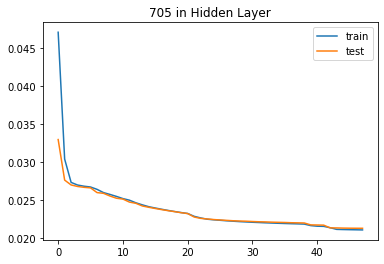

Hidden Nodes: 705
MSE: 0.0214
Non-Orthogonality: 0.043603
Time to Train: 296.04
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 710)               557350    
_________________________________________________________________
output_layer (Dense)         (None, 784)               557424    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,114,774
Trainable params: 1,114,774
Non-trainable params: 0
_________________________________________________________________


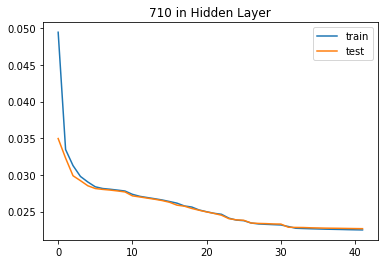

Hidden Nodes: 710
MSE: 0.0227
Non-Orthogonality: 0.041918
Time to Train: 260.67
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 715)               561275    
_________________________________________________________________
output_layer (Dense)         (None, 784)               561344    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,122,619
Trainable params: 1,122,619
Non-trainable params: 0
_________________________________________________________________


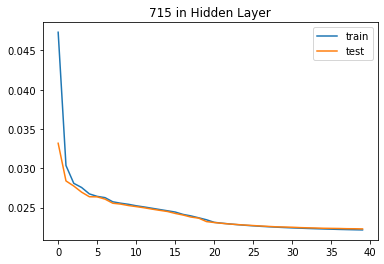

Hidden Nodes: 715
MSE: 0.0224
Non-Orthogonality: 0.041017
Time to Train: 250.06
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 720)               565200    
_________________________________________________________________
output_layer (Dense)         (None, 784)               565264    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,130,464
Trainable params: 1,130,464
Non-trainable params: 0
_________________________________________________________________


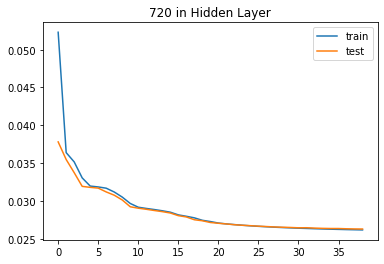

Hidden Nodes: 720
MSE: 0.0264
Non-Orthogonality: 0.040824
Time to Train: 242.41
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 725)               569125    
_________________________________________________________________
output_layer (Dense)         (None, 784)               569184    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,138,309
Trainable params: 1,138,309
Non-trainable params: 0
_________________________________________________________________


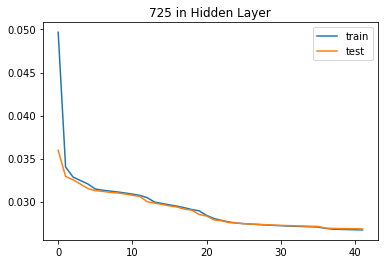

Hidden Nodes: 725
MSE: 0.0269
Non-Orthogonality: 0.041603
Time to Train: 263.95
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 730)               573050    
_________________________________________________________________
output_layer (Dense)         (None, 784)               573104    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,146,154
Trainable params: 1,146,154
Non-trainable params: 0
_________________________________________________________________


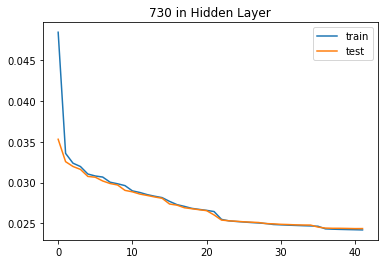

Hidden Nodes: 730
MSE: 0.0244
Non-Orthogonality: 0.041373
Time to Train: 264.09
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 735)               576975    
_________________________________________________________________
output_layer (Dense)         (None, 784)               577024    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,153,999
Trainable params: 1,153,999
Non-trainable params: 0
_________________________________________________________________


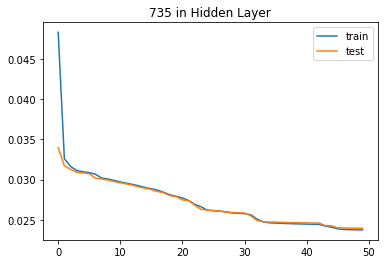

Hidden Nodes: 735
MSE: 0.0240
Non-Orthogonality: 0.044100
Time to Train: 317.82
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 740)               580900    
_________________________________________________________________
output_layer (Dense)         (None, 784)               580944    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,161,844
Trainable params: 1,161,844
Non-trainable params: 0
_________________________________________________________________


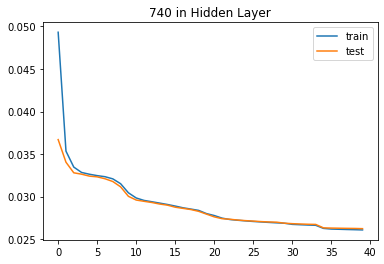

Hidden Nodes: 740
MSE: 0.0264
Non-Orthogonality: 0.041914
Time to Train: 253.83
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 745)               584825    
_________________________________________________________________
output_layer (Dense)         (None, 784)               584864    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,169,689
Trainable params: 1,169,689
Non-trainable params: 0
_________________________________________________________________


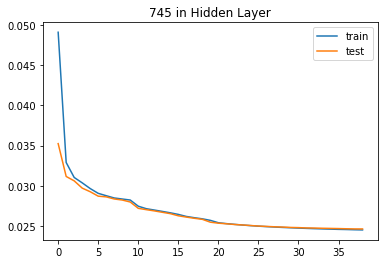

Hidden Nodes: 745
MSE: 0.0247
Non-Orthogonality: 0.041261
Time to Train: 250.08
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 750)               588750    
_________________________________________________________________
output_layer (Dense)         (None, 784)               588784    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,177,534
Trainable params: 1,177,534
Non-trainable params: 0
_________________________________________________________________


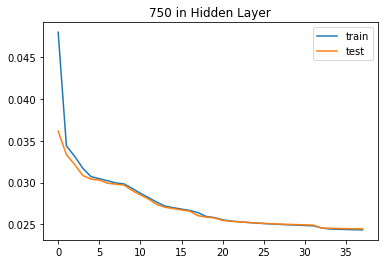

Hidden Nodes: 750
MSE: 0.0246
Non-Orthogonality: 0.040699
Time to Train: 245.99
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 755)               592675    
_________________________________________________________________
output_layer (Dense)         (None, 784)               592704    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,185,379
Trainable params: 1,185,379
Non-trainable params: 0
_________________________________________________________________


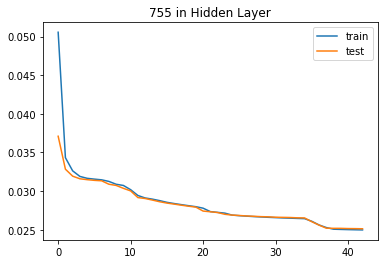

Hidden Nodes: 755
MSE: 0.0252
Non-Orthogonality: 0.042085
Time to Train: 295.58
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 760)               596600    
_________________________________________________________________
output_layer (Dense)         (None, 784)               596624    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,193,224
Trainable params: 1,193,224
Non-trainable params: 0
_________________________________________________________________


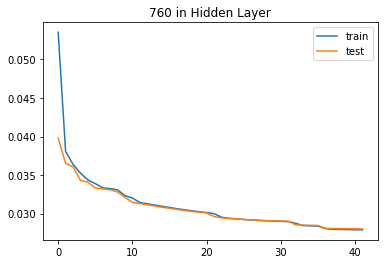

Hidden Nodes: 760
MSE: 0.0281
Non-Orthogonality: 0.042292
Time to Train: 285.76
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 765)               600525    
_________________________________________________________________
output_layer (Dense)         (None, 784)               600544    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,201,069
Trainable params: 1,201,069
Non-trainable params: 0
_________________________________________________________________


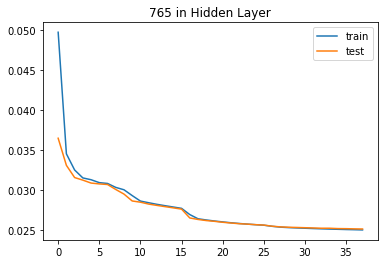

Hidden Nodes: 765
MSE: 0.0253
Non-Orthogonality: 0.041512
Time to Train: 261.33
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 770)               604450    
_________________________________________________________________
output_layer (Dense)         (None, 784)               604464    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,208,914
Trainable params: 1,208,914
Non-trainable params: 0
_________________________________________________________________


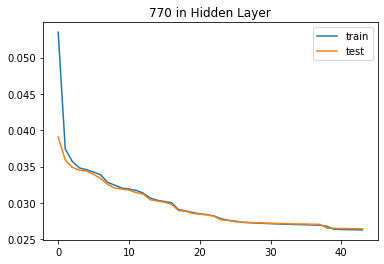

Hidden Nodes: 770
MSE: 0.0265
Non-Orthogonality: 0.042799
Time to Train: 306.46
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 775)               608375    
_________________________________________________________________
output_layer (Dense)         (None, 784)               608384    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,216,759
Trainable params: 1,216,759
Non-trainable params: 0
_________________________________________________________________


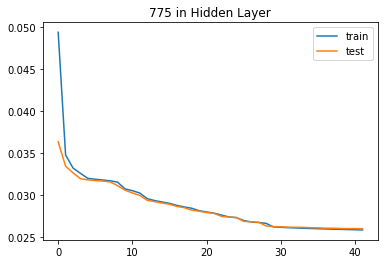

Hidden Nodes: 775
MSE: 0.0261
Non-Orthogonality: 0.042218
Time to Train: 291.31
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 780)               612300    
_________________________________________________________________
output_layer (Dense)         (None, 784)               612304    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,224,604
Trainable params: 1,224,604
Non-trainable params: 0
_________________________________________________________________


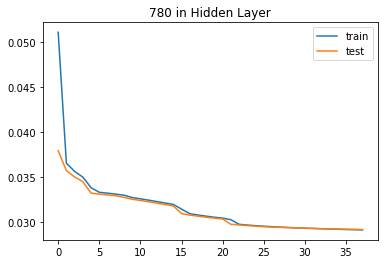

Hidden Nodes: 780
MSE: 0.0293
Non-Orthogonality: 0.040829
Time to Train: 262.53
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 785)               616225    
_________________________________________________________________
output_layer (Dense)         (None, 784)               616224    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,232,449
Trainable params: 1,232,449
Non-trainable params: 0
_________________________________________________________________


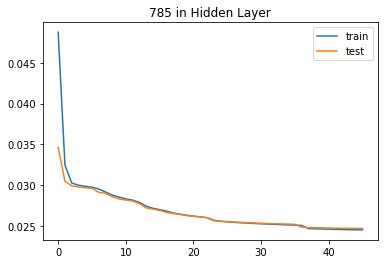

Hidden Nodes: 785
MSE: 0.0248
Non-Orthogonality: 0.043158
Time to Train: 330.06
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 790)               620150    
_________________________________________________________________
output_layer (Dense)         (None, 784)               620144    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,240,294
Trainable params: 1,240,294
Non-trainable params: 0
_________________________________________________________________


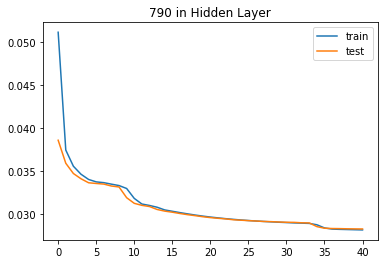

Hidden Nodes: 790
MSE: 0.0284
Non-Orthogonality: 0.042348
Time to Train: 310.53
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 795)               624075    
_________________________________________________________________
output_layer (Dense)         (None, 784)               624064    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,248,139
Trainable params: 1,248,139
Non-trainable params: 0
_________________________________________________________________


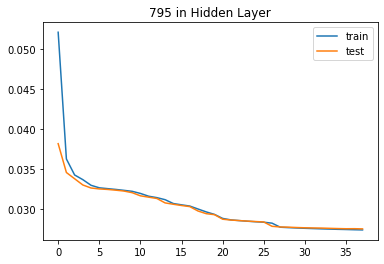

Hidden Nodes: 795
MSE: 0.0277
Non-Orthogonality: 0.040718
Time to Train: 280.36
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 800)               628000    
_________________________________________________________________
output_layer (Dense)         (None, 784)               627984    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,255,984
Trainable params: 1,255,984
Non-trainable params: 0
_________________________________________________________________


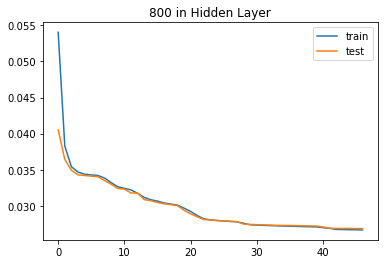

Hidden Nodes: 800
MSE: 0.0270
Non-Orthogonality: 0.043943
Time to Train: 343.01
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 805)               631925    
_________________________________________________________________
output_layer (Dense)         (None, 784)               631904    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,263,829
Trainable params: 1,263,829
Non-trainable params: 0
_________________________________________________________________


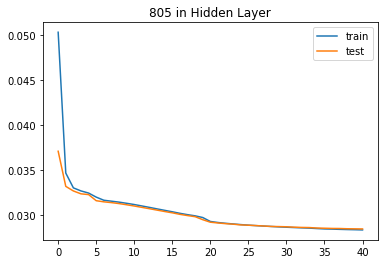

Hidden Nodes: 805
MSE: 0.0285
Non-Orthogonality: 0.041210
Time to Train: 306.25
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 810)               635850    
_________________________________________________________________
output_layer (Dense)         (None, 784)               635824    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,271,674
Trainable params: 1,271,674
Non-trainable params: 0
_________________________________________________________________


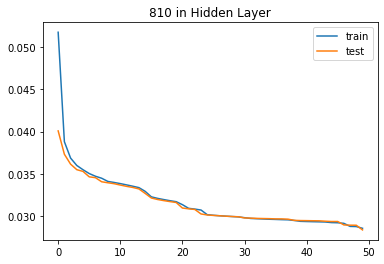

Hidden Nodes: 810
MSE: 0.0285
Non-Orthogonality: 0.044282
Time to Train: 366.41
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 815)               639775    
_________________________________________________________________
output_layer (Dense)         (None, 784)               639744    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,279,519
Trainable params: 1,279,519
Non-trainable params: 0
_________________________________________________________________


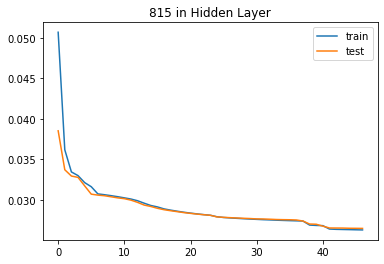

Hidden Nodes: 815
MSE: 0.0265
Non-Orthogonality: 0.043393
Time to Train: 342.74
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 820)               643700    
_________________________________________________________________
output_layer (Dense)         (None, 784)               643664    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,287,364
Trainable params: 1,287,364
Non-trainable params: 0
_________________________________________________________________


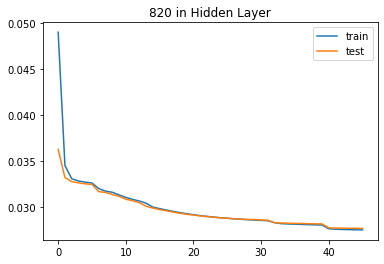

Hidden Nodes: 820
MSE: 0.0278
Non-Orthogonality: 0.043493
Time to Train: 340.81
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 825)               647625    
_________________________________________________________________
output_layer (Dense)         (None, 784)               647584    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,295,209
Trainable params: 1,295,209
Non-trainable params: 0
_________________________________________________________________


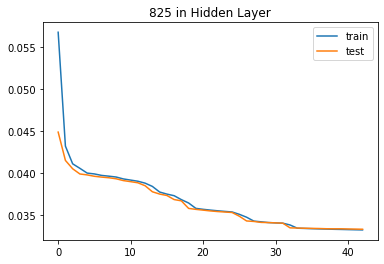

Hidden Nodes: 825
MSE: 0.0335
Non-Orthogonality: 0.042526
Time to Train: 328.62
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 830)               651550    
_________________________________________________________________
output_layer (Dense)         (None, 784)               651504    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,303,054
Trainable params: 1,303,054
Non-trainable params: 0
_________________________________________________________________


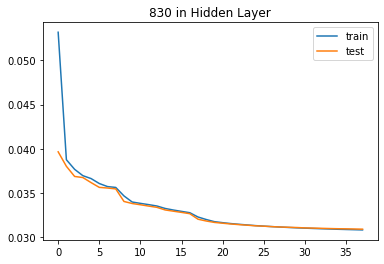

Hidden Nodes: 830
MSE: 0.0310
Non-Orthogonality: 0.041142
Time to Train: 286.44
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 835)               655475    
_________________________________________________________________
output_layer (Dense)         (None, 784)               655424    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,310,899
Trainable params: 1,310,899
Non-trainable params: 0
_________________________________________________________________


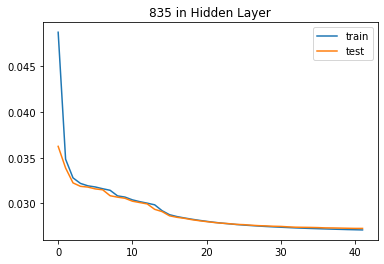

Hidden Nodes: 835
MSE: 0.0273
Non-Orthogonality: 0.041521
Time to Train: 309.69
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 840)               659400    
_________________________________________________________________
output_layer (Dense)         (None, 784)               659344    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,318,744
Trainable params: 1,318,744
Non-trainable params: 0
_________________________________________________________________


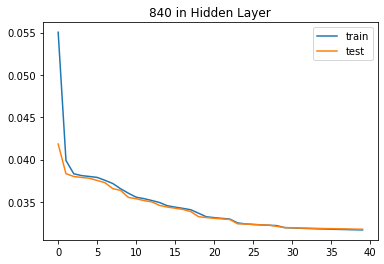

Hidden Nodes: 840
MSE: 0.0319
Non-Orthogonality: 0.040543
Time to Train: 301.47
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 845)               663325    
_________________________________________________________________
output_layer (Dense)         (None, 784)               663264    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,326,589
Trainable params: 1,326,589
Non-trainable params: 0
_________________________________________________________________


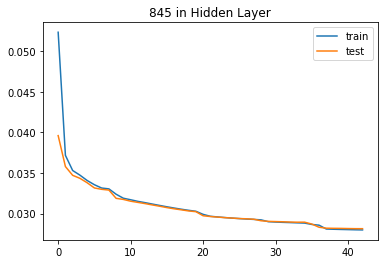

Hidden Nodes: 845
MSE: 0.0283
Non-Orthogonality: 0.041800
Time to Train: 328.63
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 850)               667250    
_________________________________________________________________
output_layer (Dense)         (None, 784)               667184    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,334,434
Trainable params: 1,334,434
Non-trainable params: 0
_________________________________________________________________


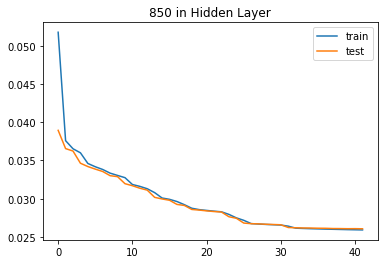

Hidden Nodes: 850
MSE: 0.0262
Non-Orthogonality: 0.042147
Time to Train: 317.40
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 855)               671175    
_________________________________________________________________
output_layer (Dense)         (None, 784)               671104    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,342,279
Trainable params: 1,342,279
Non-trainable params: 0
_________________________________________________________________


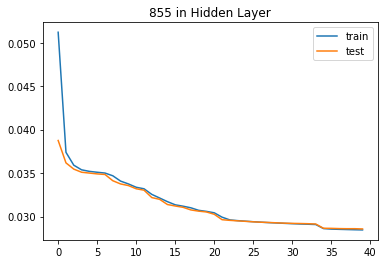

Hidden Nodes: 855
MSE: 0.0287
Non-Orthogonality: 0.042432
Time to Train: 292.11
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 860)               675100    
_________________________________________________________________
output_layer (Dense)         (None, 784)               675024    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,350,124
Trainable params: 1,350,124
Non-trainable params: 0
_________________________________________________________________


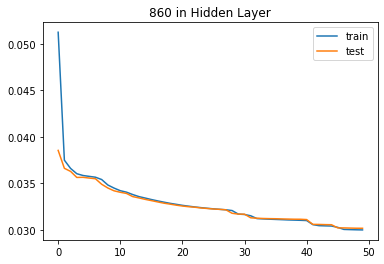

Hidden Nodes: 860
MSE: 0.0303
Non-Orthogonality: 0.044023
Time to Train: 367.43
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 865)               679025    
_________________________________________________________________
output_layer (Dense)         (None, 784)               678944    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,357,969
Trainable params: 1,357,969
Non-trainable params: 0
_________________________________________________________________


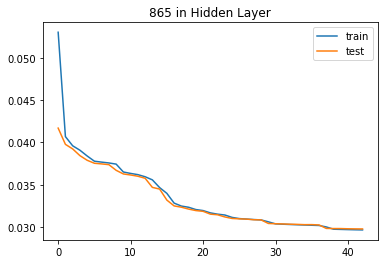

Hidden Nodes: 865
MSE: 0.0299
Non-Orthogonality: 0.042621
Time to Train: 320.43
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 870)               682950    
_________________________________________________________________
output_layer (Dense)         (None, 784)               682864    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,365,814
Trainable params: 1,365,814
Non-trainable params: 0
_________________________________________________________________


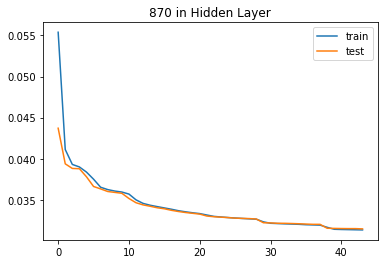

Hidden Nodes: 870
MSE: 0.0316
Non-Orthogonality: 0.042414
Time to Train: 344.79
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 875)               686875    
_________________________________________________________________
output_layer (Dense)         (None, 784)               686784    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,373,659
Trainable params: 1,373,659
Non-trainable params: 0
_________________________________________________________________


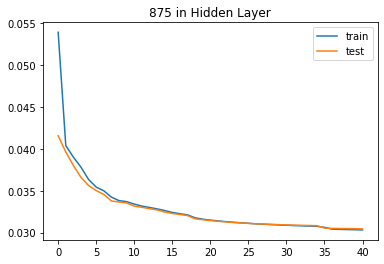

Hidden Nodes: 875
MSE: 0.0305
Non-Orthogonality: 0.041649
Time to Train: 325.04
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 880)               690800    
_________________________________________________________________
output_layer (Dense)         (None, 784)               690704    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,381,504
Trainable params: 1,381,504
Non-trainable params: 0
_________________________________________________________________


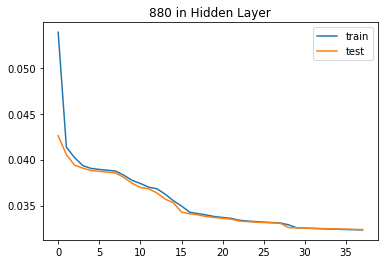

Hidden Nodes: 880
MSE: 0.0325
Non-Orthogonality: 0.041328
Time to Train: 298.33
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 885)               694725    
_________________________________________________________________
output_layer (Dense)         (None, 784)               694624    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,389,349
Trainable params: 1,389,349
Non-trainable params: 0
_________________________________________________________________


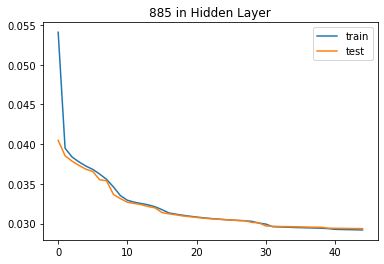

Hidden Nodes: 885
MSE: 0.0295
Non-Orthogonality: 0.043485
Time to Train: 358.93
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 890)               698650    
_________________________________________________________________
output_layer (Dense)         (None, 784)               698544    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,397,194
Trainable params: 1,397,194
Non-trainable params: 0
_________________________________________________________________


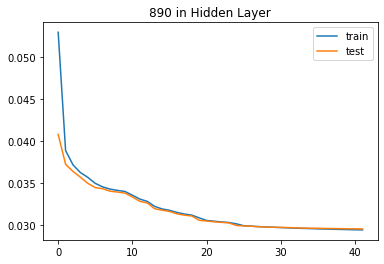

Hidden Nodes: 890
MSE: 0.0297
Non-Orthogonality: 0.041951
Time to Train: 336.16
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 895)               702575    
_________________________________________________________________
output_layer (Dense)         (None, 784)               702464    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,405,039
Trainable params: 1,405,039
Non-trainable params: 0
_________________________________________________________________


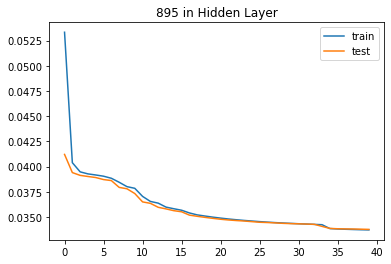

Hidden Nodes: 895
MSE: 0.0339
Non-Orthogonality: 0.042295
Time to Train: 313.24
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 900)               706500    
_________________________________________________________________
output_layer (Dense)         (None, 784)               706384    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,412,884
Trainable params: 1,412,884
Non-trainable params: 0
_________________________________________________________________


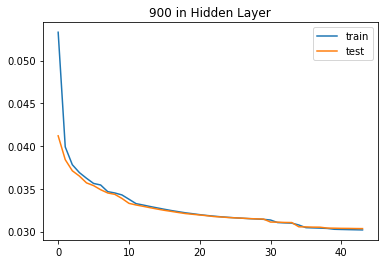

Hidden Nodes: 900
MSE: 0.0305
Non-Orthogonality: 0.042959
Time to Train: 334.17
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 905)               710425    
_________________________________________________________________
output_layer (Dense)         (None, 784)               710304    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,420,729
Trainable params: 1,420,729
Non-trainable params: 0
_________________________________________________________________


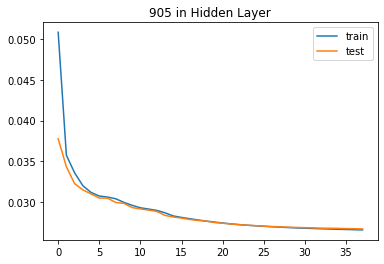

Hidden Nodes: 905
MSE: 0.0267
Non-Orthogonality: 0.041271
Time to Train: 300.96
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 910)               714350    
_________________________________________________________________
output_layer (Dense)         (None, 784)               714224    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,428,574
Trainable params: 1,428,574
Non-trainable params: 0
_________________________________________________________________


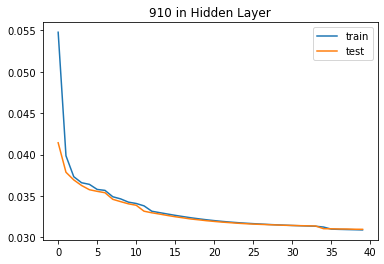

Hidden Nodes: 910
MSE: 0.0311
Non-Orthogonality: 0.041037
Time to Train: 323.54
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 915)               718275    
_________________________________________________________________
output_layer (Dense)         (None, 784)               718144    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,436,419
Trainable params: 1,436,419
Non-trainable params: 0
_________________________________________________________________


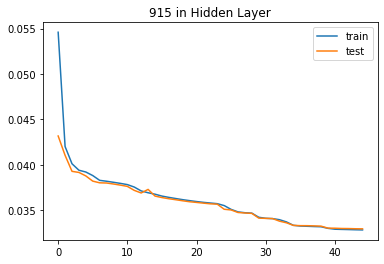

Hidden Nodes: 915
MSE: 0.0331
Non-Orthogonality: 0.044991
Time to Train: 368.09
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 920)               722200    
_________________________________________________________________
output_layer (Dense)         (None, 784)               722064    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,444,264
Trainable params: 1,444,264
Non-trainable params: 0
_________________________________________________________________


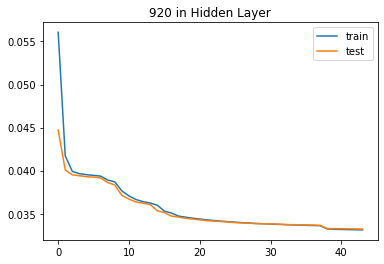

Hidden Nodes: 920
MSE: 0.0334
Non-Orthogonality: 0.043846
Time to Train: 359.16
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 925)               726125    
_________________________________________________________________
output_layer (Dense)         (None, 784)               725984    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,452,109
Trainable params: 1,452,109
Non-trainable params: 0
_________________________________________________________________


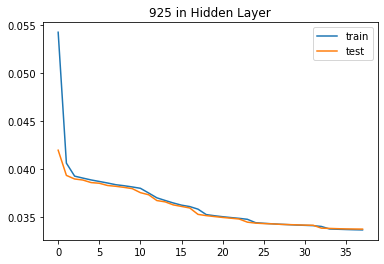

Hidden Nodes: 925
MSE: 0.0339
Non-Orthogonality: 0.041389
Time to Train: 305.64
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 930)               730050    
_________________________________________________________________
output_layer (Dense)         (None, 784)               729904    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,459,954
Trainable params: 1,459,954
Non-trainable params: 0
_________________________________________________________________


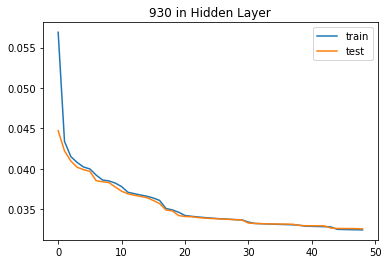

Hidden Nodes: 930
MSE: 0.0327
Non-Orthogonality: 0.045376
Time to Train: 394.55
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 935)               733975    
_________________________________________________________________
output_layer (Dense)         (None, 784)               733824    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,467,799
Trainable params: 1,467,799
Non-trainable params: 0
_________________________________________________________________


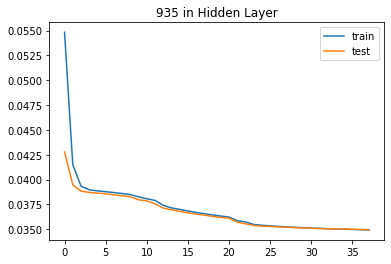

Hidden Nodes: 935
MSE: 0.0351
Non-Orthogonality: 0.041374
Time to Train: 306.06
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 940)               737900    
_________________________________________________________________
output_layer (Dense)         (None, 784)               737744    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,475,644
Trainable params: 1,475,644
Non-trainable params: 0
_________________________________________________________________


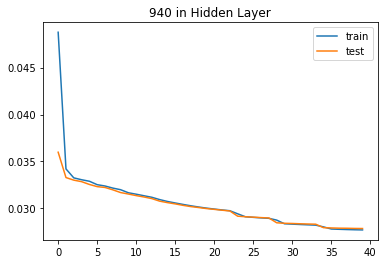

Hidden Nodes: 940
MSE: 0.0280
Non-Orthogonality: 0.041350
Time to Train: 327.22
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 945)               741825    
_________________________________________________________________
output_layer (Dense)         (None, 784)               741664    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,483,489
Trainable params: 1,483,489
Non-trainable params: 0
_________________________________________________________________


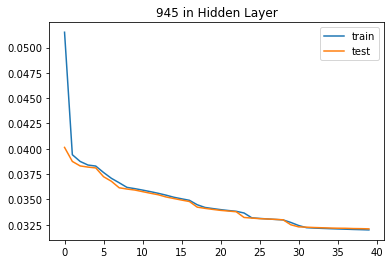

Hidden Nodes: 945
MSE: 0.0322
Non-Orthogonality: 0.043105
Time to Train: 317.90
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 950)               745750    
_________________________________________________________________
output_layer (Dense)         (None, 784)               745584    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,491,334
Trainable params: 1,491,334
Non-trainable params: 0
_________________________________________________________________


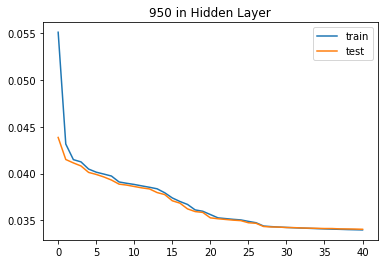

Hidden Nodes: 950
MSE: 0.0342
Non-Orthogonality: 0.045330
Time to Train: 326.46
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 955)               749675    
_________________________________________________________________
output_layer (Dense)         (None, 784)               749504    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,499,179
Trainable params: 1,499,179
Non-trainable params: 0
_________________________________________________________________


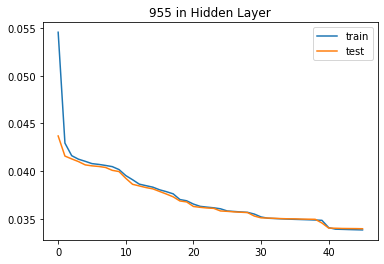

Hidden Nodes: 955
MSE: 0.0341
Non-Orthogonality: 0.043855
Time to Train: 367.59
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 960)               753600    
_________________________________________________________________
output_layer (Dense)         (None, 784)               753424    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,507,024
Trainable params: 1,507,024
Non-trainable params: 0
_________________________________________________________________


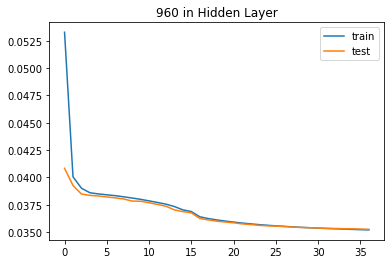

Hidden Nodes: 960
MSE: 0.0354
Non-Orthogonality: 0.041628
Time to Train: 291.43
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 965)               757525    
_________________________________________________________________
output_layer (Dense)         (None, 784)               757344    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,514,869
Trainable params: 1,514,869
Non-trainable params: 0
_________________________________________________________________


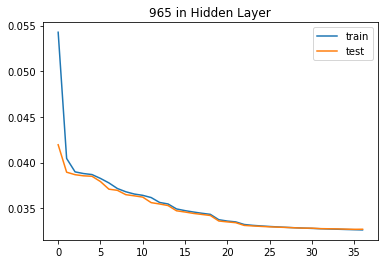

Hidden Nodes: 965
MSE: 0.0328
Non-Orthogonality: 0.041194
Time to Train: 298.62
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 970)               761450    
_________________________________________________________________
output_layer (Dense)         (None, 784)               761264    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,522,714
Trainable params: 1,522,714
Non-trainable params: 0
_________________________________________________________________


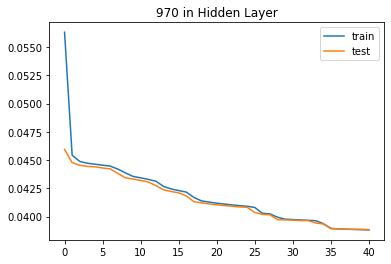

Hidden Nodes: 970
MSE: 0.0391
Non-Orthogonality: 0.043210
Time to Train: 330.52
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 975)               765375    
_________________________________________________________________
output_layer (Dense)         (None, 784)               765184    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,530,559
Trainable params: 1,530,559
Non-trainable params: 0
_________________________________________________________________


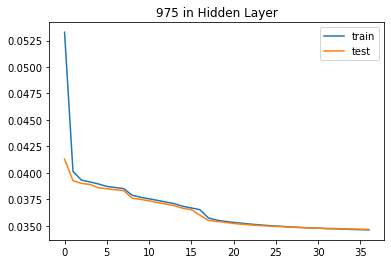

Hidden Nodes: 975
MSE: 0.0348
Non-Orthogonality: 0.041538
Time to Train: 299.11
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 980)               769300    
_________________________________________________________________
output_layer (Dense)         (None, 784)               769104    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,538,404
Trainable params: 1,538,404
Non-trainable params: 0
_________________________________________________________________


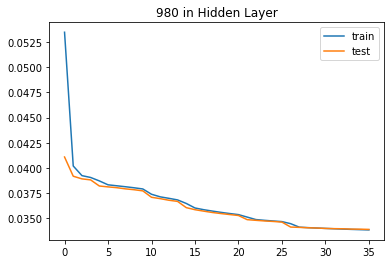

Hidden Nodes: 980
MSE: 0.0341
Non-Orthogonality: 0.039175
Time to Train: 291.70
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 985)               773225    
_________________________________________________________________
output_layer (Dense)         (None, 784)               773024    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,546,249
Trainable params: 1,546,249
Non-trainable params: 0
_________________________________________________________________


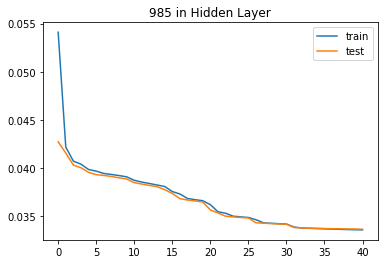

Hidden Nodes: 985
MSE: 0.0338
Non-Orthogonality: 0.041484
Time to Train: 336.36
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 990)               777150    
_________________________________________________________________
output_layer (Dense)         (None, 784)               776944    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,554,094
Trainable params: 1,554,094
Non-trainable params: 0
_________________________________________________________________


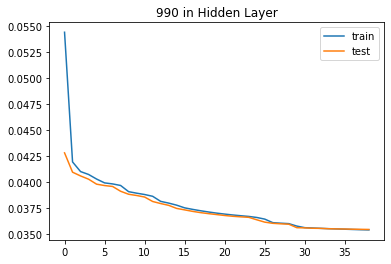

Hidden Nodes: 990
MSE: 0.0356
Non-Orthogonality: 0.043069
Time to Train: 329.62
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 995)               781075    
_________________________________________________________________
output_layer (Dense)         (None, 784)               780864    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,561,939
Trainable params: 1,561,939
Non-trainable params: 0
_________________________________________________________________


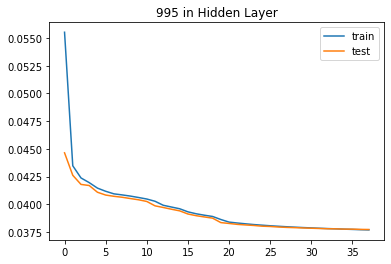

Hidden Nodes: 995
MSE: 0.0379
Non-Orthogonality: 0.042208
Time to Train: 324.22
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1000)              785000    
_________________________________________________________________
output_layer (Dense)         (None, 784)               784784    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,569,784
Trainable params: 1,569,784
Non-trainable params: 0
_________________________________________________________________


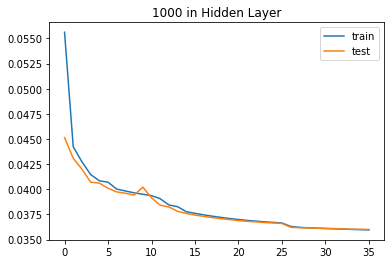

Hidden Nodes: 1000
MSE: 0.0361
Non-Orthogonality: 0.041045
Time to Train: 324.49
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1005)              788925    
_________________________________________________________________
output_layer (Dense)         (None, 784)               788704    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,577,629
Trainable params: 1,577,629
Non-trainable params: 0
_________________________________________________________________


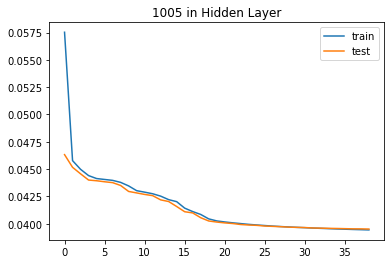

Hidden Nodes: 1005
MSE: 0.0396
Non-Orthogonality: 0.042279
Time to Train: 351.60
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1010)              792850    
_________________________________________________________________
output_layer (Dense)         (None, 784)               792624    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,585,474
Trainable params: 1,585,474
Non-trainable params: 0
_________________________________________________________________


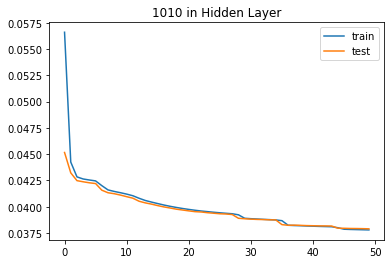

Hidden Nodes: 1010
MSE: 0.0381
Non-Orthogonality: 0.045888
Time to Train: 451.87
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1015)              796775    
_________________________________________________________________
output_layer (Dense)         (None, 784)               796544    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,593,319
Trainable params: 1,593,319
Non-trainable params: 0
_________________________________________________________________


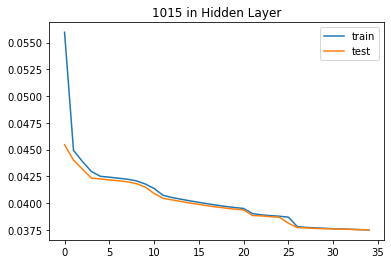

Hidden Nodes: 1015
MSE: 0.0377
Non-Orthogonality: 0.040258
Time to Train: 330.80
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1020)              800700    
_________________________________________________________________
output_layer (Dense)         (None, 784)               800464    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,601,164
Trainable params: 1,601,164
Non-trainable params: 0
_________________________________________________________________


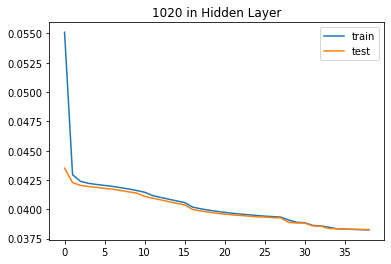

Hidden Nodes: 1020
MSE: 0.0384
Non-Orthogonality: 0.042858
Time to Train: 377.05
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1025)              804625    
_________________________________________________________________
output_layer (Dense)         (None, 784)               804384    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,609,009
Trainable params: 1,609,009
Non-trainable params: 0
_________________________________________________________________


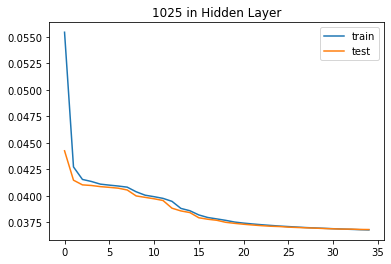

Hidden Nodes: 1025
MSE: 0.0369
Non-Orthogonality: 0.041494
Time to Train: 338.56
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1030)              808550    
_________________________________________________________________
output_layer (Dense)         (None, 784)               808304    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,616,854
Trainable params: 1,616,854
Non-trainable params: 0
_________________________________________________________________


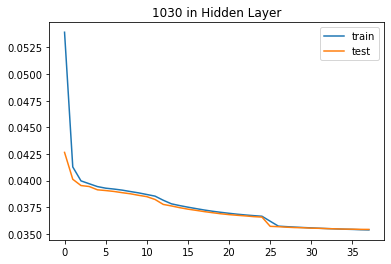

Hidden Nodes: 1030
MSE: 0.0356
Non-Orthogonality: 0.041929
Time to Train: 369.03
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1035)              812475    
_________________________________________________________________
output_layer (Dense)         (None, 784)               812224    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,624,699
Trainable params: 1,624,699
Non-trainable params: 0
_________________________________________________________________


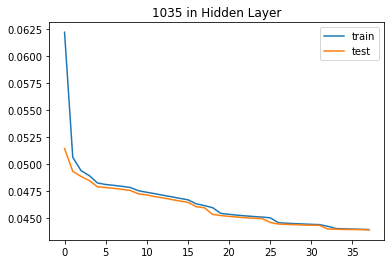

Hidden Nodes: 1035
MSE: 0.0440
Non-Orthogonality: 0.042380
Time to Train: 373.35
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1040)              816400    
_________________________________________________________________
output_layer (Dense)         (None, 784)               816144    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,632,544
Trainable params: 1,632,544
Non-trainable params: 0
_________________________________________________________________


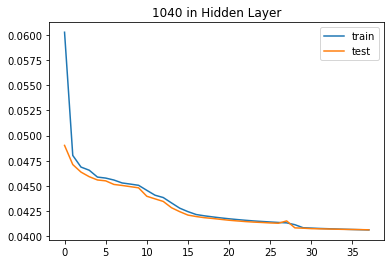

Hidden Nodes: 1040
MSE: 0.0408
Non-Orthogonality: 0.042198
Time to Train: 368.92
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1045)              820325    
_________________________________________________________________
output_layer (Dense)         (None, 784)               820064    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,640,389
Trainable params: 1,640,389
Non-trainable params: 0
_________________________________________________________________


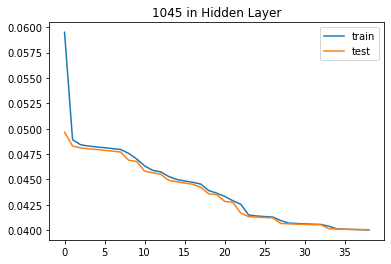

Hidden Nodes: 1045
MSE: 0.0402
Non-Orthogonality: 0.042784
Time to Train: 386.39
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1050)              824250    
_________________________________________________________________
output_layer (Dense)         (None, 784)               823984    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,648,234
Trainable params: 1,648,234
Non-trainable params: 0
_________________________________________________________________


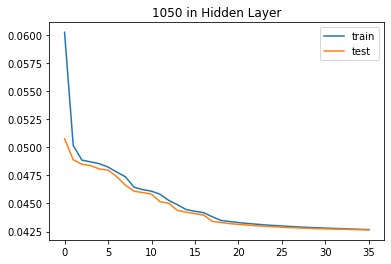

Hidden Nodes: 1050
MSE: 0.0428
Non-Orthogonality: 0.041380
Time to Train: 357.48
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1055)              828175    
_________________________________________________________________
output_layer (Dense)         (None, 784)               827904    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,656,079
Trainable params: 1,656,079
Non-trainable params: 0
_________________________________________________________________


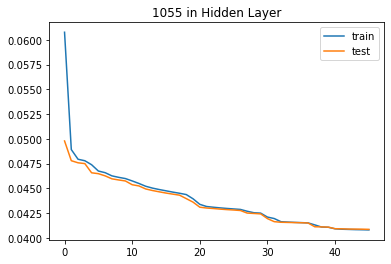

Hidden Nodes: 1055
MSE: 0.0410
Non-Orthogonality: 0.045294
Time to Train: 457.36
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1060)              832100    
_________________________________________________________________
output_layer (Dense)         (None, 784)               831824    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,663,924
Trainable params: 1,663,924
Non-trainable params: 0
_________________________________________________________________


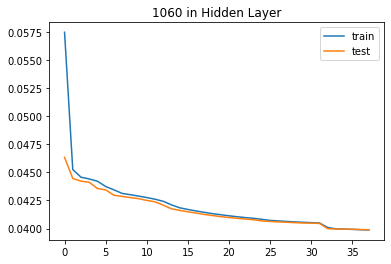

Hidden Nodes: 1060
MSE: 0.0401
Non-Orthogonality: 0.043851
Time to Train: 380.08
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1065)              836025    
_________________________________________________________________
output_layer (Dense)         (None, 784)               835744    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,671,769
Trainable params: 1,671,769
Non-trainable params: 0
_________________________________________________________________


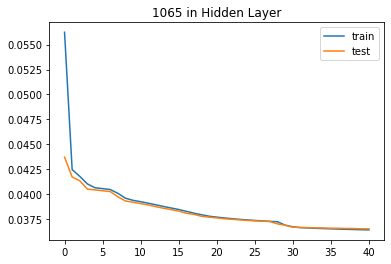

Hidden Nodes: 1065
MSE: 0.0366
Non-Orthogonality: 0.043182
Time to Train: 413.63
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1070)              839950    
_________________________________________________________________
output_layer (Dense)         (None, 784)               839664    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,679,614
Trainable params: 1,679,614
Non-trainable params: 0
_________________________________________________________________


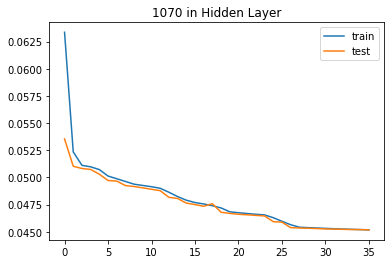

Hidden Nodes: 1070
MSE: 0.0453
Non-Orthogonality: 0.044173
Time to Train: 366.30
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1075)              843875    
_________________________________________________________________
output_layer (Dense)         (None, 784)               843584    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,687,459
Trainable params: 1,687,459
Non-trainable params: 0
_________________________________________________________________


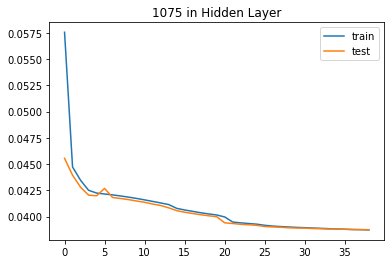

Hidden Nodes: 1075
MSE: 0.0389
Non-Orthogonality: 0.042357
Time to Train: 383.20
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1080)              847800    
_________________________________________________________________
output_layer (Dense)         (None, 784)               847504    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,695,304
Trainable params: 1,695,304
Non-trainable params: 0
_________________________________________________________________


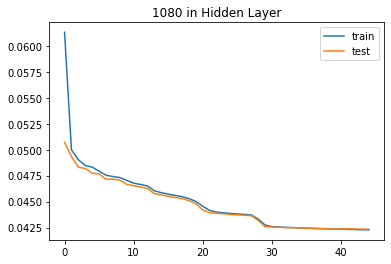

Hidden Nodes: 1080
MSE: 0.0425
Non-Orthogonality: 0.045377
Time to Train: 421.62
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1085)              851725    
_________________________________________________________________
output_layer (Dense)         (None, 784)               851424    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,703,149
Trainable params: 1,703,149
Non-trainable params: 0
_________________________________________________________________


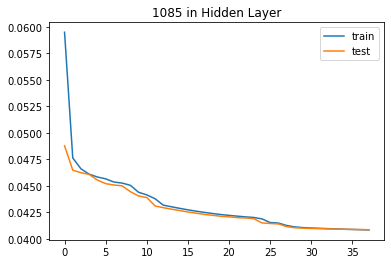

Hidden Nodes: 1085
MSE: 0.0410
Non-Orthogonality: 0.044857
Time to Train: 361.52
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1090)              855650    
_________________________________________________________________
output_layer (Dense)         (None, 784)               855344    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,710,994
Trainable params: 1,710,994
Non-trainable params: 0
_________________________________________________________________


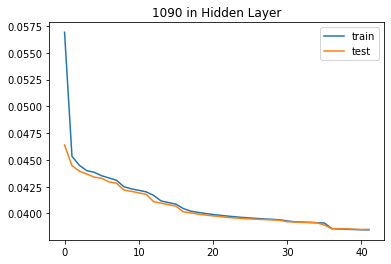

Hidden Nodes: 1090
MSE: 0.0387
Non-Orthogonality: 0.043520
Time to Train: 410.78
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1095)              859575    
_________________________________________________________________
output_layer (Dense)         (None, 784)               859264    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,718,839
Trainable params: 1,718,839
Non-trainable params: 0
_________________________________________________________________


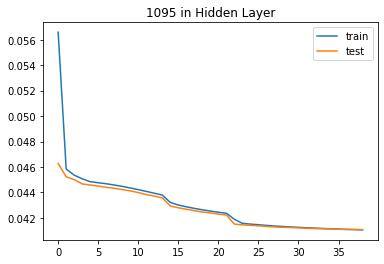

Hidden Nodes: 1095
MSE: 0.0413
Non-Orthogonality: 0.043781
Time to Train: 395.54
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1100)              863500    
_________________________________________________________________
output_layer (Dense)         (None, 784)               863184    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,726,684
Trainable params: 1,726,684
Non-trainable params: 0
_________________________________________________________________


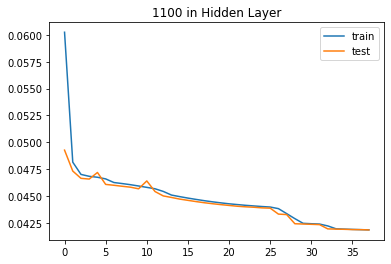

Hidden Nodes: 1100
MSE: 0.0420
Non-Orthogonality: 0.042292
Time to Train: 376.11
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1105)              867425    
_________________________________________________________________
output_layer (Dense)         (None, 784)               867104    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,734,529
Trainable params: 1,734,529
Non-trainable params: 0
_________________________________________________________________


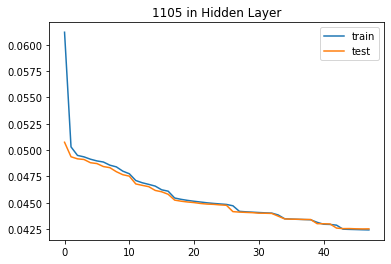

Hidden Nodes: 1105
MSE: 0.0427
Non-Orthogonality: 0.045060
Time to Train: 465.16
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1110)              871350    
_________________________________________________________________
output_layer (Dense)         (None, 784)               871024    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,742,374
Trainable params: 1,742,374
Non-trainable params: 0
_________________________________________________________________


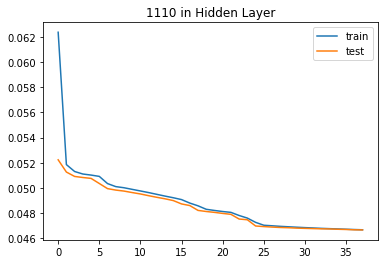

Hidden Nodes: 1110
MSE: 0.0468
Non-Orthogonality: 0.043670
Time to Train: 371.36
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1115)              875275    
_________________________________________________________________
output_layer (Dense)         (None, 784)               874944    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,750,219
Trainable params: 1,750,219
Non-trainable params: 0
_________________________________________________________________


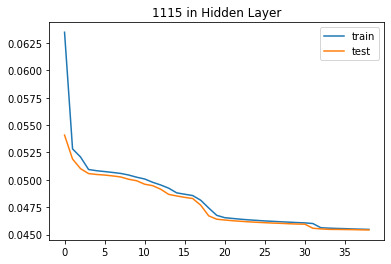

Hidden Nodes: 1115
MSE: 0.0456
Non-Orthogonality: 0.047856
Time to Train: 381.86
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1120)              879200    
_________________________________________________________________
output_layer (Dense)         (None, 784)               878864    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,758,064
Trainable params: 1,758,064
Non-trainable params: 0
_________________________________________________________________


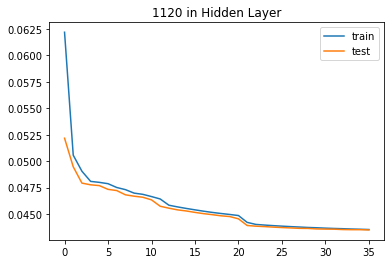

Hidden Nodes: 1120
MSE: 0.0437
Non-Orthogonality: 0.040591
Time to Train: 355.25
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1125)              883125    
_________________________________________________________________
output_layer (Dense)         (None, 784)               882784    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,765,909
Trainable params: 1,765,909
Non-trainable params: 0
_________________________________________________________________


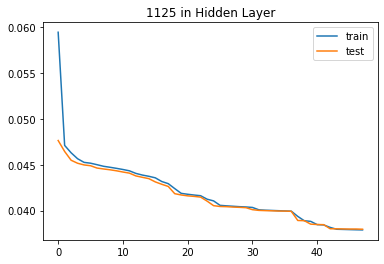

Hidden Nodes: 1125
MSE: 0.0381
Non-Orthogonality: 0.047926
Time to Train: 479.23
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1130)              887050    
_________________________________________________________________
output_layer (Dense)         (None, 784)               886704    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,773,754
Trainable params: 1,773,754
Non-trainable params: 0
_________________________________________________________________


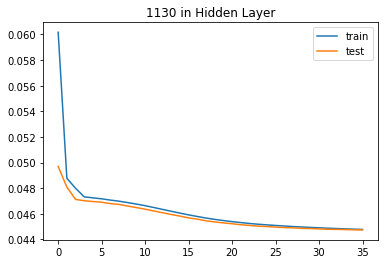

Hidden Nodes: 1130
MSE: 0.0449
Non-Orthogonality: 0.041270
Time to Train: 365.21
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1135)              890975    
_________________________________________________________________
output_layer (Dense)         (None, 784)               890624    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,781,599
Trainable params: 1,781,599
Non-trainable params: 0
_________________________________________________________________


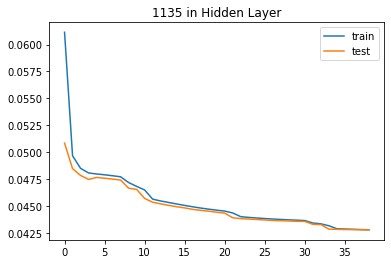

Hidden Nodes: 1135
MSE: 0.0430
Non-Orthogonality: 0.044085
Time to Train: 393.58
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1140)              894900    
_________________________________________________________________
output_layer (Dense)         (None, 784)               894544    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,789,444
Trainable params: 1,789,444
Non-trainable params: 0
_________________________________________________________________


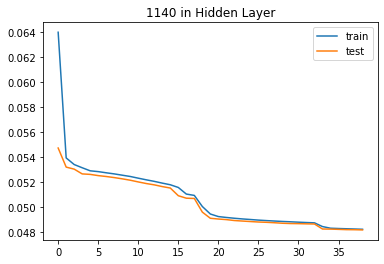

Hidden Nodes: 1140
MSE: 0.0484
Non-Orthogonality: 0.046436
Time to Train: 396.29
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1145)              898825    
_________________________________________________________________
output_layer (Dense)         (None, 784)               898464    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,797,289
Trainable params: 1,797,289
Non-trainable params: 0
_________________________________________________________________


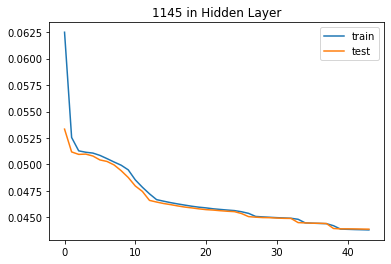

Hidden Nodes: 1145
MSE: 0.0440
Non-Orthogonality: 0.048823
Time to Train: 443.19
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1150)              902750    
_________________________________________________________________
output_layer (Dense)         (None, 784)               902384    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,805,134
Trainable params: 1,805,134
Non-trainable params: 0
_________________________________________________________________


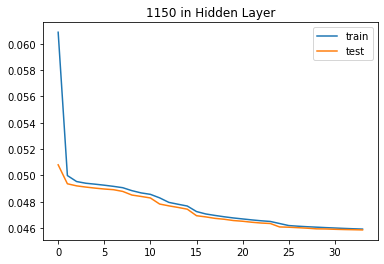

Hidden Nodes: 1150
MSE: 0.0460
Non-Orthogonality: 0.043384
Time to Train: 346.81
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1155)              906675    
_________________________________________________________________
output_layer (Dense)         (None, 784)               906304    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,812,979
Trainable params: 1,812,979
Non-trainable params: 0
_________________________________________________________________


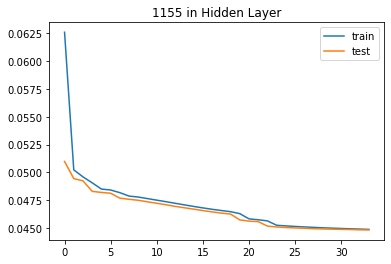

Hidden Nodes: 1155
MSE: 0.0450
Non-Orthogonality: 0.042220
Time to Train: 344.27
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1160)              910600    
_________________________________________________________________
output_layer (Dense)         (None, 784)               910224    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,820,824
Trainable params: 1,820,824
Non-trainable params: 0
_________________________________________________________________


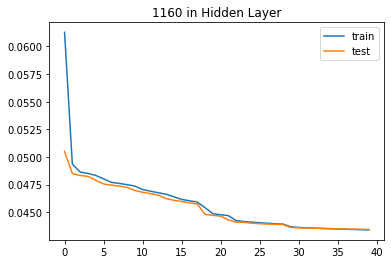

Hidden Nodes: 1160
MSE: 0.0436
Non-Orthogonality: 0.045304
Time to Train: 417.69
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1165)              914525    
_________________________________________________________________
output_layer (Dense)         (None, 784)               914144    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,828,669
Trainable params: 1,828,669
Non-trainable params: 0
_________________________________________________________________


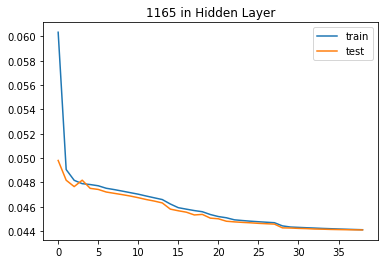

Hidden Nodes: 1165
MSE: 0.0443
Non-Orthogonality: 0.045329
Time to Train: 424.59
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1170)              918450    
_________________________________________________________________
output_layer (Dense)         (None, 784)               918064    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,836,514
Trainable params: 1,836,514
Non-trainable params: 0
_________________________________________________________________


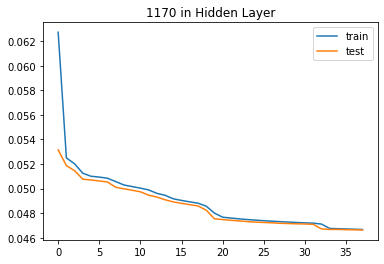

Hidden Nodes: 1170
MSE: 0.0468
Non-Orthogonality: 0.042148
Time to Train: 410.20
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1175)              922375    
_________________________________________________________________
output_layer (Dense)         (None, 784)               921984    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,844,359
Trainable params: 1,844,359
Non-trainable params: 0
_________________________________________________________________


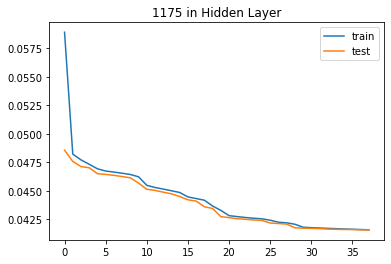

Hidden Nodes: 1175
MSE: 0.0418
Non-Orthogonality: 0.044020
Time to Train: 389.04
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1180)              926300    
_________________________________________________________________
output_layer (Dense)         (None, 784)               925904    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,852,204
Trainable params: 1,852,204
Non-trainable params: 0
_________________________________________________________________


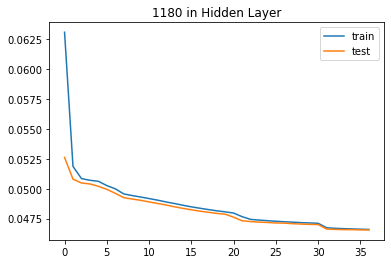

Hidden Nodes: 1180
MSE: 0.0468
Non-Orthogonality: 0.045204
Time to Train: 384.61
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1185)              930225    
_________________________________________________________________
output_layer (Dense)         (None, 784)               929824    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,860,049
Trainable params: 1,860,049
Non-trainable params: 0
_________________________________________________________________


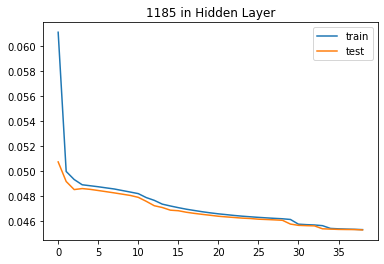

Hidden Nodes: 1185
MSE: 0.0455
Non-Orthogonality: 0.045455
Time to Train: 403.32
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1190)              934150    
_________________________________________________________________
output_layer (Dense)         (None, 784)               933744    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,867,894
Trainable params: 1,867,894
Non-trainable params: 0
_________________________________________________________________


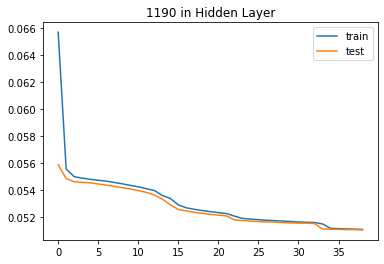

Hidden Nodes: 1190
MSE: 0.0512
Non-Orthogonality: 0.047079
Time to Train: 405.87
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1195)              938075    
_________________________________________________________________
output_layer (Dense)         (None, 784)               937664    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,875,739
Trainable params: 1,875,739
Non-trainable params: 0
_________________________________________________________________


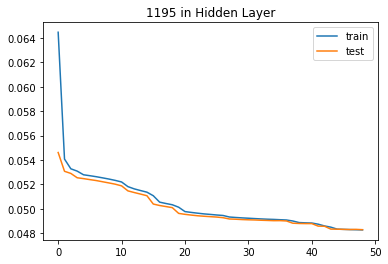

Hidden Nodes: 1195
MSE: 0.0484
Non-Orthogonality: 0.048328
Time to Train: 501.22
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1200)              942000    
_________________________________________________________________
output_layer (Dense)         (None, 784)               941584    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,883,584
Trainable params: 1,883,584
Non-trainable params: 0
_________________________________________________________________


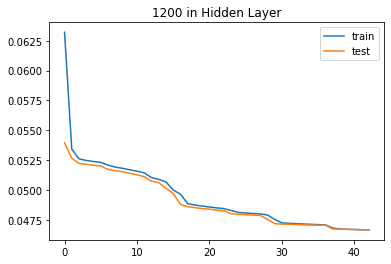

Hidden Nodes: 1200
MSE: 0.0469
Non-Orthogonality: 0.046588
Time to Train: 432.64
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1205)              945925    
_________________________________________________________________
output_layer (Dense)         (None, 784)               945504    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,891,429
Trainable params: 1,891,429
Non-trainable params: 0
_________________________________________________________________


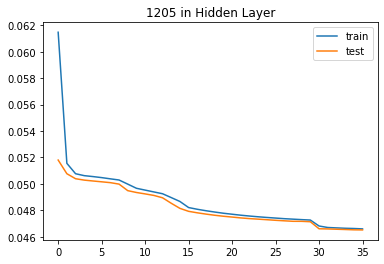

Hidden Nodes: 1205
MSE: 0.0467
Non-Orthogonality: 0.043164
Time to Train: 366.12
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1210)              949850    
_________________________________________________________________
output_layer (Dense)         (None, 784)               949424    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,899,274
Trainable params: 1,899,274
Non-trainable params: 0
_________________________________________________________________


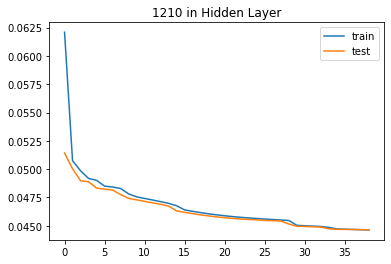

Hidden Nodes: 1210
MSE: 0.0448
Non-Orthogonality: 0.044375
Time to Train: 389.67
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1215)              953775    
_________________________________________________________________
output_layer (Dense)         (None, 784)               953344    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,907,119
Trainable params: 1,907,119
Non-trainable params: 0
_________________________________________________________________


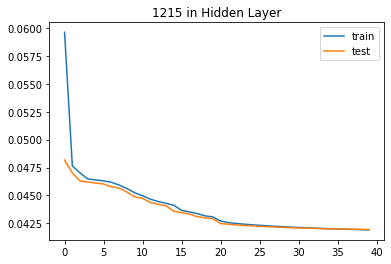

Hidden Nodes: 1215
MSE: 0.0421
Non-Orthogonality: 0.044787
Time to Train: 400.06
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1220)              957700    
_________________________________________________________________
output_layer (Dense)         (None, 784)               957264    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,914,964
Trainable params: 1,914,964
Non-trainable params: 0
_________________________________________________________________


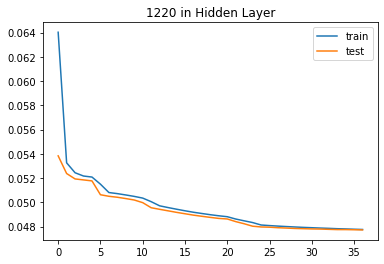

Hidden Nodes: 1220
MSE: 0.0479
Non-Orthogonality: 0.043454
Time to Train: 369.80
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1225)              961625    
_________________________________________________________________
output_layer (Dense)         (None, 784)               961184    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,922,809
Trainable params: 1,922,809
Non-trainable params: 0
_________________________________________________________________


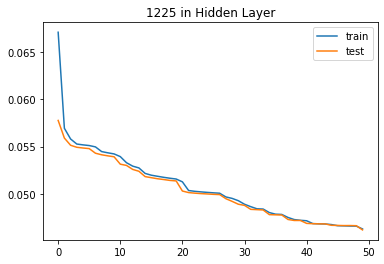

Hidden Nodes: 1225
MSE: 0.0464
Non-Orthogonality: 0.048008
Time to Train: 512.28
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1230)              965550    
_________________________________________________________________
output_layer (Dense)         (None, 784)               965104    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,930,654
Trainable params: 1,930,654
Non-trainable params: 0
_________________________________________________________________


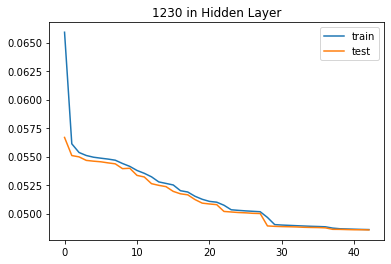

Hidden Nodes: 1230
MSE: 0.0487
Non-Orthogonality: 0.045942
Time to Train: 447.83
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1235)              969475    
_________________________________________________________________
output_layer (Dense)         (None, 784)               969024    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,938,499
Trainable params: 1,938,499
Non-trainable params: 0
_________________________________________________________________


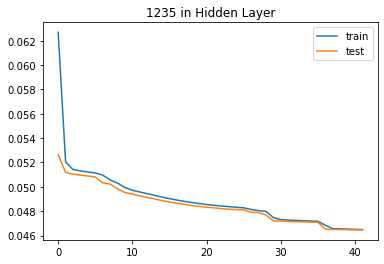

Hidden Nodes: 1235
MSE: 0.0467
Non-Orthogonality: 0.048470
Time to Train: 431.25
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1240)              973400    
_________________________________________________________________
output_layer (Dense)         (None, 784)               972944    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,946,344
Trainable params: 1,946,344
Non-trainable params: 0
_________________________________________________________________


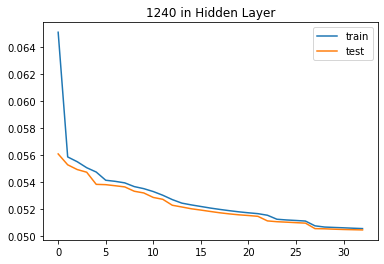

Hidden Nodes: 1240
MSE: 0.0507
Non-Orthogonality: 0.044879
Time to Train: 334.15
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1245)              977325    
_________________________________________________________________
output_layer (Dense)         (None, 784)               976864    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,954,189
Trainable params: 1,954,189
Non-trainable params: 0
_________________________________________________________________


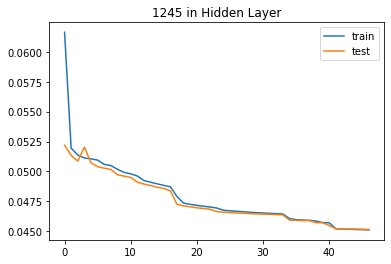

Hidden Nodes: 1245
MSE: 0.0453
Non-Orthogonality: 0.045103
Time to Train: 500.95
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1250)              981250    
_________________________________________________________________
output_layer (Dense)         (None, 784)               980784    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,962,034
Trainable params: 1,962,034
Non-trainable params: 0
_________________________________________________________________


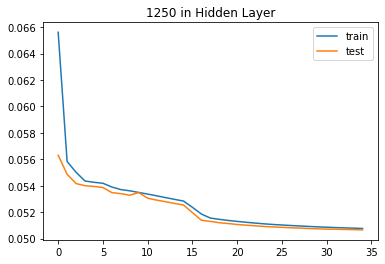

Hidden Nodes: 1250
MSE: 0.0509
Non-Orthogonality: 0.043193
Time to Train: 393.36
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1255)              985175    
_________________________________________________________________
output_layer (Dense)         (None, 784)               984704    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,969,879
Trainable params: 1,969,879
Non-trainable params: 0
_________________________________________________________________


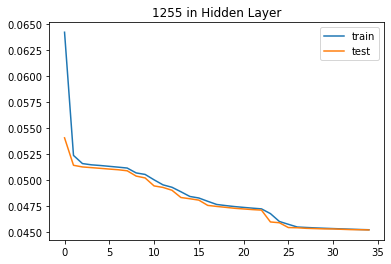

Hidden Nodes: 1255
MSE: 0.0454
Non-Orthogonality: 0.042523
Time to Train: 392.00
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1260)              989100    
_________________________________________________________________
output_layer (Dense)         (None, 784)               988624    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,977,724
Trainable params: 1,977,724
Non-trainable params: 0
_________________________________________________________________


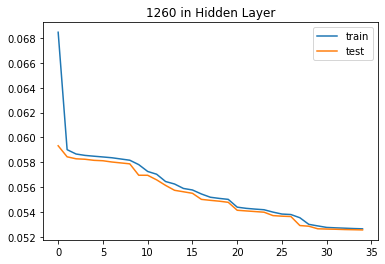

Hidden Nodes: 1260
MSE: 0.0527
Non-Orthogonality: 0.042818
Time to Train: 382.94
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1265)              993025    
_________________________________________________________________
output_layer (Dense)         (None, 784)               992544    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,985,569
Trainable params: 1,985,569
Non-trainable params: 0
_________________________________________________________________


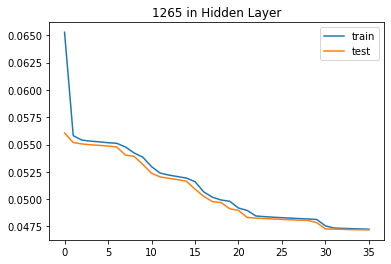

Hidden Nodes: 1265
MSE: 0.0474
Non-Orthogonality: 0.044084
Time to Train: 395.96
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1270)              996950    
_________________________________________________________________
output_layer (Dense)         (None, 784)               996464    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 1,993,414
Trainable params: 1,993,414
Non-trainable params: 0
_________________________________________________________________


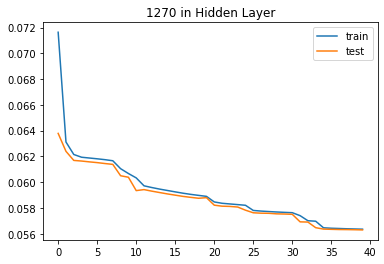

Hidden Nodes: 1270
MSE: 0.0565
Non-Orthogonality: 0.046727
Time to Train: 437.28
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1275)              1000875   
_________________________________________________________________
output_layer (Dense)         (None, 784)               1000384   
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 2,001,259
Trainable params: 2,001,259
Non-trainable params: 0
_________________________________________________________________


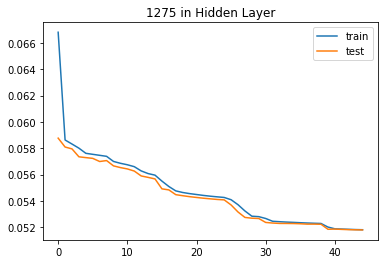

Hidden Nodes: 1275
MSE: 0.0520
Non-Orthogonality: 0.051116
Time to Train: 492.06
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1280)              1004800   
_________________________________________________________________
output_layer (Dense)         (None, 784)               1004304   
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 2,009,104
Trainable params: 2,009,104
Non-trainable params: 0
_________________________________________________________________


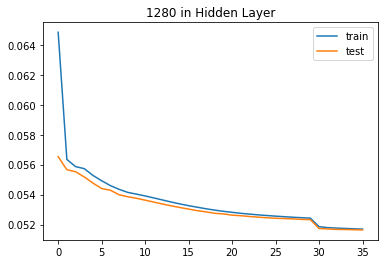

Hidden Nodes: 1280
MSE: 0.0519
Non-Orthogonality: 0.043822
Time to Train: 382.46
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1285)              1008725   
_________________________________________________________________
output_layer (Dense)         (None, 784)               1008224   
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 2,016,949
Trainable params: 2,016,949
Non-trainable params: 0
_________________________________________________________________


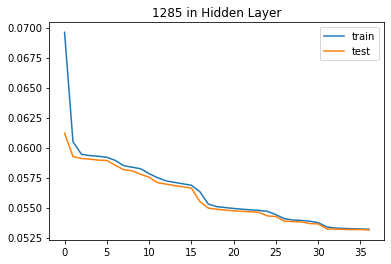

Hidden Nodes: 1285
MSE: 0.0533
Non-Orthogonality: 0.044029
Time to Train: 376.08
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1290)              1012650   
_________________________________________________________________
output_layer (Dense)         (None, 784)               1012144   
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 2,024,794
Trainable params: 2,024,794
Non-trainable params: 0
_________________________________________________________________


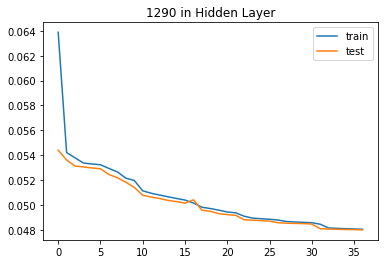

Hidden Nodes: 1290
MSE: 0.0482
Non-Orthogonality: 0.046120
Time to Train: 379.42
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1295)              1016575   
_________________________________________________________________
output_layer (Dense)         (None, 784)               1016064   
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 2,032,639
Trainable params: 2,032,639
Non-trainable params: 0
_________________________________________________________________


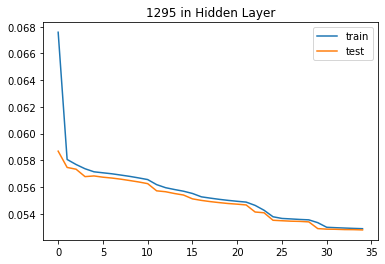

Hidden Nodes: 1295
MSE: 0.0530
Non-Orthogonality: 0.042050
Time to Train: 358.87
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1300)              1020500   
_________________________________________________________________
output_layer (Dense)         (None, 784)               1019984   
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 2,040,484
Trainable params: 2,040,484
Non-trainable params: 0
_________________________________________________________________


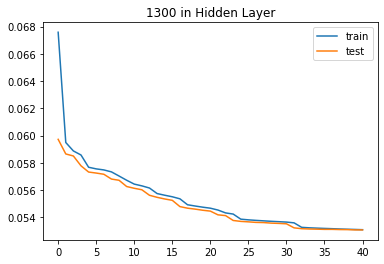

Hidden Nodes: 1300
MSE: 0.0533
Non-Orthogonality: 0.049826
Time to Train: 420.76
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1305)              1024425   
_________________________________________________________________
output_layer (Dense)         (None, 784)               1023904   
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 2,048,329
Trainable params: 2,048,329
Non-trainable params: 0
_________________________________________________________________


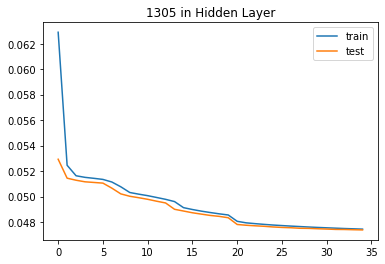

Hidden Nodes: 1305
MSE: 0.0476
Non-Orthogonality: 0.045741
Time to Train: 360.56
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1310)              1028350   
_________________________________________________________________
output_layer (Dense)         (None, 784)               1027824   
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 2,056,174
Trainable params: 2,056,174
Non-trainable params: 0
_________________________________________________________________


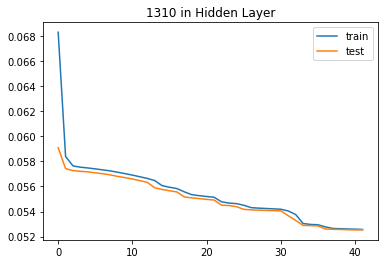

Hidden Nodes: 1310
MSE: 0.0528
Non-Orthogonality: 0.046783
Time to Train: 435.55
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1315)              1032275   
_________________________________________________________________
output_layer (Dense)         (None, 784)               1031744   
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 2,064,019
Trainable params: 2,064,019
Non-trainable params: 0
_________________________________________________________________


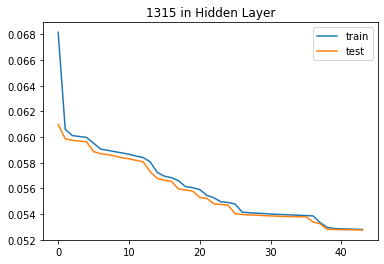

Hidden Nodes: 1315
MSE: 0.0530
Non-Orthogonality: 0.053096
Time to Train: 454.67
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1320)              1036200   
_________________________________________________________________
output_layer (Dense)         (None, 784)               1035664   
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 2,071,864
Trainable params: 2,071,864
Non-trainable params: 0
_________________________________________________________________


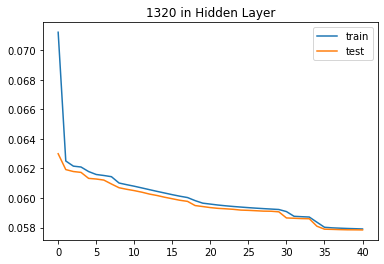

Hidden Nodes: 1320
MSE: 0.0580
Non-Orthogonality: 0.046739
Time to Train: 438.48
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1325)              1040125   
_________________________________________________________________
output_layer (Dense)         (None, 784)               1039584   
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 2,079,709
Trainable params: 2,079,709
Non-trainable params: 0
_________________________________________________________________


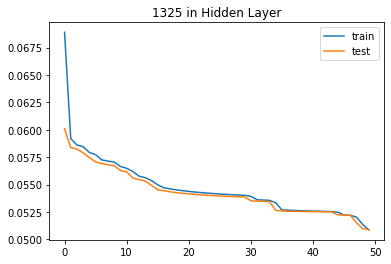

Hidden Nodes: 1325
MSE: 0.0511
Non-Orthogonality: 0.049258
Time to Train: 575.79
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1330)              1044050   
_________________________________________________________________
output_layer (Dense)         (None, 784)               1043504   
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 2,087,554
Trainable params: 2,087,554
Non-trainable params: 0
_________________________________________________________________


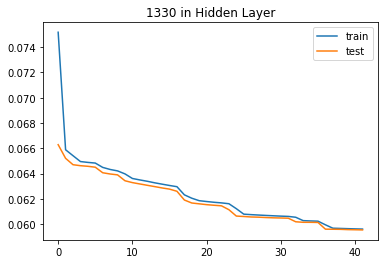

Hidden Nodes: 1330
MSE: 0.0597
Non-Orthogonality: 0.049683
Time to Train: 440.63
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1335)              1047975   
_________________________________________________________________
output_layer (Dense)         (None, 784)               1047424   
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 2,095,399
Trainable params: 2,095,399
Non-trainable params: 0
_________________________________________________________________


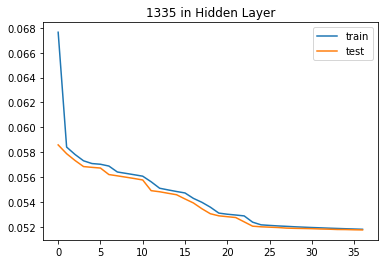

Hidden Nodes: 1335
MSE: 0.0519
Non-Orthogonality: 0.048657
Time to Train: 394.99
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1340)              1051900   
_________________________________________________________________
output_layer (Dense)         (None, 784)               1051344   
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 2,103,244
Trainable params: 2,103,244
Non-trainable params: 0
_________________________________________________________________


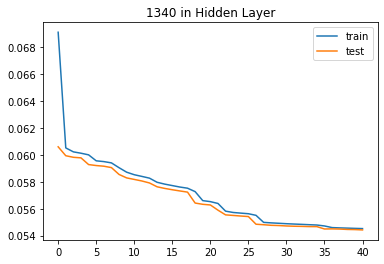

Hidden Nodes: 1340
MSE: 0.0546
Non-Orthogonality: 0.047517
Time to Train: 449.04
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1345)              1055825   
_________________________________________________________________
output_layer (Dense)         (None, 784)               1055264   
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 2,111,089
Trainable params: 2,111,089
Non-trainable params: 0
_________________________________________________________________


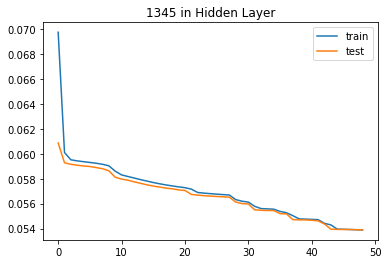

Hidden Nodes: 1345
MSE: 0.0541
Non-Orthogonality: 0.052585
Time to Train: 530.24
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1350)              1059750   
_________________________________________________________________
output_layer (Dense)         (None, 784)               1059184   
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 2,118,934
Trainable params: 2,118,934
Non-trainable params: 0
_________________________________________________________________


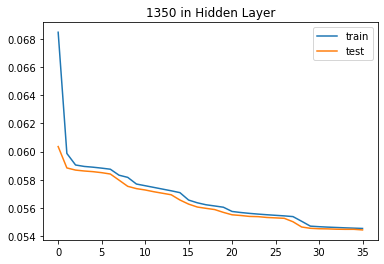

Hidden Nodes: 1350
MSE: 0.0547
Non-Orthogonality: 0.047005
Time to Train: 395.31
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1355)              1063675   
_________________________________________________________________
output_layer (Dense)         (None, 784)               1063104   
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 2,126,779
Trainable params: 2,126,779
Non-trainable params: 0
_________________________________________________________________


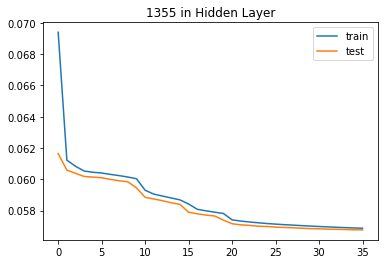

Hidden Nodes: 1355
MSE: 0.0569
Non-Orthogonality: 0.045173
Time to Train: 404.30
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1360)              1067600   
_________________________________________________________________
output_layer (Dense)         (None, 784)               1067024   
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 2,134,624
Trainable params: 2,134,624
Non-trainable params: 0
_________________________________________________________________


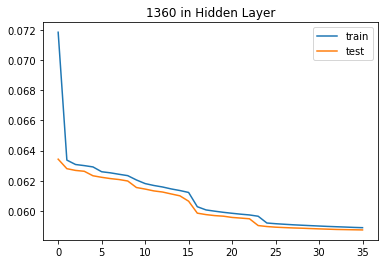

Hidden Nodes: 1360
MSE: 0.0590
Non-Orthogonality: 0.050238
Time to Train: 429.08
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1365)              1071525   
_________________________________________________________________
output_layer (Dense)         (None, 784)               1070944   
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 2,142,469
Trainable params: 2,142,469
Non-trainable params: 0
_________________________________________________________________


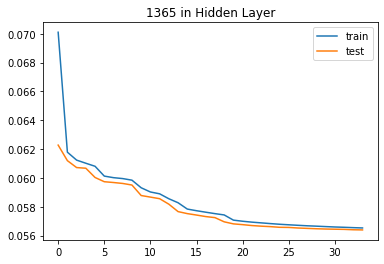

Hidden Nodes: 1365
MSE: 0.0566
Non-Orthogonality: 0.047810
Time to Train: 406.18
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1370)              1075450   
_________________________________________________________________
output_layer (Dense)         (None, 784)               1074864   
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 2,150,314
Trainable params: 2,150,314
Non-trainable params: 0
_________________________________________________________________


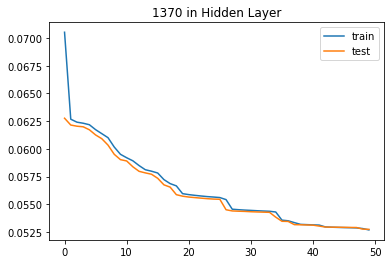

Hidden Nodes: 1370
MSE: 0.0529
Non-Orthogonality: 0.052557
Time to Train: 595.28
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1375)              1079375   
_________________________________________________________________
output_layer (Dense)         (None, 784)               1078784   
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 2,158,159
Trainable params: 2,158,159
Non-trainable params: 0
_________________________________________________________________


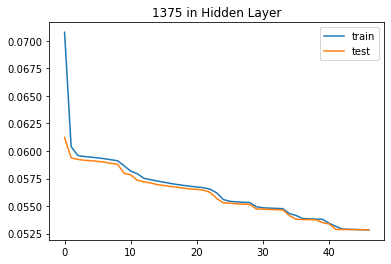

Hidden Nodes: 1375
MSE: 0.0530
Non-Orthogonality: 0.051740
Time to Train: 518.62
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1380)              1083300   
_________________________________________________________________
output_layer (Dense)         (None, 784)               1082704   
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 2,166,004
Trainable params: 2,166,004
Non-trainable params: 0
_________________________________________________________________


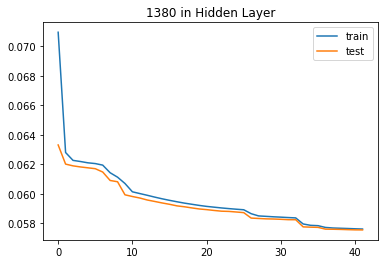

Hidden Nodes: 1380
MSE: 0.0578
Non-Orthogonality: 0.050365
Time to Train: 466.97
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1385)              1087225   
_________________________________________________________________
output_layer (Dense)         (None, 784)               1086624   
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 2,173,849
Trainable params: 2,173,849
Non-trainable params: 0
_________________________________________________________________


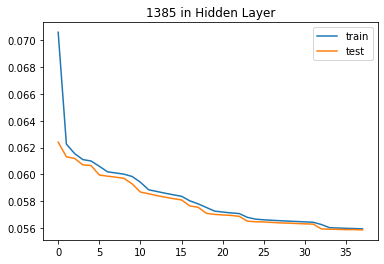

Hidden Nodes: 1385
MSE: 0.0561
Non-Orthogonality: 0.049281
Time to Train: 425.01
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1390)              1091150   
_________________________________________________________________
output_layer (Dense)         (None, 784)               1090544   
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 2,181,694
Trainable params: 2,181,694
Non-trainable params: 0
_________________________________________________________________


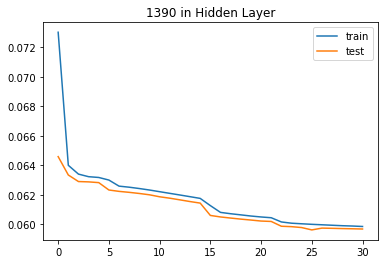

Hidden Nodes: 1390
MSE: 0.0599
Non-Orthogonality: 0.045711
Time to Train: 349.38
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1395)              1095075   
_________________________________________________________________
output_layer (Dense)         (None, 784)               1094464   
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 2,189,539
Trainable params: 2,189,539
Non-trainable params: 0
_________________________________________________________________


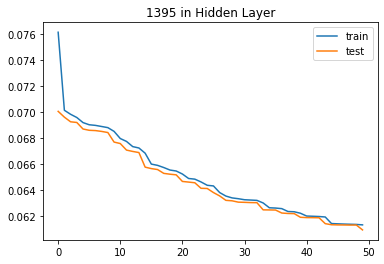

Hidden Nodes: 1395
MSE: 0.0612
Non-Orthogonality: 0.057912
Time to Train: 551.99
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1400)              1099000   
_________________________________________________________________
output_layer (Dense)         (None, 784)               1098384   
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 2,197,384
Trainable params: 2,197,384
Non-trainable params: 0
_________________________________________________________________


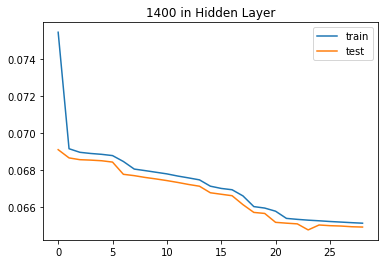

Hidden Nodes: 1400
MSE: 0.0652
Non-Orthogonality: 0.047733
Time to Train: 327.50
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1405)              1102925   
_________________________________________________________________
output_layer (Dense)         (None, 784)               1102304   
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 2,205,229
Trainable params: 2,205,229
Non-trainable params: 0
_________________________________________________________________


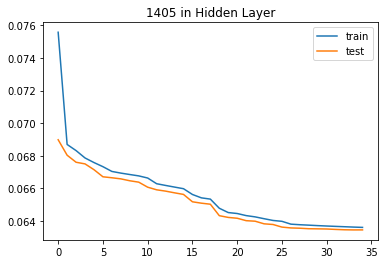

Hidden Nodes: 1405
MSE: 0.0637
Non-Orthogonality: 0.046619
Time to Train: 396.17
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1410)              1106850   
_________________________________________________________________
output_layer (Dense)         (None, 784)               1106224   
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 2,213,074
Trainable params: 2,213,074
Non-trainable params: 0
_________________________________________________________________


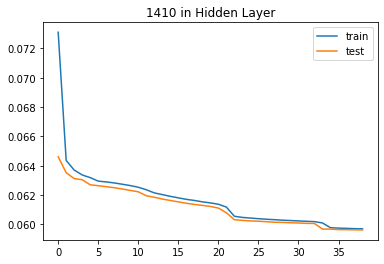

Hidden Nodes: 1410
MSE: 0.0598
Non-Orthogonality: 0.056057
Time to Train: 443.58
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1415)              1110775   
_________________________________________________________________
output_layer (Dense)         (None, 784)               1110144   
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 2,220,919
Trainable params: 2,220,919
Non-trainable params: 0
_________________________________________________________________


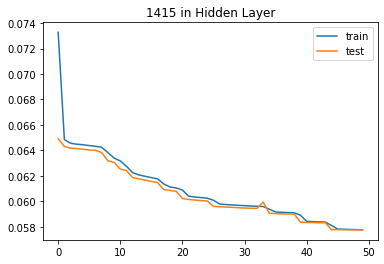

Hidden Nodes: 1415
MSE: 0.0580
Non-Orthogonality: 0.054223
Time to Train: 564.25
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1420)              1114700   
_________________________________________________________________
output_layer (Dense)         (None, 784)               1114064   
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 2,228,764
Trainable params: 2,228,764
Non-trainable params: 0
_________________________________________________________________


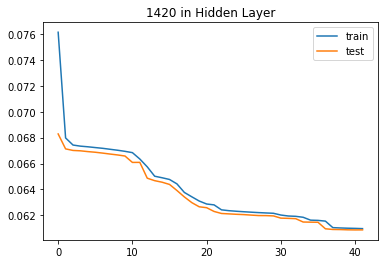

Hidden Nodes: 1420
MSE: 0.0611
Non-Orthogonality: 0.056144
Time to Train: 473.18
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1425)              1118625   
_________________________________________________________________
output_layer (Dense)         (None, 784)               1117984   
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 2,236,609
Trainable params: 2,236,609
Non-trainable params: 0
_________________________________________________________________


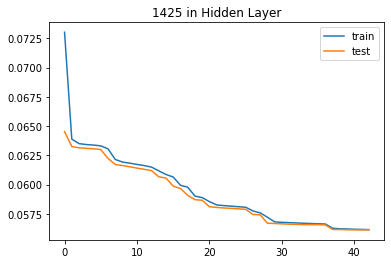

Hidden Nodes: 1425
MSE: 0.0563
Non-Orthogonality: 0.052996
Time to Train: 477.46
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1430)              1122550   
_________________________________________________________________
output_layer (Dense)         (None, 784)               1121904   
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 2,244,454
Trainable params: 2,244,454
Non-trainable params: 0
_________________________________________________________________


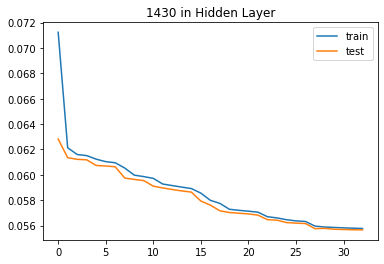

Hidden Nodes: 1430
MSE: 0.0558
Non-Orthogonality: 0.049934
Time to Train: 370.00
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1435)              1126475   
_________________________________________________________________
output_layer (Dense)         (None, 784)               1125824   
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 2,252,299
Trainable params: 2,252,299
Non-trainable params: 0
_________________________________________________________________


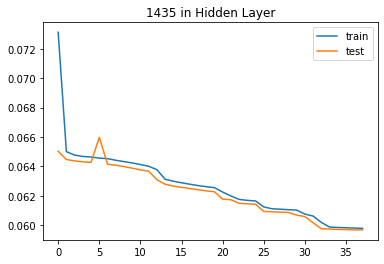

Hidden Nodes: 1435
MSE: 0.0599
Non-Orthogonality: 0.056750
Time to Train: 430.01
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1440)              1130400   
_________________________________________________________________
output_layer (Dense)         (None, 784)               1129744   
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 2,260,144
Trainable params: 2,260,144
Non-trainable params: 0
_________________________________________________________________


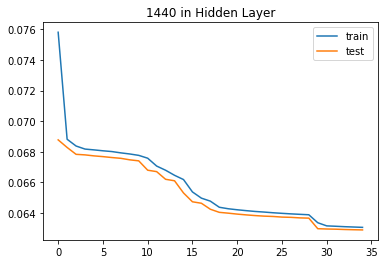

Hidden Nodes: 1440
MSE: 0.0631
Non-Orthogonality: 0.051899
Time to Train: 394.68
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1445)              1134325   
_________________________________________________________________
output_layer (Dense)         (None, 784)               1133664   
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 2,267,989
Trainable params: 2,267,989
Non-trainable params: 0
_________________________________________________________________


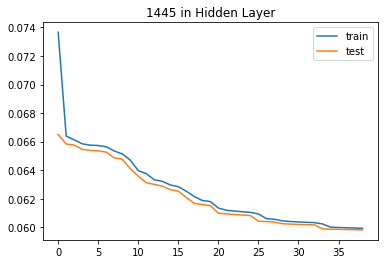

Hidden Nodes: 1445
MSE: 0.0601
Non-Orthogonality: 0.049581
Time to Train: 458.95
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1450)              1138250   
_________________________________________________________________
output_layer (Dense)         (None, 784)               1137584   
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 2,275,834
Trainable params: 2,275,834
Non-trainable params: 0
_________________________________________________________________


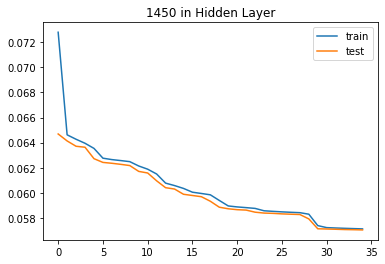

Hidden Nodes: 1450
MSE: 0.0572
Non-Orthogonality: 0.049012
Time to Train: 408.76
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1455)              1142175   
_________________________________________________________________
output_layer (Dense)         (None, 784)               1141504   
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 2,283,679
Trainable params: 2,283,679
Non-trainable params: 0
_________________________________________________________________


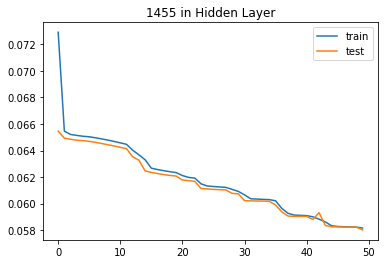

Hidden Nodes: 1455
MSE: 0.0582
Non-Orthogonality: 0.052564
Time to Train: 567.92
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1460)              1146100   
_________________________________________________________________
output_layer (Dense)         (None, 784)               1145424   
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 2,291,524
Trainable params: 2,291,524
Non-trainable params: 0
_________________________________________________________________


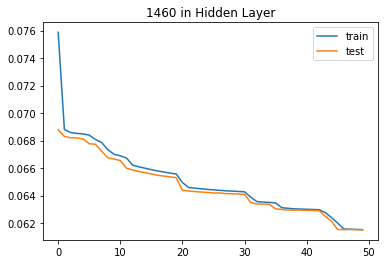

Hidden Nodes: 1460
MSE: 0.0617
Non-Orthogonality: 0.057597
Time to Train: 574.84
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1465)              1150025   
_________________________________________________________________
output_layer (Dense)         (None, 784)               1149344   
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 2,299,369
Trainable params: 2,299,369
Non-trainable params: 0
_________________________________________________________________


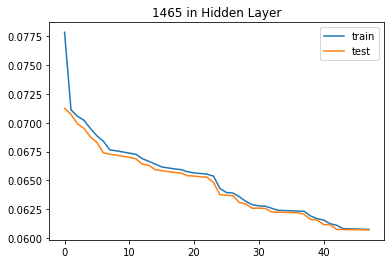

Hidden Nodes: 1465
MSE: 0.0609
Non-Orthogonality: 0.053370
Time to Train: 550.95
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1470)              1153950   
_________________________________________________________________
output_layer (Dense)         (None, 784)               1153264   
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 2,307,214
Trainable params: 2,307,214
Non-trainable params: 0
_________________________________________________________________


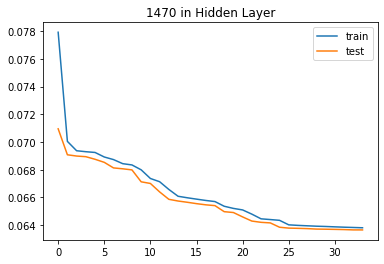

Hidden Nodes: 1470
MSE: 0.0639
Non-Orthogonality: 0.052201
Time to Train: 396.86
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1475)              1157875   
_________________________________________________________________
output_layer (Dense)         (None, 784)               1157184   
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 2,315,059
Trainable params: 2,315,059
Non-trainable params: 0
_________________________________________________________________


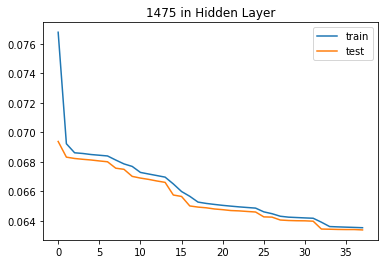

Hidden Nodes: 1475
MSE: 0.0636
Non-Orthogonality: 0.051314
Time to Train: 439.22
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1480)              1161800   
_________________________________________________________________
output_layer (Dense)         (None, 784)               1161104   
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 2,322,904
Trainable params: 2,322,904
Non-trainable params: 0
_________________________________________________________________


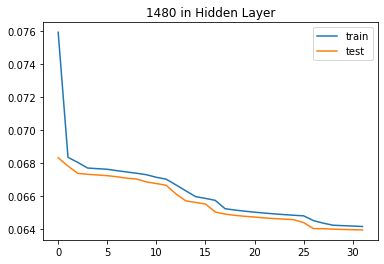

Hidden Nodes: 1480
MSE: 0.0642
Non-Orthogonality: 0.049148
Time to Train: 372.40
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1485)              1165725   
_________________________________________________________________
output_layer (Dense)         (None, 784)               1165024   
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 2,330,749
Trainable params: 2,330,749
Non-trainable params: 0
_________________________________________________________________


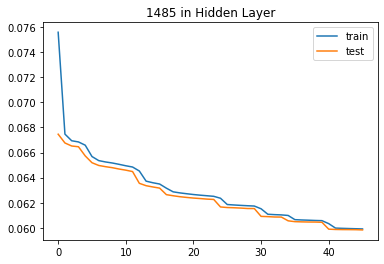

Hidden Nodes: 1485
MSE: 0.0600
Non-Orthogonality: 0.056588
Time to Train: 538.35
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1490)              1169650   
_________________________________________________________________
output_layer (Dense)         (None, 784)               1168944   
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 2,338,594
Trainable params: 2,338,594
Non-trainable params: 0
_________________________________________________________________


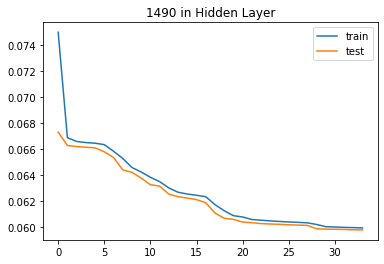

Hidden Nodes: 1490
MSE: 0.0600
Non-Orthogonality: 0.055253
Time to Train: 395.58
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1495)              1173575   
_________________________________________________________________
output_layer (Dense)         (None, 784)               1172864   
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 2,346,439
Trainable params: 2,346,439
Non-trainable params: 0
_________________________________________________________________


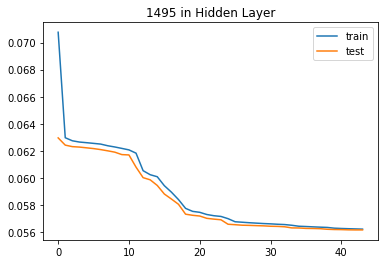

Hidden Nodes: 1495
MSE: 0.0564
Non-Orthogonality: 0.052802
Time to Train: 513.42
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1500)              1177500   
_________________________________________________________________
output_layer (Dense)         (None, 784)               1176784   
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 2,354,284
Trainable params: 2,354,284
Non-trainable params: 0
_________________________________________________________________


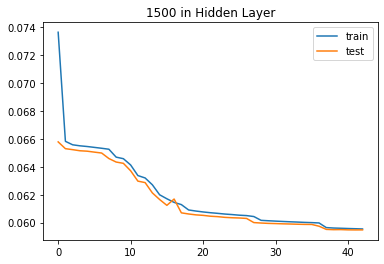

Hidden Nodes: 1500
MSE: 0.0597
Non-Orthogonality: 0.049538
Time to Train: 501.80


In [8]:
max_hidden_size = 1500
results = {
    'Hidden Nodes':[],
    'MSE': [],
    'Non-orthogonality': [],
    'model': []
}


for hidden_nodes in range(0, max_hidden_size + 1, 5):
    
    hidden_nodes = 2 if hidden_nodes == 0 else hidden_nodes
    
    # Create network layers
    inputs = keras.Input(shape=image_shape, name='input_layer')
    flatten = keras.layers.Flatten(name='flatten_input_layer')(inputs)
    h = keras.layers.Dense(hidden_nodes, activation='sigmoid', name='hidden_layer_1') (flatten)
    outputs = keras.layers.Dense(total_pixels, activation='relu', name='output_layer') (h)
    reshape =  keras.layers.Reshape((28,28), name='reshape_output_layer') (outputs)
    model = keras.Model(inputs=inputs, outputs=reshape, name = 'MLP')
    model.summary()

    # Define optimizer and metrics
    model.compile(
        optimizer=keras.optimizers.Adam(), # using to avoid learning rate tuning
        loss='MSE',
        metrics=[tf.keras.metrics.MeanSquaredError()]
    )

    # Create callbacks
    earlystop_callback = keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        min_delta=1e-4,
        patience=5
    )
    start_time = time.time()
    # Fit model
    history = model.fit(
        x_train, 
        y_train, 
        batch_size = 1024,
        epochs=50,
        validation_split=0.2,
        use_multiprocessing=True,
        callbacks=[earlystop_callback],
        verbose=0
    )
    end_time = time.time()

    # Plot validation curves
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.title(f"{hidden_nodes} in Hidden Layer")
    plt.legend()
    plt.show()
    
    # Score on test data
    W = model.layers[-2].get_weights()[0].T
    mse = model.evaluate(x_val,  y_val, verbose=0)[1]
    nonorth = measure_nonorthogonality(W)
    print(f"Hidden Nodes: {hidden_nodes}")
    print(f"MSE: {mse:0.4f}")
    print(f"Non-Orthogonality: {nonorth:0.6f}")
    print(f"Time to Train: {end_time - start_time:0.2f}")

    results['Hidden Nodes'].append(hidden_nodes)
    results['MSE'].append(mse)
    results['Non-orthogonality'].append(nonorth)
    results['model'].append(model)

    # Free up memory
    keras.backend.clear_session()

In [9]:
!rm -rf ./logs/

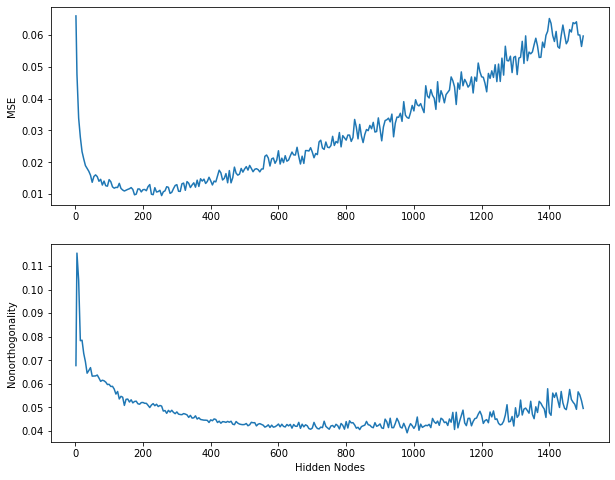

In [10]:
figure, axes = plt.subplots(2, 1, figsize=(10, 8))

axes[0].plot(results["Hidden Nodes"], results["MSE"])
axes[0].set_ylabel("MSE")

axes[1].plot(results["Hidden Nodes"], results["Non-orthogonality"])
axes[1].set_ylabel("Nonorthogonality")
axes[1].set_xlabel("Hidden Nodes")

plt.show()

A few observations/comments:

1. If we continued to increase the number of nodes, we would eventually see nonorthogonality increase again. However, the input dimension is 28x28 so that may not occur unless the number of hidden nodes passes that point.
2. It visually appears that the two curves are highly correlated (this will be measured below). Generally, this makes sense -- as capacity increases, the network can learn more granular features, increasing orthogonality and performance.

The model with 50 nodes in the output layer will now be re-run and visualized as an example.

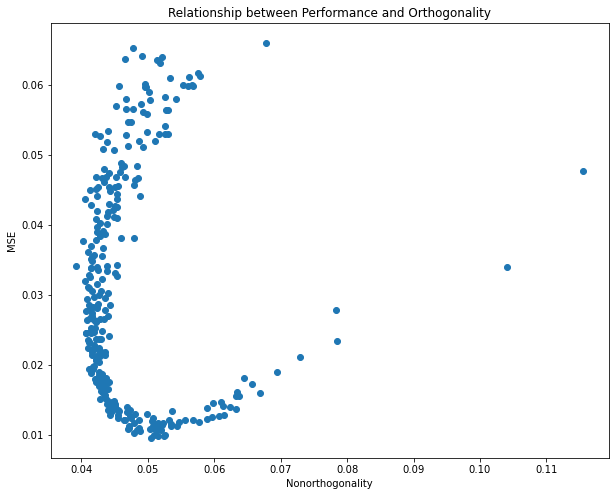

Pearson's Correlation: 0.010


In [11]:
cor  = np.corrcoef(results['MSE'], results["Non-orthogonality"])[0,1]
figure, axes = plt.subplots(1, 1, figsize=(10, 8))

axes.scatter(results["Non-orthogonality"], results["MSE"])
axes.set_ylabel("MSE")
axes.set_xlabel("Nonorthogonality")
axes.set_title("Relationship between Performance and Orthogonality")

plt.show()

print(f"Pearson's Correlation: {cor:0.3f}")

In [12]:
inputs = keras.Input(shape=image_shape, name='input_layer')
flatten = keras.layers.Flatten(name='flatten_input_layer')(inputs)
h = keras.layers.Dense(50, activation='sigmoid', name='hidden_layer_1') (flatten)
outputs = keras.layers.Dense(total_pixels, activation='relu', name='output_layer') (h)
reshape =  keras.layers.Reshape((28,28), name='reshape_output_layer') (outputs)
model = keras.Model(inputs=inputs, outputs=reshape, name = 'MLP')
model.summary()

# Define optimizer and metrics
model.compile(
    optimizer=keras.optimizers.Adam(), # using to avoid learning rate tuning
    loss='MSE',
    metrics=[tf.keras.metrics.MeanSquaredError()]
)
history = model.fit(
    x_train, 
    y_train, 
    batch_size = 1024,
    epochs=50,
    validation_split=0.2,
    use_multiprocessing=True,
    callbacks=[earlystop_callback],
    verbose=0
)

Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 50)                39250     
_________________________________________________________________
output_layer (Dense)         (None, 784)               39984     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 79,234
Trainable params: 79,234
Non-trainable params: 0
_________________________________________________________________


Output Layer Weights images:


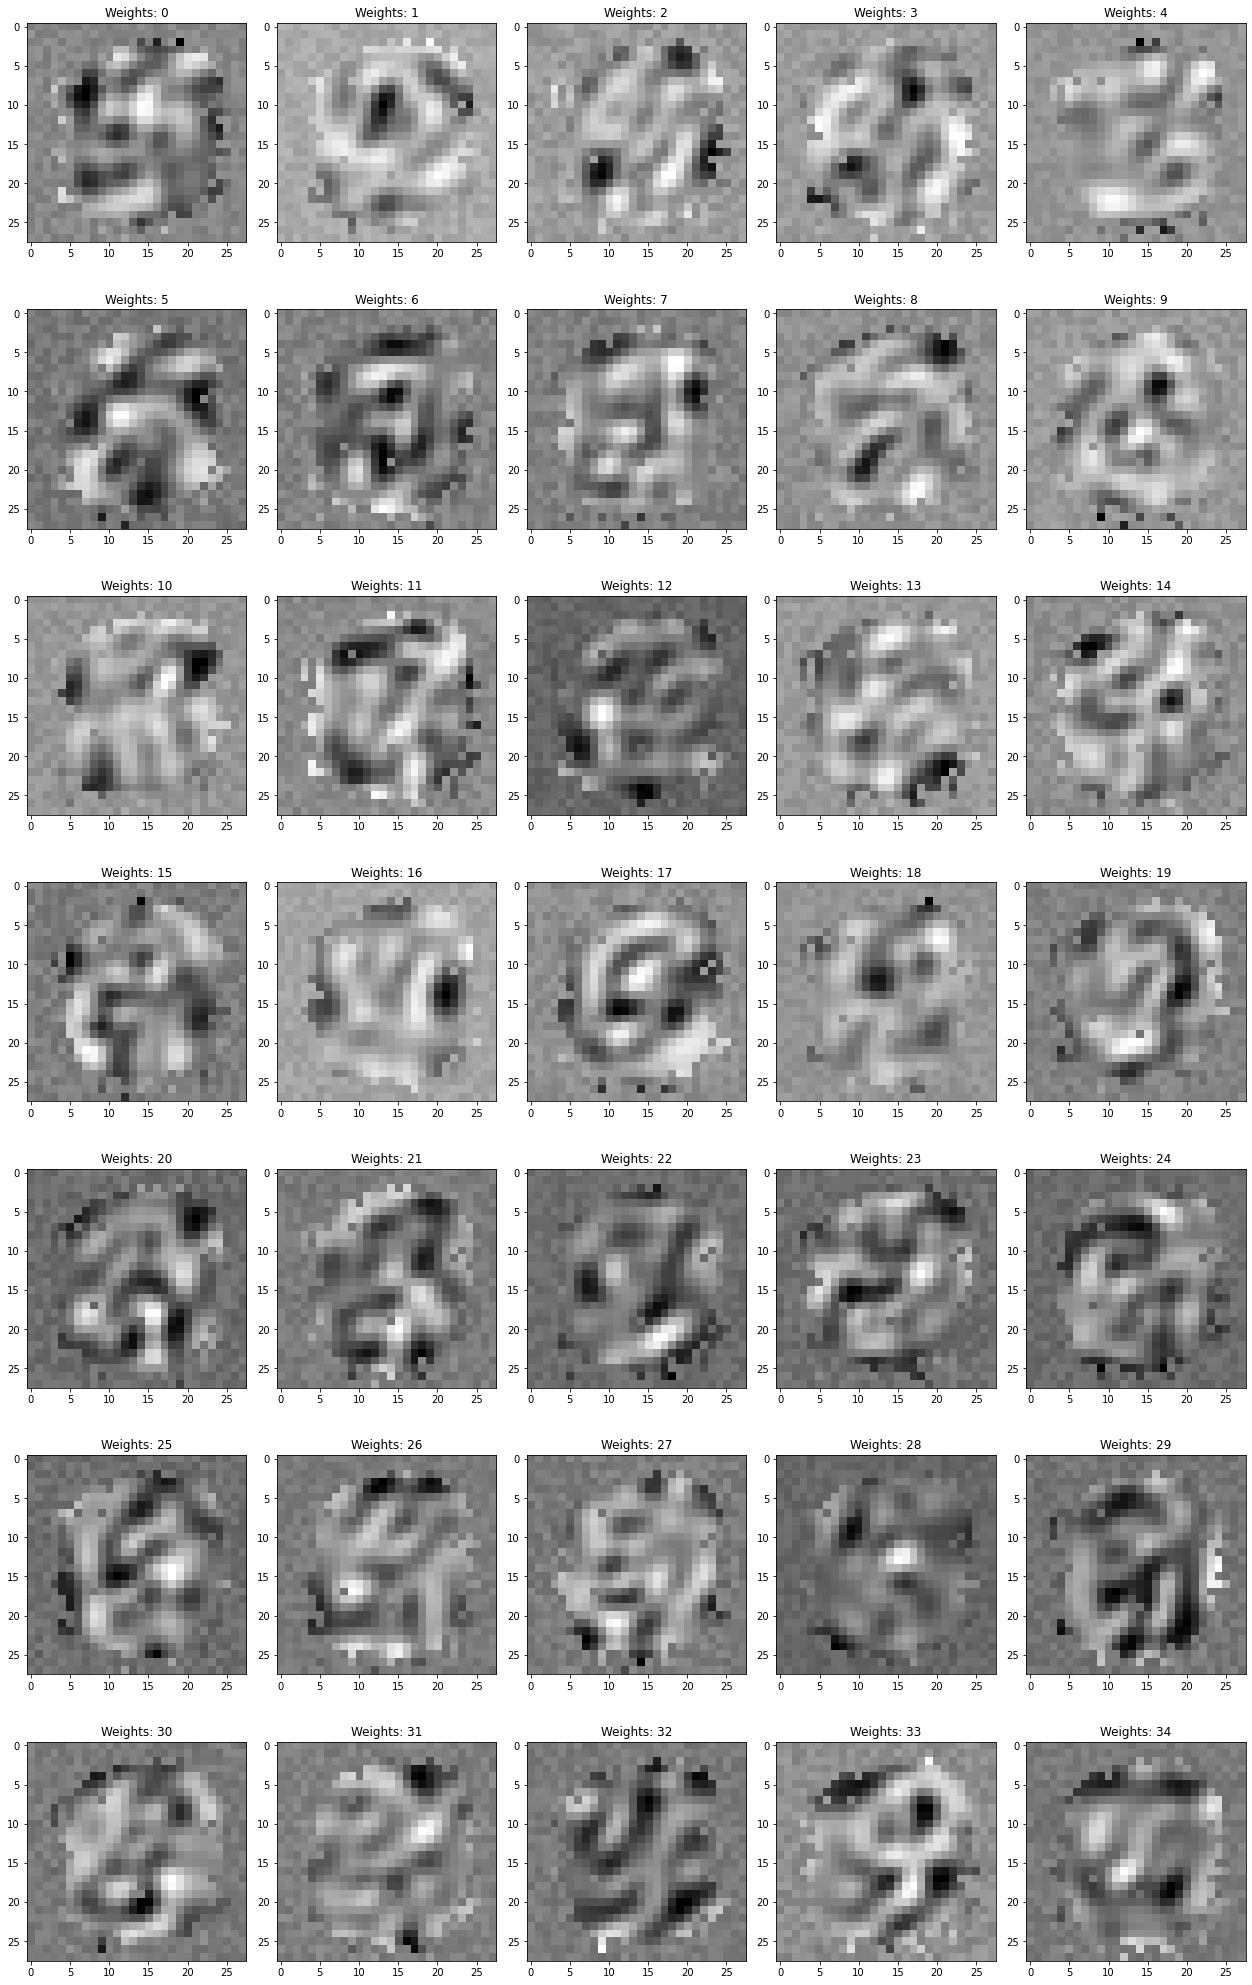

In [13]:
output_layer_weights = model.layers[-2].get_weights()[0]
output_layer_weights = output_layer_weights.reshape(-1, 28, 28)

print("Output Layer Weights images:")
plot_images(output_layer_weights)

It may be interesting to view the input weights as well for comparison.

Input Layer Weights images:


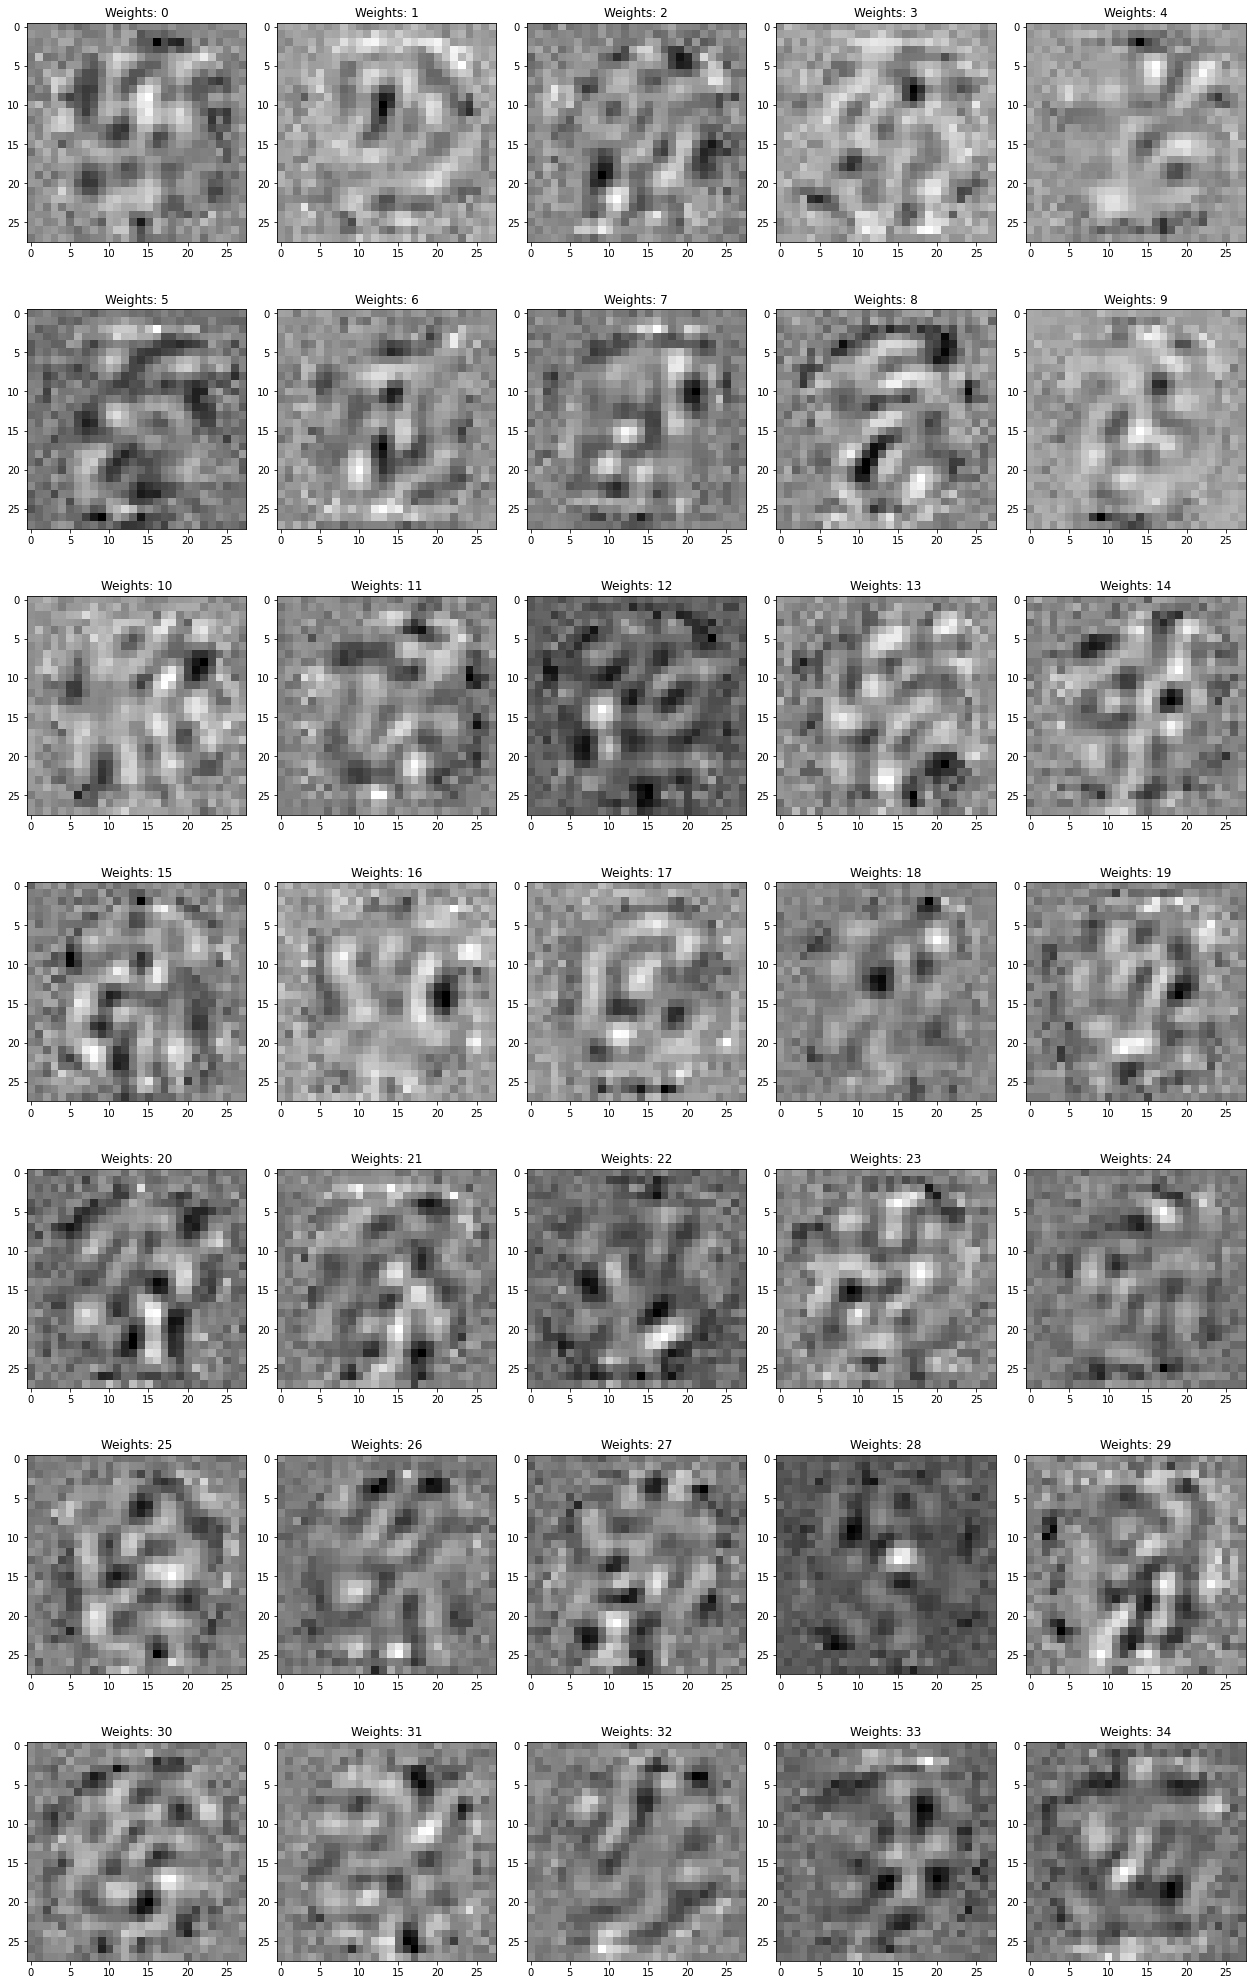

In [14]:
input_layer_weights = model.layers[-3].get_weights()[0]
input_layer_weights = input_layer_weights.T.reshape(-1, 28, 28)

print("Input Layer Weights images:")
plot_images(input_layer_weights)

There appears to be some correlation between the input weights and output weights.